# Ames Housing**

## Introduction and Excercises

For suggestions/questions regarding this notebook, please contact Pieter Overdevest (pieter@innovatewithdata.nl)

The questions below have been taken from JADS-nl on [Github](https://github.com/jads-nl/discover-projects/tree/main/ames-housing).

YouTube video of [Ames step-by-step explanation](https://www.youtube.com/watch?v=VSeGseoJsNA)

Following [Kaggle's Getting Started Prediction Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview), the goal for this discover project is to predict the sales price for each house. For each Id in the test set, you are requested to predict the value of the SalePrice variable.

The performance metric for the prediction model should be the Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. This makes it the Root-Mean-Squared-Log-Error (RMSLE). By plotting a histogram of the sale price you will understand why the logarithm is recommended.

**Exercise 1**

Provide a table with descriptive statistics for all included variables and check:

* Classes of each of the variables (e.g. factors or continuous variables)
* Descriptive/summary statistics for all continuous variables (e.g. mean, SD, range) and factor variables (e.g. frequencies)
* Explore missing values

**Exercise 2**

There a several missing values in the dataset, which need to be tackled before we can proceed with the rest of the analysis. There are many ways to impute missing values, but for now, impute missing values as follows:

* Use the median for number variables
* Use the label "100" in all factor variables

**Exercise 3**

The variable "SalePrice" refers to the price at which a property was sold and hence is the variable of interest for our prediction model. This variable is also referred to as the "Y", dependent, or response variable. Explore Y in terms of:

* Descriptive/summary statistics (e.g. mean, SDs, range)
* Visualize the distribution of Y (e.g. matplotlib or seaborn)
* Visualize the distribution of Y by looking at various subgroups (e.g. create boxplot or scatterplot using matplotlib or seaborn)
* Look at differences between neigbourhoods
* Look at differences between housing style
* Draw a correlation plot to see all correlations between Y and the independent (number) variables (Hint: use df.plotting.scatter_matrix or seaborn.pairplot)

**Exercise 4**

* Estimate a LASSO model and a kNN model
* Assess which model performs best

## Tips

1. Comment-out code:
* On Windows, the shortcut is: CTRL + /
* On Mac, the shortcut is: Command + /

2. Download single files from GitHub, e.g., data file: https://downgit.github.io

3. Add ';' at the end of a code line to create a plot. This prevents statements like '<AxesSubplot:>'.

4. When you use that same/similar code twice consider a function; use the same/similar code three times or more, create a function.

5. Though not used in this notebook, enter `%run filename.py` in a code cell if you want to run a Python script from a Jupyter Notebook.

6. I prepend labels to object names, to clarify the data structure and recall object names in systems running *intellisense*. In case of,

    **Two-dimensional**

    a. Dataframe: `df_`

    b. Matrix or array: `m_` (for matrix)

    **One-dimensional**

    c. List or array: `v_`(for vector)

    **Scalar**

    d. Number: `n_`
    
    e. Character: `c_`
    
    **Other**

    f. Function: `f_`

7. To keep code readable use `\` to indicate a line break. This way you don't have to put everything in one line.

## Load functions and packages

### Load selected functions from packages
In some cases we load specific functions individually.

In [205]:
from collections import Counter

# To calculate Pearson Correlation Coefficients.
from scipy.stats import pearsonr

from sklearn.compose import ColumnTransformer

from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, LassoCV

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.tree import DecisionTreeClassifier

# To get the computer name.
from socket import gethostname

### Load function families from packages
We can also load all functions within a family in one expression.

In [206]:
from sklearn import metrics, datasets

# Functions used in this notebook.
from general_functions import *

# Function 'f_df_summary' - kindly provided by Luuk Burger.
from summary_by_luuk_burger import *


### Load complete packages
In some cases, many functions are used from across a library.

In [207]:
# Load packages and assign to shorter alias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load packages as is.
#import sys
import math

## Settings

In [208]:
# Note, '%matplotlib inline' ensures matplotlib graphs will be included in your notebook.
%matplotlib inline

# Setting Pandas options.
pd.set_option("display.max_rows", None)         # How to display all rows from data frame using pandas. Setting value to None to show all rows.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_info_columns", 100)
pd.set_option("display.max_info_rows", 1000000)
pd.set_option("display.precision", 2)
#pd.set_option("styler.format.precision", 2)

# Setting Matplotlib font sizes.
FONT_SMALL = 8
FONT_MEDIUM = 16
FONT_LARGE = 20

plt.rc('axes',   titlesize      = FONT_LARGE)   # axes title
plt.rc('axes',   labelsize      = FONT_MEDIUM)  # axes x and y labels
plt.rc('xtick',  labelsize      = FONT_MEDIUM)  # x tick labels
plt.rc('ytick',  labelsize      = FONT_MEDIUM)  # y tick labels
plt.rc('legend', fontsize       = FONT_MEDIUM)  # legend items
plt.rc('legend', title_fontsize = FONT_LARGE)   # legend title
plt.rc('figure', titlesize      = FONT_LARGE)   # figure title
plt.rc('font',   size           = FONT_SMALL)   # other texts
plt.rc('figure', figsize        = (20, 10))     # figure size. This replaces 'plt.figure(figsize=(20,10))' in every cell.

# Setting sklearn parameter for Pipeline visualization.
#set_config(display="diagram")

## Load Data

### More than one way to load 'Ames Housing' Data

1 - Read data from GitHub - route A

Click on the 'AmesHousing.csv' file in the [ames-housing](https://github.com/jads-nl/discover-projects/tree/main/ames-housing) repo on GitHub. Click on the **Raw** button. Copy the link in the URL bar. Paste the link in the Pandas function 'read_csv()':

In [209]:
df_original1 = pd.read_csv(
    
    'https://raw.githubusercontent.com/jads-nl/discover-projects/main/ames-housing/AmesHousing.csv',

    # Just to give you an example, in case you want to enforce a certain data type.
    # For this project it is not required to set classes to imported features.
    dtype={
        'MS SubClass':object,
        'Year Built':object
    }
)

2 - Read data from GitHub - route B

Right click on the 'AmesHousing.csv' file in the [ames-housing](https://github.com/jads-nl/discover-projects/tree/main/ames-housing) repo on GitHub, and copy link to the file. Paste the link in the Pandas function 'read_csv' and add '?raw=True':

In [210]:
df_original2 = pd.read_csv(
    
    'https://github.com/jads-nl/discover-projects/blob/main/ames-housing/AmesHousing.csv?raw=True'
)

3 - Read data from local file

The same Pandas function can be used to read a CSV from your local computer.

In [211]:
if gethostname() == "Pieters-MacBook-Pro.local":
    c_temp = "home"
else:
    c_temp = "macstudio"


df_original3 = pd.read_csv(
    
    '/Users/' + c_temp + '/Dropbox/Partners/PE/2022 11 - Foundation - Werkcollege/Data/AmesHousing.csv'
)

4 - Read data from Google Drive when using Google Colab

Add a link to the concerned file in the same function. To read data from Google Drive when using Deepnote, see Integrations, top right in Deepnote.

In [212]:
# From Google Colab:
# from google.colab import drive

# Read data from Google Drive, update path and filename accordingly.
# df_original4 = pd.read_csv('drive/MyDrive/path/filename.csv')

In order to be able to review the original data at a later stage, it is good practice to make a copy of original data.

In [213]:
df = df_original1.copy()

## Answers

### Exercise 1

Provide a table with descriptive statistics for all included variables and check:

* Classes of each of the variables (e.g. factors or continuous variables)
* Descriptive/summary statistics for all continuous variables (e.g. mean, SD, range) and factor variables (e.g. frequencies)
* Explore missing values

The `info()` function shows the features names and some high level information on each.

In [214]:
#df.info()

The `describe()` function shows some statistics on numerical features in the data.

In [215]:
#df.describe()

The `info()` and `describe()` functions are built-in Python functions. When you explore data in data frames, you will develop various scripts. You can collate these scripts in a function, allowing you to perform the same analysis on any given data frame. That is what we will do below.

#### Intermezzo - Functions
Let's first a moment to better understand the workings of functions. In the first example, we have a function that takes two input parameters (`a` and `b`) and spits out their product. You also see that there is no need to define a helper object `c` (example 2).

In [216]:
def f_example_1(a, b):

    c = a*b

    return c


def f_example_2(a, b):

    return a*b

In [217]:
print(f_example_1(4,5))

print(f_example_2(4,6))

20
24


The third example shows that functions can output multiple objects.

In [218]:
def f_example_3(a, b):

    return a+b, a*b

In [219]:
print(f_example_3(4,7))

(11, 28)


We assign the respective outputs to objects, see `n1` and `n2` below.

In [220]:
n_1, n_2 = f_example_3(4,7)

print(n_1)
print(n_2)

11
28


Functions are not required to output objects, see example 4 below. Example 5 shows that use of `print(f"...")` results in less and cleaner code to achieve the same result.

In [221]:
def f_example_4(a, b):

    print("The product of ", str(a), " and ", str(b), " is " + str(a*b), ".", sep = "")

def f_example_5(a, b):

    print(f"I said so, the product of {a} and {b} is indeed {str(a*b)}!")

In [222]:
f_example_4(4,8)
f_example_5(4,8)

The product of 4 and 8 is 32.
I said so, the product of 4 and 8 is indeed 32!


When importing all functions in the script `general_functions.py`, we loaded the function `f_concat`, among others. This function concatenates a list of strings into a single formatted string.

In [223]:
x = ['a', 'b', 'c']

f_concat(x)

'a, b, and c'

#### More descriptive statistics

Let's return to descriptive statistics of the data, where we will use self-developed functions. The function `f_describe` loaded from `general_functions.py` is a kind of do-all-in-one-go function to obtain descriptive statistices on all features in the data. It is not mandatory to label each input parameter; `f_describe(df, 10)` will give the same result, since the values will be assigned in the same order. For functions with multiple input parameters, I recommend to label each input parameter to prevent the risk of assigning values to the wrong parameter.

In [224]:
#f_describe(df_input = df, n_top = 10)

We can dive a bit deeper in a single feature. In the example below we investigate the the number of fireplaces. By default, the top-10 items will be shown. In case the feature has more than ten items - eg. `Neighborhood` - you can add input parameter 'n_top' and assign the appropriate number. To have another example of input parameters, I added `n_font_size`, which you can use to change the font size of the labels along the axes in the bar chart.

In [225]:
#f_freq(df_input = df, c_col = 'Fireplaces', n_font_size = 15)

Luuk Burger (May 2022) developed a summary function providing more detailed and colorfull insights into numerical and categorical features in the data.

In [226]:
df_1, df_2 = f_df_summary(df, highlight=True)

# Insights into categorical features in the data.
#df_1

In [227]:
# Insights into categorical features in the data.
#df_2

### Exercise 2

There a several missing values in the dataset, which need to be tackled before we can proceed with the rest of the analysis. There are many ways to impute missing values, but for now, impute missing values as follows:

* Use the median for number variables
* Use the label "100" in all factor variables

#### Numerical and categorical data

We start out by defining data frames containing the numerical and categorical data, respectively.

In [228]:
df_number = df.select_dtypes(include = np.number)
df_object = df.select_dtypes(include = np.object_)

print(df_number.shape)
print(df_object.shape)
print(df.shape)

(2930, 37)
(2930, 45)
(2930, 82)


We define `v_df_number_names` and `v_df_object_names` as a lists of all numerical and categorical features in the data, respectively.

In [229]:
v_df_number_names = df_number.columns.values

v_df_number_names

array(['Order', 'PID', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area',
       'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'], dtype=object)

In [230]:
v_df_object_names = df_object.columns.values

v_df_object_names

array(['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Year Built', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual',
       'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish',
       'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence',
       'Misc Feature', 'Sale Type', 'Sale Condition'], dtype=object)

Using the `shape` function above, we confirmed that `v_df_number_names` and `v_df_object_names` make up all features in the data.

#### Intermezzo - Subsetting lists and arrays

A brief intermezzo on subsetting data, as we will create new objects as subsets of existing objects down below.

In [231]:
# A simple list
v_test_list = ['a', 'b', 'c', 'd']

# Take a subset in case the existing object is a list. List comprehensions to the rescue! Obviously, the subset is again a list.
[x for x in v_test_list if x not in ['a', 'c']]

['b', 'd']

However, list comprehensions cannot be used in case the existing object is a numpy array.

In [232]:
# Converted to a numpy array.
v_test_array = np.array(v_test_list)

# The '~' operator negates the boolean values.
v_test_array_bool = ~np.isin(v_test_array, np.array(['a', 'c']))

v_test_array_subset = v_test_array[v_test_array_bool]

# Print results.
print(v_test_array_bool)

print(v_test_array_subset)

[False  True False  True]
['b' 'd']


The code can be simplified, in case you want to remove a single value.

In [233]:
v_test_array_subset = v_test_array[v_test_array != 'c']

# Print results.
print(v_test_array_subset)

['a' 'b' 'd']


#### Subsetting numerical feature names

We define `v_df_X_names` as an array containing the names of all numerical features in the data, except `SalePrice`. It is created by checking where `v_df_number_names` is not equal to `SalePrice`, see evaluation '!='. For clarification, later we will define object `df_X` as a data frame containing alle numerical features in the data, except `SalePrice`.

In [234]:
v_df_X_names = v_df_number_names[v_df_number_names != 'SalePrice']

v_df_number_names != 'SalePrice'

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False])

#### Use the median value for number variables

We replace NA's in numerical features with their feature median.

In [235]:
df_number_updated = df_number.replace(np.nan, df_number.median())

df_number.median().head(5)

Order           1.47e+03
PID             5.35e+08
Lot Frontage    6.80e+01
Lot Area        9.44e+03
Overall Qual    6.00e+00
dtype: float64

As expected, we observe that the median values of the updated columns have not changed.

In [236]:
df_number_updated.median().head(5)

Order           1.47e+03
PID             5.35e+08
Lot Frontage    6.80e+01
Lot Area        9.44e+03
Overall Qual    6.00e+00
dtype: float64

And, as expected there are no empty cells.

In [237]:
df_number_updated.isna().sum().sum()

0

#### Use the label "100" in all factor variables

Now, we will replace NA's in the columns with categorical data (factor variables). Besides `replace()` [(ref)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html), we can also make use of `fillna()` [(ref)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) to replace NA's by an alternative value. It is good practice to assign the replacement ("100") value to an object, so it can be changed in one location, if needed.

In [238]:
c_replace_by = "100"

In [239]:
# Replace using replace():
df_object_updated     = df_object.replace(np.nan, c_replace_by)

# Replace using fillna():
df_object_updated_alt = df_object.fillna(c_replace_by)

And, as expected there are no empty cells.

In [240]:
df_object_updated.isna().sum().sum()

0

Let's verify the replacement for a given categorical feature (`c_col`).

In [241]:
# Define feature name to verify the imputations we made.
c_col = 'Pool QC'

# How many NA and 'c_replace_by' exist in the original data:
print("Number of values in original data:")
print("NA: "                + str(sum(df_object[c_col].isna())))
print(c_replace_by + ": " + str(list(df_object[c_col]).count(c_replace_by)))

Number of values in original data:
NA: 2917
100: 0


In [242]:
# Check the replacement action using '.replace':
print("Number of values in updated data using replace():")
print("NA: "                + str(sum(df_object_updated[c_col].isna())))
print(c_replace_by + ": " + str(list(df_object_updated[c_col]).count(c_replace_by)), "\n")

# Check the replacement action using '.fillna':
print("Number of values in updated data using fillna():")
print("NA:    "             + str(sum(df_object_updated_alt[c_col].isna())))
print(c_replace_by + ": " + str(list(df_object_updated_alt[c_col]).count(c_replace_by)))

Number of values in updated data using replace():
NA: 0
100: 2917 

Number of values in updated data using fillna():
NA:    0
100: 2917


Now, suppose the question was to replace NA's by the most frequent occuring value in each column. How would we go about this?

In [243]:
# Archive - using Counter is a solution, but not the simplest.
# [Counter(df_object[c_col].dropna()).most_common(1)[0][0] for c_col in v_df_object_names]

df_object_updated_most_frequent = df_object.fillna(df_object.mode().iloc[0])

In [244]:
df_object.mode().iloc[0].head(5)

MS SubClass     020
MS Zoning        RL
Street         Pave
Alley          Grvl
Lot Shape       Reg
Name: 0, dtype: object

In [245]:
df_object.describe()

MS SubClass MS Zoning Street Alley Lot Shape Land Contour Utilities  \
count         2930      2930   2930   198      2930         2930      2930   
unique          16         7      2     2         4            4         3   
top            020        RL   Pave  Grvl       Reg          Lvl    AllPub   
freq          1079      2273   2918   120      1859         2633      2927   

       Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type  \
count        2930       2930         2930        2930        2930      2930   
unique          5          3           28           9           8         5   
top        Inside        Gtl        NAmes        Norm        Norm      1Fam   
freq         2140       2789          443        2522        2900      2425   

       House Style Year Built Roof Style Roof Matl Exterior 1st Exterior 2nd  \
count         2930       2930       2930      2930         2930         2930   
unique           8        118          6         8           16           17   
top         1Story       2005      Gable   CompShg      VinylSd      VinylSd   
freq          1481        142       2321      2887         1026         1015   

       Mas Vnr Type Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond  \
count          2907       2930       2930       2930      2850      2850   
unique            5          4          5          6         5         5   
top            None         TA         TA      PConc        TA        TA   
freq           1752       1799       2549       1310      1283      2616   

       Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2 Heating Heating QC  \
count           2847           2850           2849    2930       2930   
unique             4              6              6       6          5   
top               No            GLQ            Unf    GasA         Ex   
freq            1906            859           2499    2885       1495   

       Central Air Electrical Kitchen Qual Functional Fireplace Qu  \
count         2930       2929         2930       2930         1508   
unique           2          5            5          8            5   
top              Y      SBrkr           TA        Typ           Gd   
freq          2734       2682         1494       2728          744   

       Garage Type Garage Finish Garage Qual Garage Cond Paved Drive Pool QC  \
count         2773          2771        2771        2771        2930      13   
unique           6             3           5           5           3       4   
top         Attchd           Unf          TA          TA           Y      Ex   
freq          1731          1231        2615        2665        2652       4   

        Fence Misc Feature Sale Type Sale Condition  
count     572          106      2930           2930  
unique      4            5        10              6  
top     MnPrv         Shed       WD          Normal  
freq      330           95      2536           2413

In [246]:
df_object_updated_most_frequent.describe()

MS SubClass MS Zoning Street Alley Lot Shape Land Contour Utilities  \
count         2930      2930   2930  2930      2930         2930      2930   
unique          16         7      2     2         4            4         3   
top            020        RL   Pave  Grvl       Reg          Lvl    AllPub   
freq          1079      2273   2918  2852      1859         2633      2927   

       Lot Config Land Slope Neighborhood Condition 1 Condition 2 Bldg Type  \
count        2930       2930         2930        2930        2930      2930   
unique          5          3           28           9           8         5   
top        Inside        Gtl        NAmes        Norm        Norm      1Fam   
freq         2140       2789          443        2522        2900      2425   

       House Style Year Built Roof Style Roof Matl Exterior 1st Exterior 2nd  \
count         2930       2930       2930      2930         2930         2930   
unique           8        118          6         8           16           17   
top         1Story       2005      Gable   CompShg      VinylSd      VinylSd   
freq          1481        142       2321      2887         1026         1015   

       Mas Vnr Type Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond  \
count          2930       2930       2930       2930      2930      2930   
unique            5          4          5          6         5         5   
top            None         TA         TA      PConc        TA        TA   
freq           1775       1799       2549       1310      1363      2696   

       Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2 Heating Heating QC  \
count           2930           2930           2930    2930       2930   
unique             4              6              6       6          5   
top               No            GLQ            Unf    GasA         Ex   
freq            1989            939           2580    2885       1495   

       Central Air Electrical Kitchen Qual Functional Fireplace Qu  \
count         2930       2930         2930       2930         2930   
unique           2          5            5          8            5   
top              Y      SBrkr           TA        Typ           Gd   
freq          2734       2683         1494       2728         2166   

       Garage Type Garage Finish Garage Qual Garage Cond Paved Drive Pool QC  \
count         2930          2930        2930        2930        2930    2930   
unique           6             3           5           5           3       4   
top         Attchd           Unf          TA          TA           Y      Ex   
freq          1888          1390        2774        2824        2652    2921   

        Fence Misc Feature Sale Type Sale Condition  
count    2930         2930      2930           2930  
unique      4            5        10              6  
top     MnPrv         Shed       WD          Normal  
freq     2688         2919      2536           2413

#### Bring the two data frames back together again

Next, we need to [concatenate](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) the two updated data frames to create one new data frame without NA's.

In [247]:
df_updated = pd.concat([df_object_updated, df_number_updated], axis=1)

The original and updated dataframes have the same shape.

In [248]:
print(df_updated.shape)
print(df.shape)

(2930, 82)
(2930, 82)


### Exercise 3

The variable "SalePrice" refers to the price at which a property was sold and hence is the variable of interest for our prediction model. This variable is also referred to as the `Y`, dependent, or response variable. Explore `Y` in terms of:

* Descriptive/summary statistics (e.g. mean, SDs, range)
* Visualize the distribution of `Y` (e.g. matplotlib or seaborn)
* Visualize the distribution of `Y` by looking at various subgroups (e.g. create boxplot or scatterplot using matplotlib or seaborn)
* Look at differences between neigbourhoods
* Look at differences between housing style
* Draw a correlation plot to see all correlations between Y and the independent (number) variables (Hint: use `df.plotting.scatter_matrix` or `seaborn.pairplot`)

#### Descriptive/summary statistics (e.g. mean, SDs, range)

Since we will use the SalePrice data more often, we assign it to an object `v_y`.

In [249]:
v_y = df_updated['SalePrice']

print("Summary statistics of sale price:")
print(f"Mean:   {round(v_y.mean(), 1)}")
print(f"Median: {round(v_y.median(), 1)}")
print(f"SD:     {round(v_y.std(), 1)}")
print(f"Range:  {v_y.min()} till {v_y.max()}")

Summary statistics of sale price:
Mean:   180796.1
Median: 160000.0
SD:     79886.7
Range:  12789 till 755000


#### Visualize the distribution of Y (e.g. matplotlib or seaborn)

##### Determine bin size

The bin width is relevant when visualizing distributions. The [Freedman–Diaconis rule](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule) helps by calculating a recommended bin width:

bin width = 2 * IQR(`x`) / `n`^(1/3)

where, the IQR is the InterQuartile Range of the observed data `x`, and `n` is total number of observations in the data.

In [250]:
# Mini-intermezzo - Percentiles
np.percentile(v_y, q = [.25,.75])

array([41290., 58500.])

In [251]:
# The IQR is equal to the difference between the 75% and 25% percentiles.
n_q25, n_q75 = np.percentile(v_y, q = [.25,.75])

n_IQR = n_q75 - n_q25

# The bin width is calculated from the Freedman-Diaconis rule, above.
n_bin_width = 2 * n_IQR / (len(v_y)**(1/3))

# The number of bins easily follows from the range and the bin width.
n_bins    = int((v_y.max() - v_y.min())/n_bin_width)

print(f"IQR:                              {n_IQR:,.0f}")
print(f"Freedman–Diaconis bin width:      {round(n_bin_width):,.0f}")
print(f"Freedman–Diaconis number of bins: {n_bins}")

IQR:                              17,210
Freedman–Diaconis bin width:      2,405
Freedman–Diaconis number of bins: 308


##### Using Pandas

Pandas `hist()` function is a quick way to obtain a histogram, by simply appending `.hist()`. All three examples below give the same result. How is the third one slightly different?

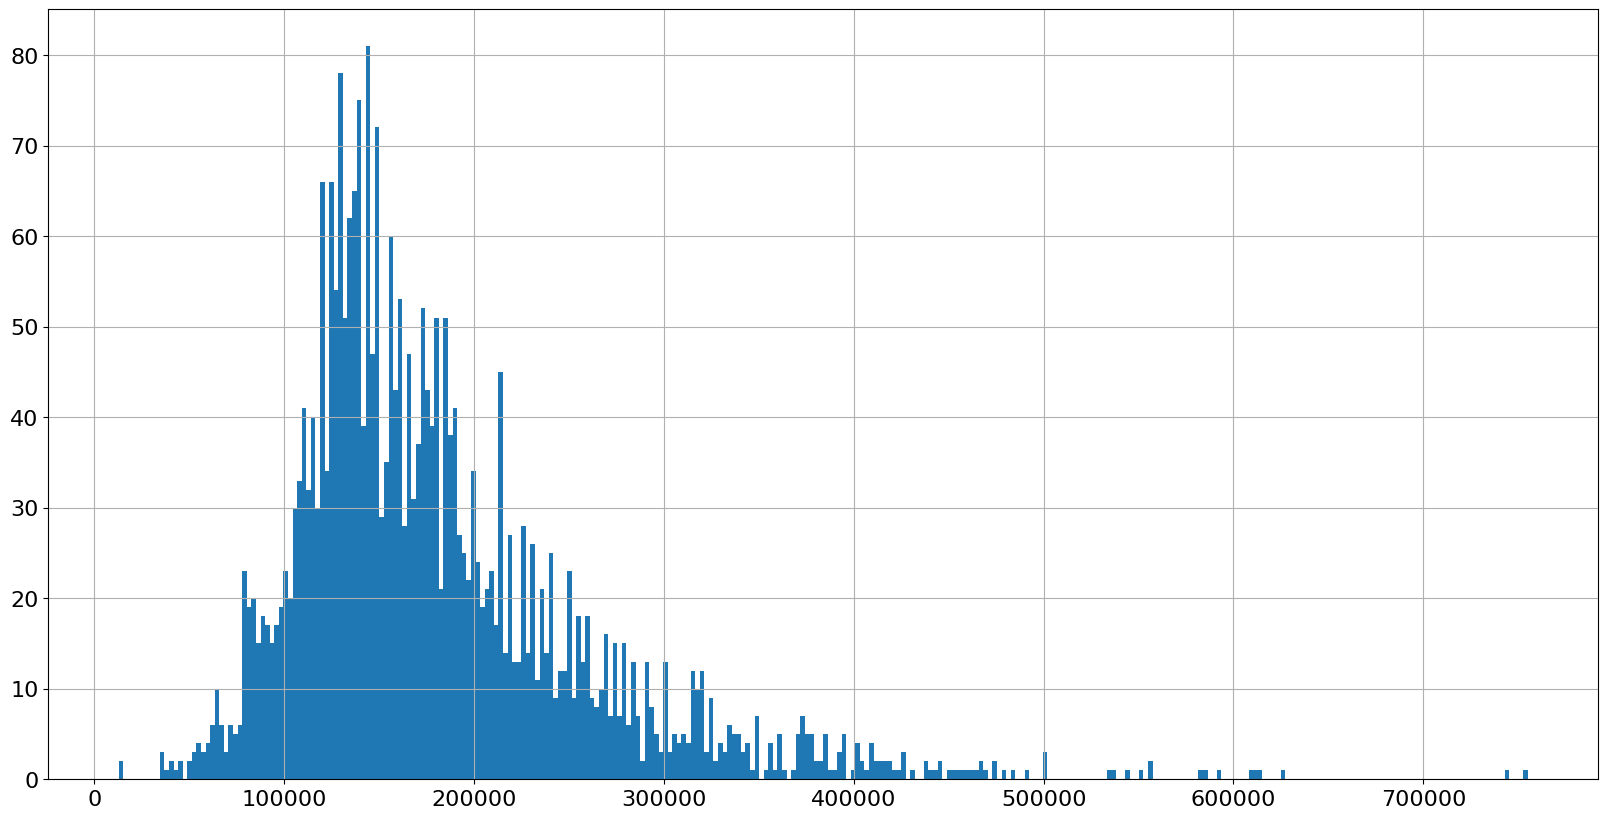

In [252]:
df_updated['SalePrice'].hist(bins = n_bins);
#y.hist(bins = n_bins);
#df_updated.hist(column = 'SalePrice', bins = n_bins);


In [253]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   object 
 1   MS Zoning        2930 non-null   object 
 2   Street           2930 non-null   object 
 3   Alley            2930 non-null   object 
 4   Lot Shape        2930 non-null   object 
 5   Land Contour     2930 non-null   object 
 6   Utilities        2930 non-null   object 
 7   Lot Config       2930 non-null   object 
 8   Land Slope       2930 non-null   object 
 9   Neighborhood     2930 non-null   object 
 10  Condition 1      2930 non-null   object 
 11  Condition 2      2930 non-null   object 
 12  Bldg Type        2930 non-null   object 
 13  House Style      2930 non-null   object 
 14  Year Built       2930 non-null   object 
 15  Roof Style       2930 non-null   object 
 16  Roof Matl        2930 non-null   object 
 17  Exterior 1st  

In case you are interested in historgrams of other features. Why does `Year Built` result in overlapping x-labels? How to resolve ([hint](https://pandas.pydata.org/docs/reference/api/pandas.to_number.html))?

In [254]:
#df_updated['1st Flr SF'].hist();
#df_updated['2nd Flr SF'].hist();
#df_updated['Year Built'].hist();

##### Using Matplotlib

[Matplotlib](https://matplotlib.org) expects the dataframe as input in the `hist()` function ([ref](https://stackoverflow.com/questions/33203645/how-to-plot-a-histogram-using-matplotlib-in-python-with-a-list-of-data)). Note, `plt` is the alias for the Matplotlib package, just like `pd` is for the Pandas packages.

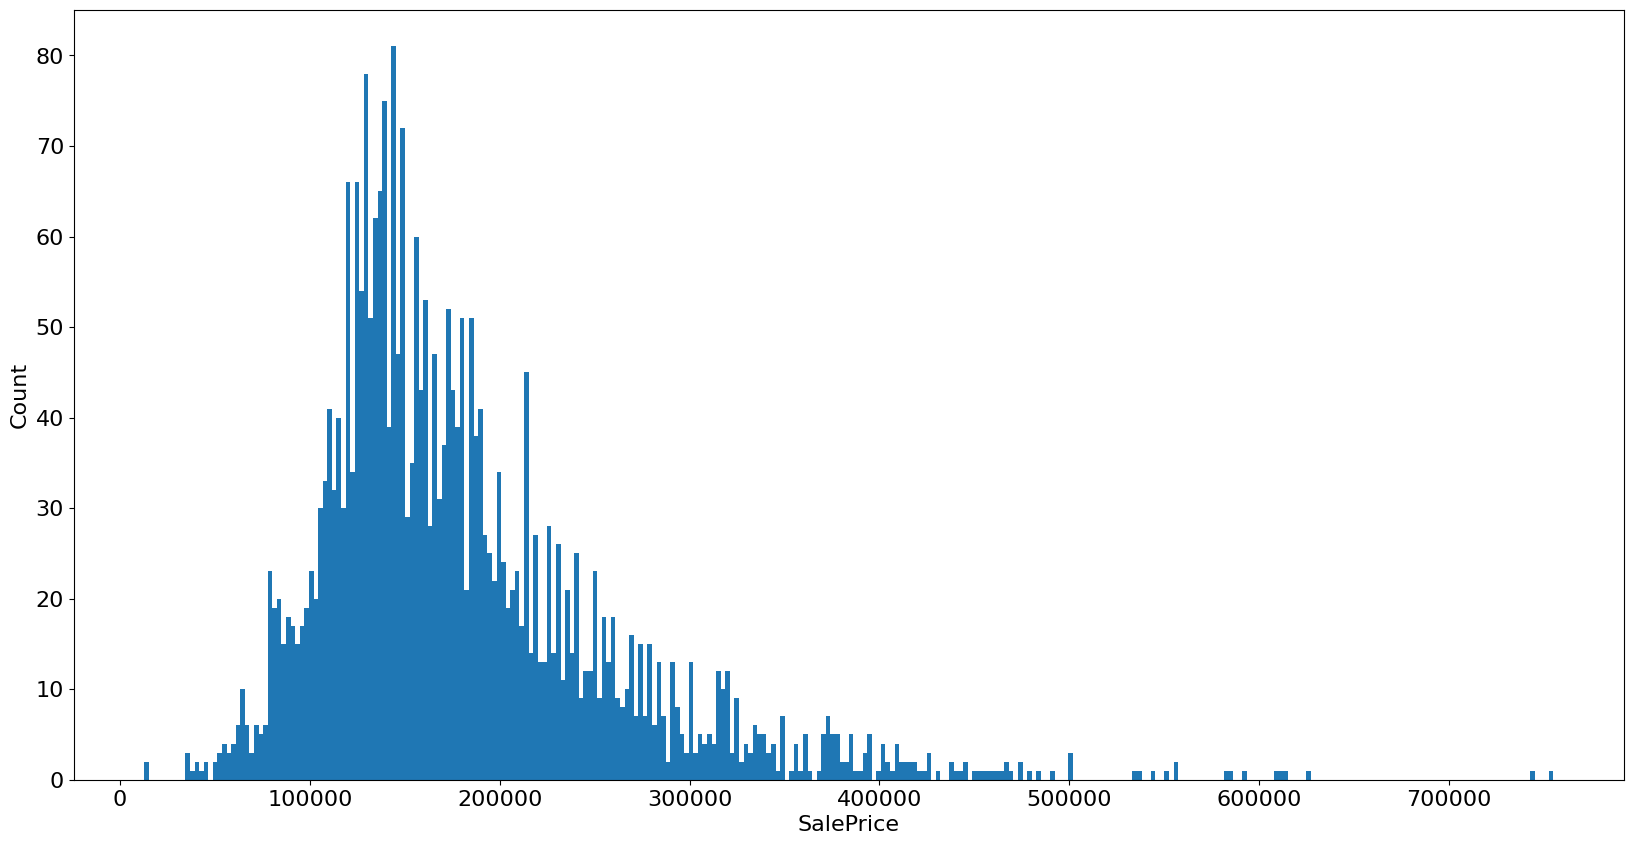

In [255]:
plt.hist(v_y, bins = n_bins)
plt.ylabel('Count')
plt.xlabel('SalePrice');

##### Using Seaborn

`Seaborn` is a Python data visualization library based on matplotlib ([ref](https://seaborn.pydata.org/index.html)). The two examples below using `histplot()` result in the same plot ([ref](https://seaborn.pydata.org/generated/seaborn.histplot.html)).

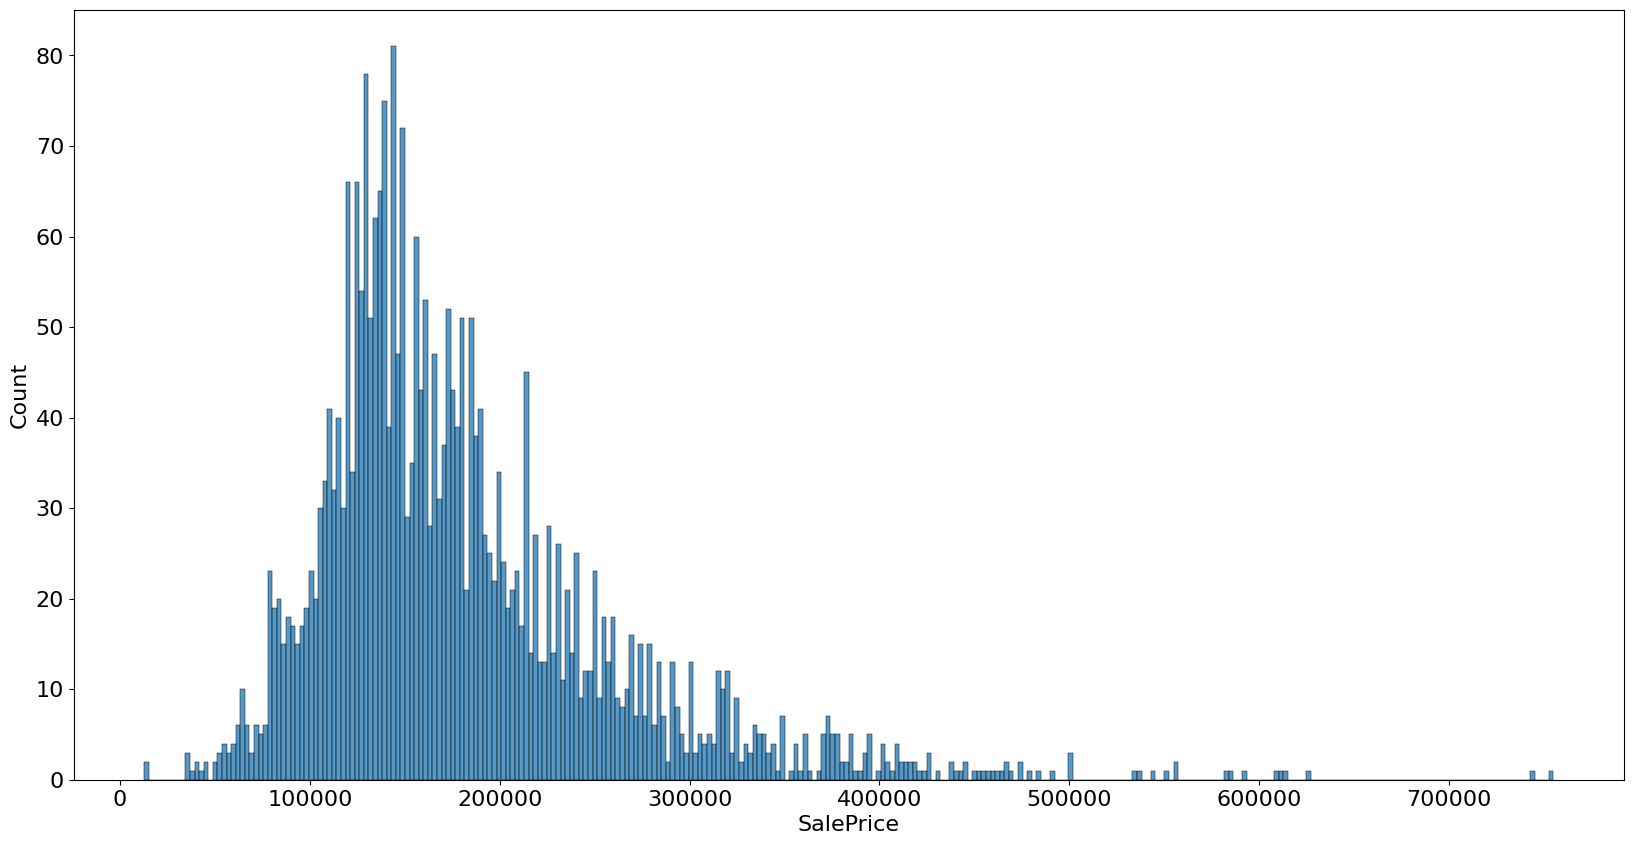

In [256]:
ax = sns.histplot(
      
      data = df_updated, x = "SalePrice",
      #data = y,
      bins = n_bins
)
 
ax.set(
    
    xlabel = 'SalePrice',
    ylabel = 'Count'
);

#### Visualize the distribution of Y by looking at various subgroups (e.g. create boxplot or scatterplot using matplotlib or seaborn)

##### Using Pandas

What is the benefit of adding `bins` parameter? see below.

In [257]:
# Mini-intermezzo
#np.arange(0, max(v_y), 20000)

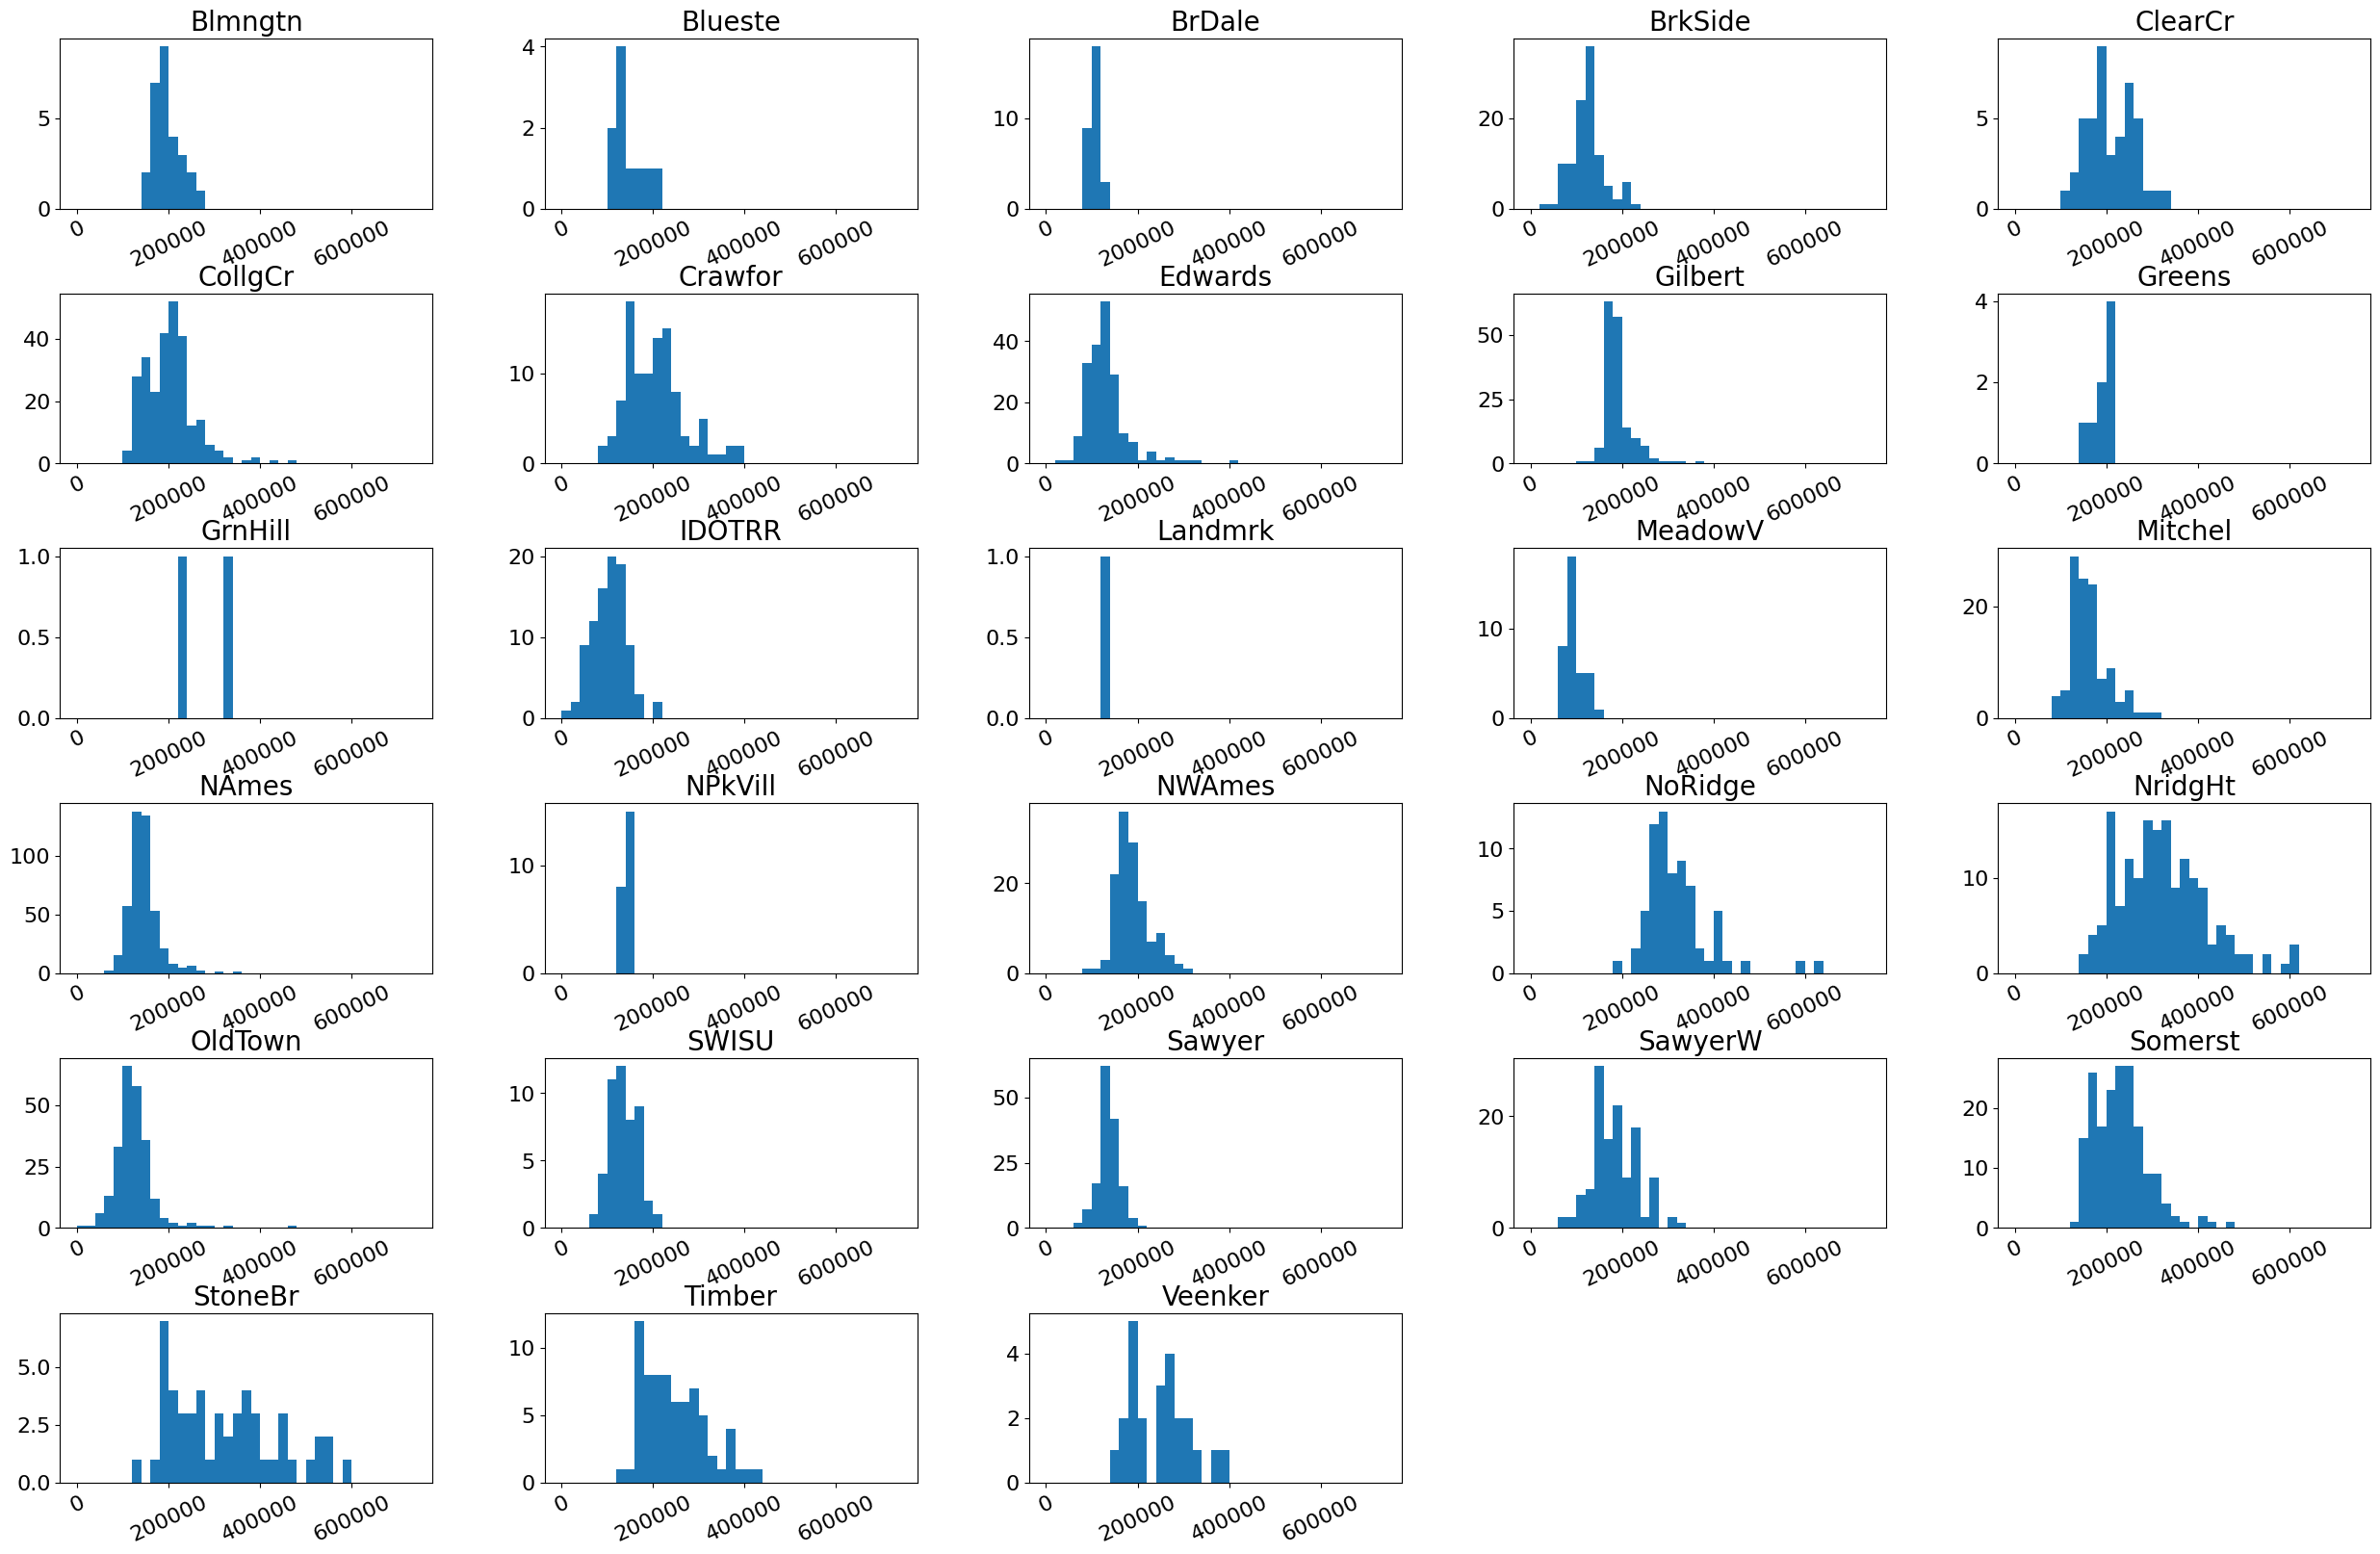

In [258]:
v_y.hist(
    
    by      = df_updated['Neighborhood'],
    figsize = (30,20),
    xrot    = 25,
    bins    = np.arange(0, max(v_y), 20000)
);

##### Using Matplotlib

We start out by pivoting the data, see also create histograms for grouped column ([ref](https://stackoverflow.com/questions/50892710/create-histogram-for-grouped-column)). Alternatively, you can make a subset of the data to focus on a smaller number of neighbourhoods.

In [259]:
df_updated_pivot = df_updated.pivot(
    
    columns = 'Neighborhood',
    values  = 'SalePrice'
)

# df_updated_pivot = df_updated[df_updated['Neighborhood'].isin(['OldTown', 'NoRidge', 'Veenker'])].pivot(
    
#     columns='Neighborhood',
#     values='SalePrice'
# )

# The pivot() function creates a column for each value in the column 'Neighborhood'.
df_updated_pivot.head(10)

Neighborhood  Blmngtn  Blueste  BrDale  BrkSide  ClearCr  CollgCr  Crawfor  \
0                 NaN      NaN     NaN      NaN      NaN      NaN      NaN   
1                 NaN      NaN     NaN      NaN      NaN      NaN      NaN   
2                 NaN      NaN     NaN      NaN      NaN      NaN      NaN   
3                 NaN      NaN     NaN      NaN      NaN      NaN      NaN   
4                 NaN      NaN     NaN      NaN      NaN      NaN      NaN   
5                 NaN      NaN     NaN      NaN      NaN      NaN      NaN   
6                 NaN      NaN     NaN      NaN      NaN      NaN      NaN   
7                 NaN      NaN     NaN      NaN      NaN      NaN      NaN   
8                 NaN      NaN     NaN      NaN      NaN      NaN      NaN   
9                 NaN      NaN     NaN      NaN      NaN      NaN      NaN   

Neighborhood  Edwards   Gilbert  Greens  GrnHill  IDOTRR  Landmrk  MeadowV  \
0                 NaN       NaN     NaN      NaN     NaN      NaN      NaN   
1                 NaN       NaN     NaN      NaN     NaN      NaN      NaN   
2                 NaN       NaN     NaN      NaN     NaN      NaN      NaN   
3                 NaN       NaN     NaN      NaN     NaN      NaN      NaN   
4                 NaN  189900.0     NaN      NaN     NaN      NaN      NaN   
5                 NaN  195500.0     NaN      NaN     NaN      NaN      NaN   
6                 NaN       NaN     NaN      NaN     NaN      NaN      NaN   
7                 NaN       NaN     NaN      NaN     NaN      NaN      NaN   
8                 NaN       NaN     NaN      NaN     NaN      NaN      NaN   
9                 NaN  189000.0     NaN      NaN     NaN      NaN      NaN   

Neighborhood  Mitchel     NAmes  NPkVill  NWAmes  NoRidge  NridgHt  OldTown  \
0                 NaN  215000.0      NaN     NaN      NaN      NaN      NaN   
1                 NaN  105000.0      NaN     NaN      NaN      NaN      NaN   
2                 NaN  172000.0      NaN     NaN      NaN      NaN      NaN   
3                 NaN  244000.0      NaN     NaN      NaN      NaN      NaN   
4                 NaN       NaN      NaN     NaN      NaN      NaN      NaN   
5                 NaN       NaN      NaN     NaN      NaN      NaN      NaN   
6                 NaN       NaN      NaN     NaN      NaN      NaN      NaN   
7                 NaN       NaN      NaN     NaN      NaN      NaN      NaN   
8                 NaN       NaN      NaN     NaN      NaN      NaN      NaN   
9                 NaN       NaN      NaN     NaN      NaN      NaN      NaN   

Neighborhood  SWISU  Sawyer  SawyerW  Somerst   StoneBr  Timber  Veenker  
0               NaN     NaN      NaN      NaN       NaN     NaN      NaN  
1               NaN     NaN      NaN      NaN       NaN     NaN      NaN  
2               NaN     NaN      NaN      NaN       NaN     NaN      NaN  
3               NaN     NaN      NaN      NaN       NaN     NaN      NaN  
4               NaN     NaN      NaN      NaN       NaN     NaN      NaN  
5               NaN     NaN      NaN      NaN       NaN     NaN      NaN  
6               NaN     NaN      NaN      NaN  213500.0     NaN      NaN  
7               NaN     NaN      NaN      NaN  191500.0     NaN      NaN  
8               NaN     NaN      NaN      NaN  236500.0     NaN      NaN  
9               NaN     NaN      NaN      NaN       NaN     NaN      NaN

In [260]:
# Mini-intermezzo - how often does each neighborhood occur in the data?
# f_freq(
#     df_updated[df_updated['Neighborhood'].isin(['OldTown', 'Veenker', 'NoRidge'])],
#     'Neighborhood'
# )

Let's define a number of objects that we will use in the grid plot below.

In [261]:
n_categories = len(df_updated_pivot.columns)
v_idx        = np.arange(1, 1 + n_categories)
n_col_max    = 4
n_row        = math.ceil(n_categories/n_col_max)

# Print values.
print(n_categories, n_row, v_idx)

28 7 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28]


In addition, we make will use of the `zip()` function ([ref](https://www.w3schools.com/python/ref_func_zip.asp)).

In [262]:
# Mini-intermezzo - zip() function
# The function zip() works like a zipper in your coat, it combines subsequent elements of lists. While the zipper in your
# coat can only combine two 'lists', the zip() function can combine more than two lists. Note, tuple() is needed to show
# the content of what comes out of zip(). You can check by removing it.
print(tuple(zip(v_idx, df_updated_pivot.columns)))
print("")
print(df_updated_pivot.columns)

((1, 'Blmngtn'), (2, 'Blueste'), (3, 'BrDale'), (4, 'BrkSide'), (5, 'ClearCr'), (6, 'CollgCr'), (7, 'Crawfor'), (8, 'Edwards'), (9, 'Gilbert'), (10, 'Greens'), (11, 'GrnHill'), (12, 'IDOTRR'), (13, 'Landmrk'), (14, 'MeadowV'), (15, 'Mitchel'), (16, 'NAmes'), (17, 'NPkVill'), (18, 'NWAmes'), (19, 'NoRidge'), (20, 'NridgHt'), (21, 'OldTown'), (22, 'SWISU'), (23, 'Sawyer'), (24, 'SawyerW'), (25, 'Somerst'), (26, 'StoneBr'), (27, 'Timber'), (28, 'Veenker'))

Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'Greens', 'GrnHill', 'IDOTRR',
       'Landmrk', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes',
       'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW',
       'Somerst', 'StoneBr', 'Timber', 'Veenker'],
      dtype='object', name='Neighborhood')


/Users/home/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/home/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


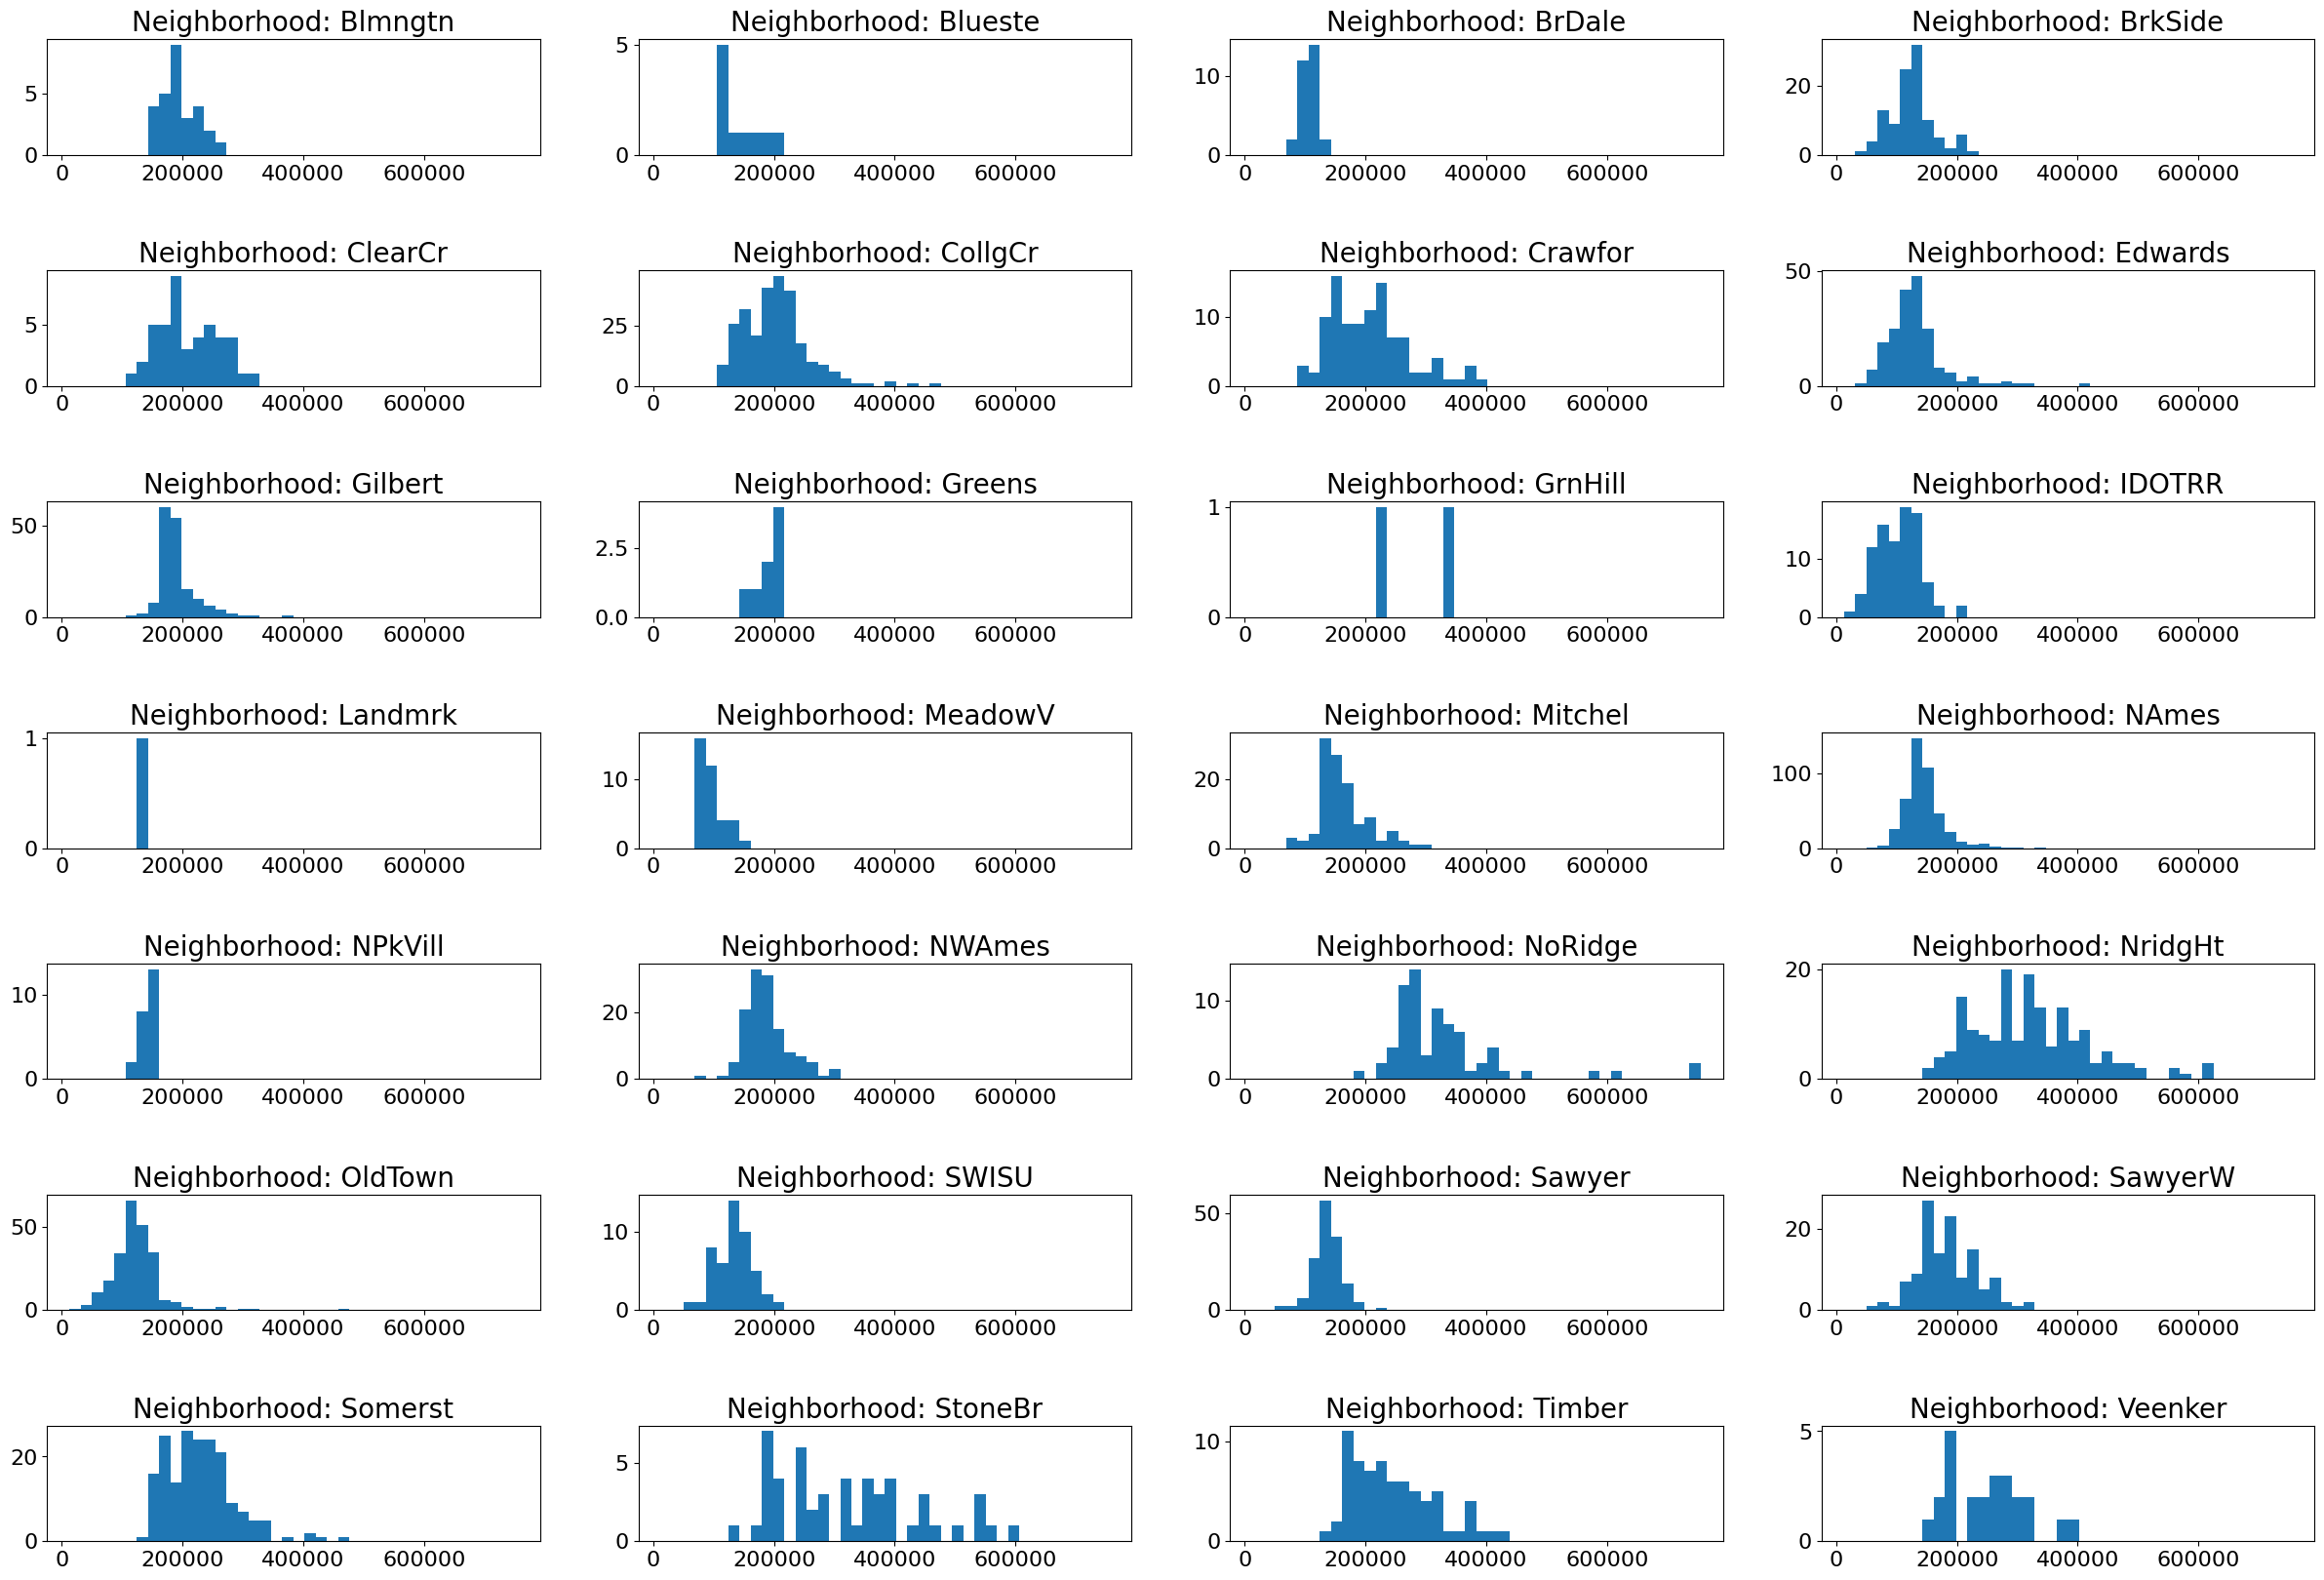

In [263]:
# Prepare the canvas' of the subplots.
plt.subplots(
    
    nrows   = n_row,
    ncols   = n_col_max,
    figsize = (30,20)
);

# So, the zip function allows the for loop to iterate through multiple lists, index by index.
# In the first iteration i is equal to 1 and col is equal to 'Blmngtn'.
for n_i, c_col in zip(v_idx, df_updated_pivot.columns):

    # Go to the i-th subplot.
    plt.subplot(n_row, n_col_max, n_i)

    # Locate column col and plot a histogram.
    # df_updated_pivot.loc[:, c_col].plot.hist(
        
    #     label = c_col,
    #     #range = (400000, df_updated['SalePrice'].max()),
    #     range = (df_updated['SalePrice'].min(), df_updated['SalePrice'].max()),
    #     bins  = 40
    # )

    plt.hist(

        x     = df_updated_pivot.loc[:, c_col],
        label = c_col,
        bins  = 40,

        # As before, we fix the x-axis. If not done before, see what happens when you do not include the parameter range.
        range = (df_updated['SalePrice'].min(), df_updated['SalePrice'].max())

        # Alternatively, to quickly see which neighborhoods have sale prices exceeding 400k.
        #range = (400000, df_updated['SalePrice'].max())
        
    )

    # Two ways to combine fixed and variable strings.
    #plt.title('Neighborhood: {}'.format(col))
    plt.title(f'Neighborhood: {c_col}')

# Manage white space surrounding the subplots.
plt.subplots_adjust(
    
    left   = None,
    bottom = None,
    right  = None,
    top    = None,
    wspace = None,
    hspace = 1
)

##### Using Seaborn

The `FacetGrid()` function makes life easier..

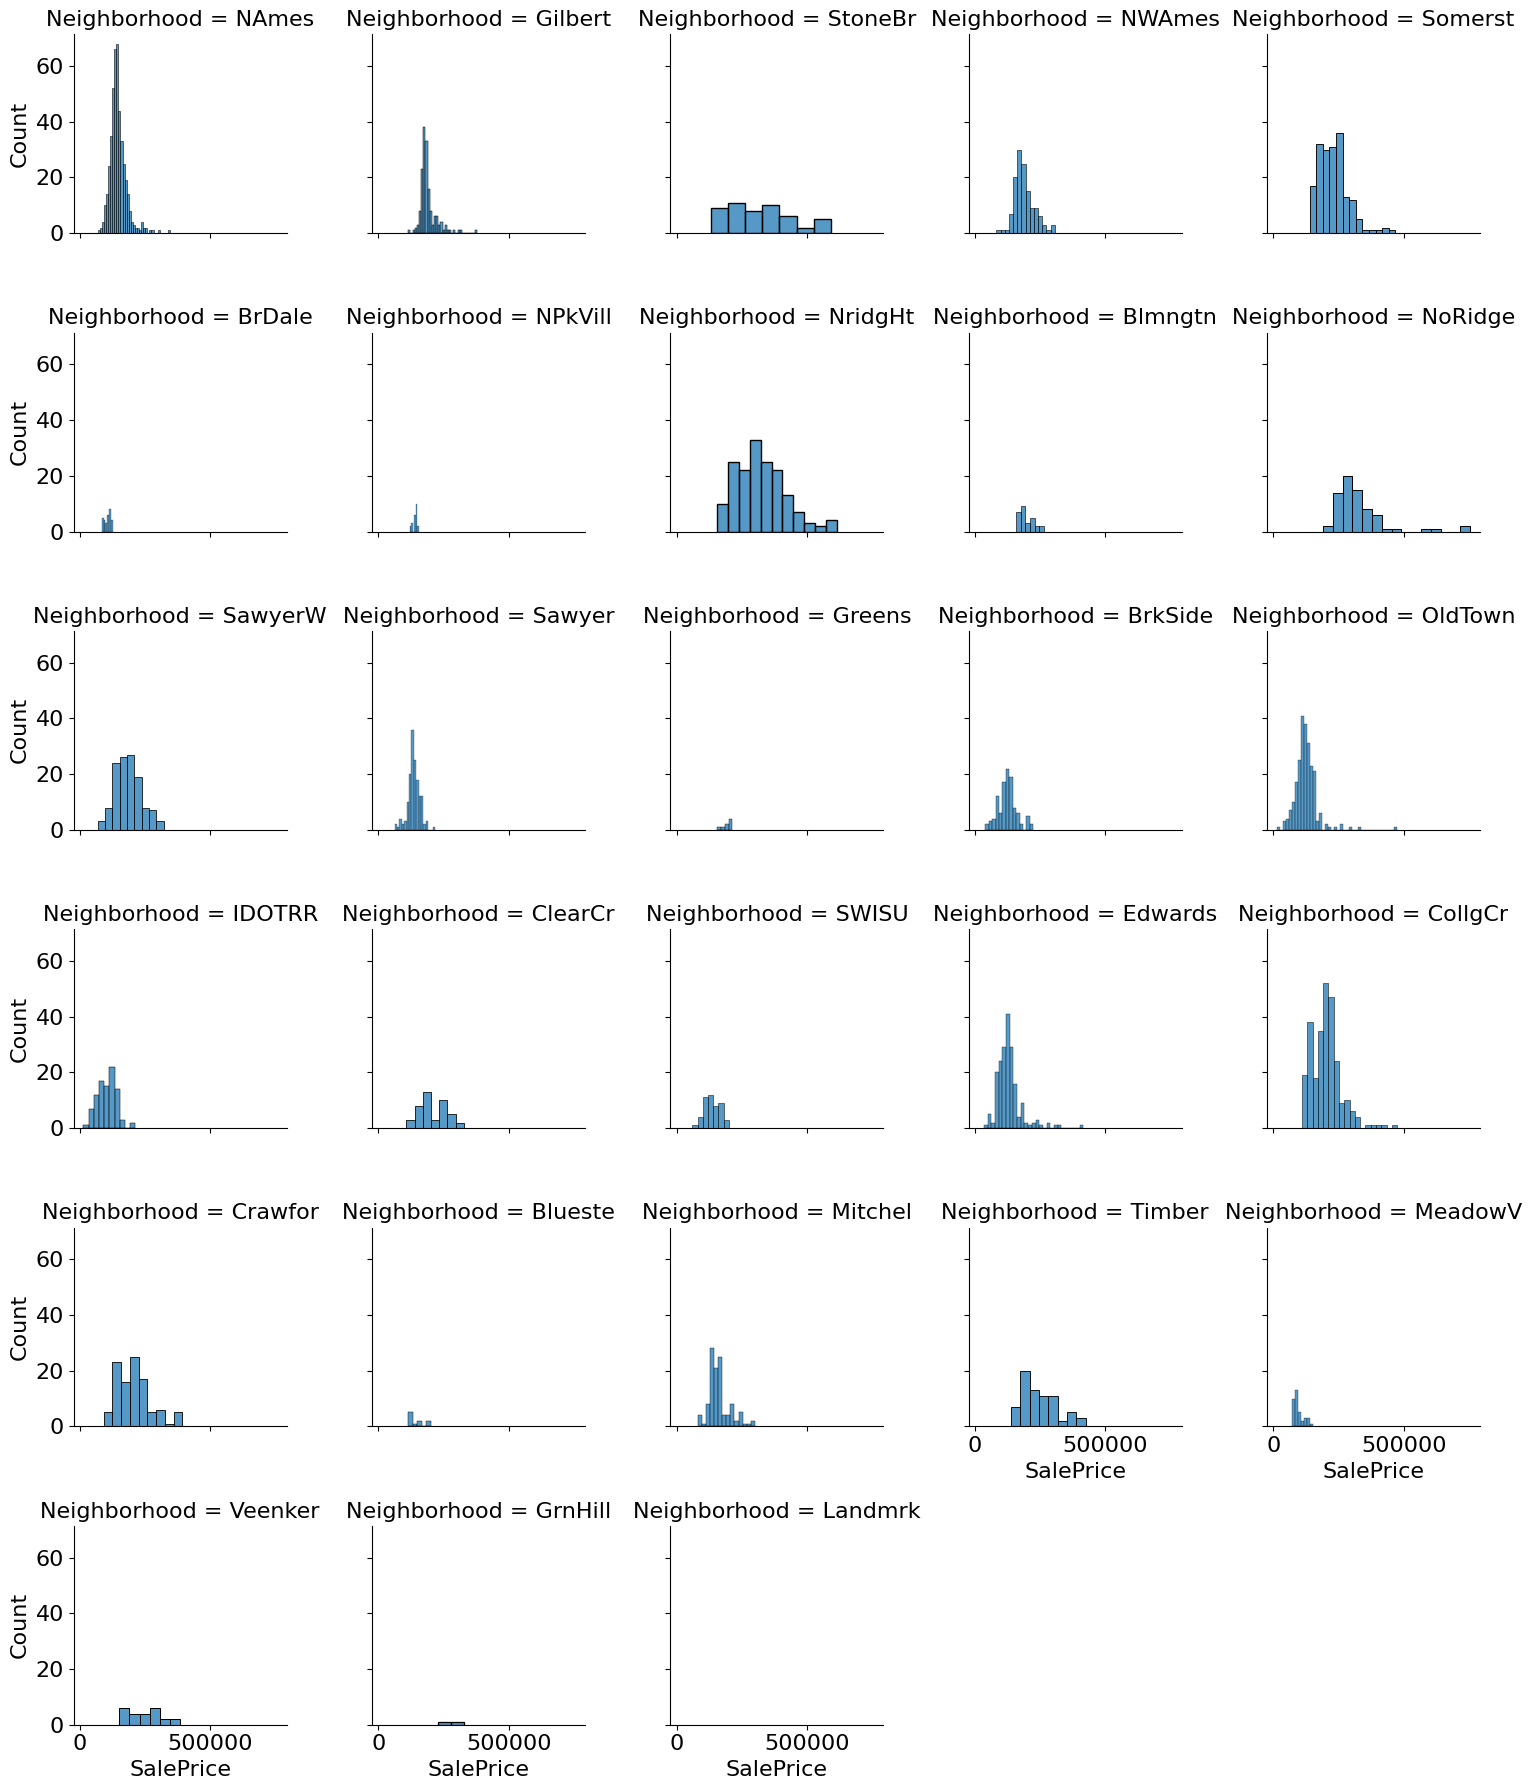

In [264]:
# Initialize:
plt.rc('font', size=10)

g = sns.FacetGrid(
    
    data     = df_updated,
    col      = "Neighborhood",
    col_wrap = 5
)

# Apply the sns.histplot to each grid element in g.
g.map(sns.histplot, 'SalePrice');

# Manage white space surrounding the subplots.
plt.subplots_adjust(
    
    hspace=0.5,
    wspace=0.4
)


#### Look at differences between neighborhoods

In the section below, we will look at the influence of neighborhood on the sale price. In the same way we can look at differences between housing styles, this is not covered in this notebook.

The function `f_neighborhood_order()` is used to order the neighborhoods by the median value of a given numberial feature (`c_col`) in the given data (`df_input`). In the example below, we order the neighborhoods by `SalePrice`. The result shows that MeadowV has the lowest median value for `SalePrice` and StoneBr has the highest.

In [265]:
v_neighborhood_order_by_saleprice = f_neighborhood_order(df_input = df_updated, c_col = 'SalePrice')

v_neighborhood_order_by_saleprice

array(['MeadowV', 'BrDale', 'IDOTRR', 'OldTown', 'Edwards', 'BrkSide',
       'Blueste', 'Sawyer', 'SWISU', 'Landmrk', 'NAmes', 'NPkVill',
       'Mitchel', 'SawyerW', 'NWAmes', 'Gilbert', 'Blmngtn', 'ClearCr',
       'Greens', 'CollgCr', 'Crawfor', 'Somerst', 'Timber', 'Veenker',
       'GrnHill', 'NoRidge', 'NridgHt', 'StoneBr'], dtype=object)

Earlier the function `f_describe()` showed that the data consists of 28 neighborhoods. This is also observed when determining the length of `v_neighborhood_order_by_saleprice`. So, that's good.

In [266]:
len(v_neighborhood_order_by_saleprice)

28

Before we look at the differences between neighborhoods, let's see how many houses have been sold in each neighborhood. Seaborn's `countplot()` function plots the frequency of the values in a given categorical feature, i.e., `Neighborhood` in the example below ([ref](https://seaborn.pydata.org/generated/seaborn.countplot.html)). Using `v_neighborhood_order_by_saleprice`, the neighborhoods along the x-axis are ordered by the median of the sale price in the concerned neigherhood. So, we have the expensive areas to the right and the less expensive areas to the left.

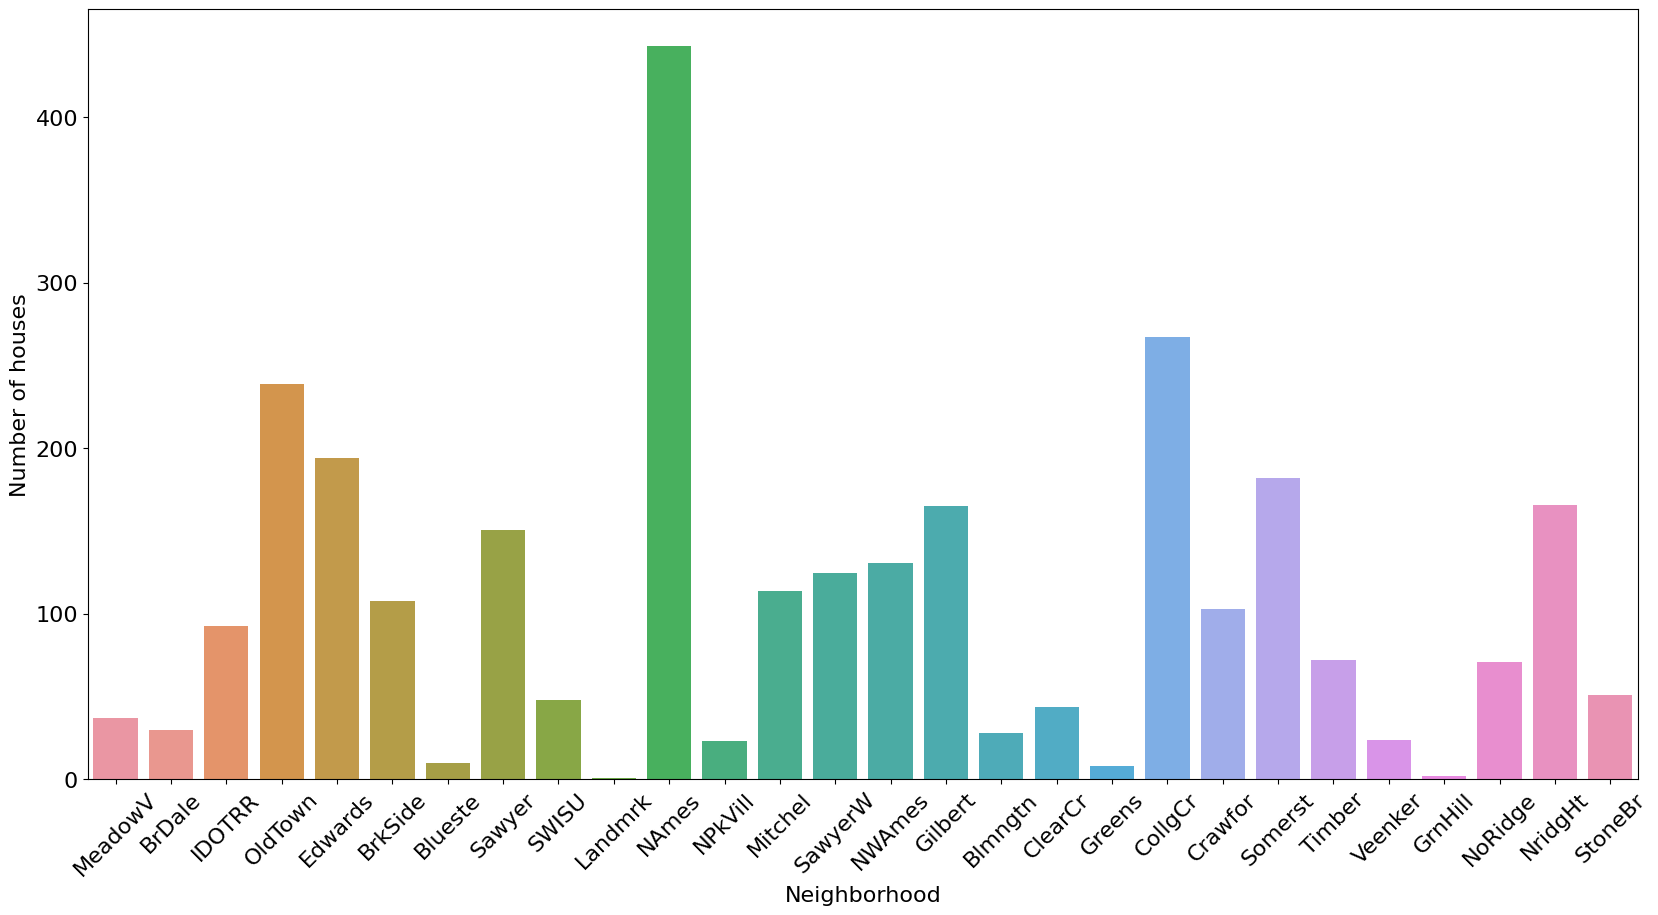

In [267]:
sns.countplot(
    
    data  = df_updated,
    x     = "Neighborhood",
    order = v_neighborhood_order_by_saleprice
);

plt.xticks(rotation=45);
plt.xlabel("Neighborhood")
plt.ylabel("Number of houses");

##### Scatterplots using Matplotlib

Scatterplots are an easy way to study correlation between two features ([ref](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)).

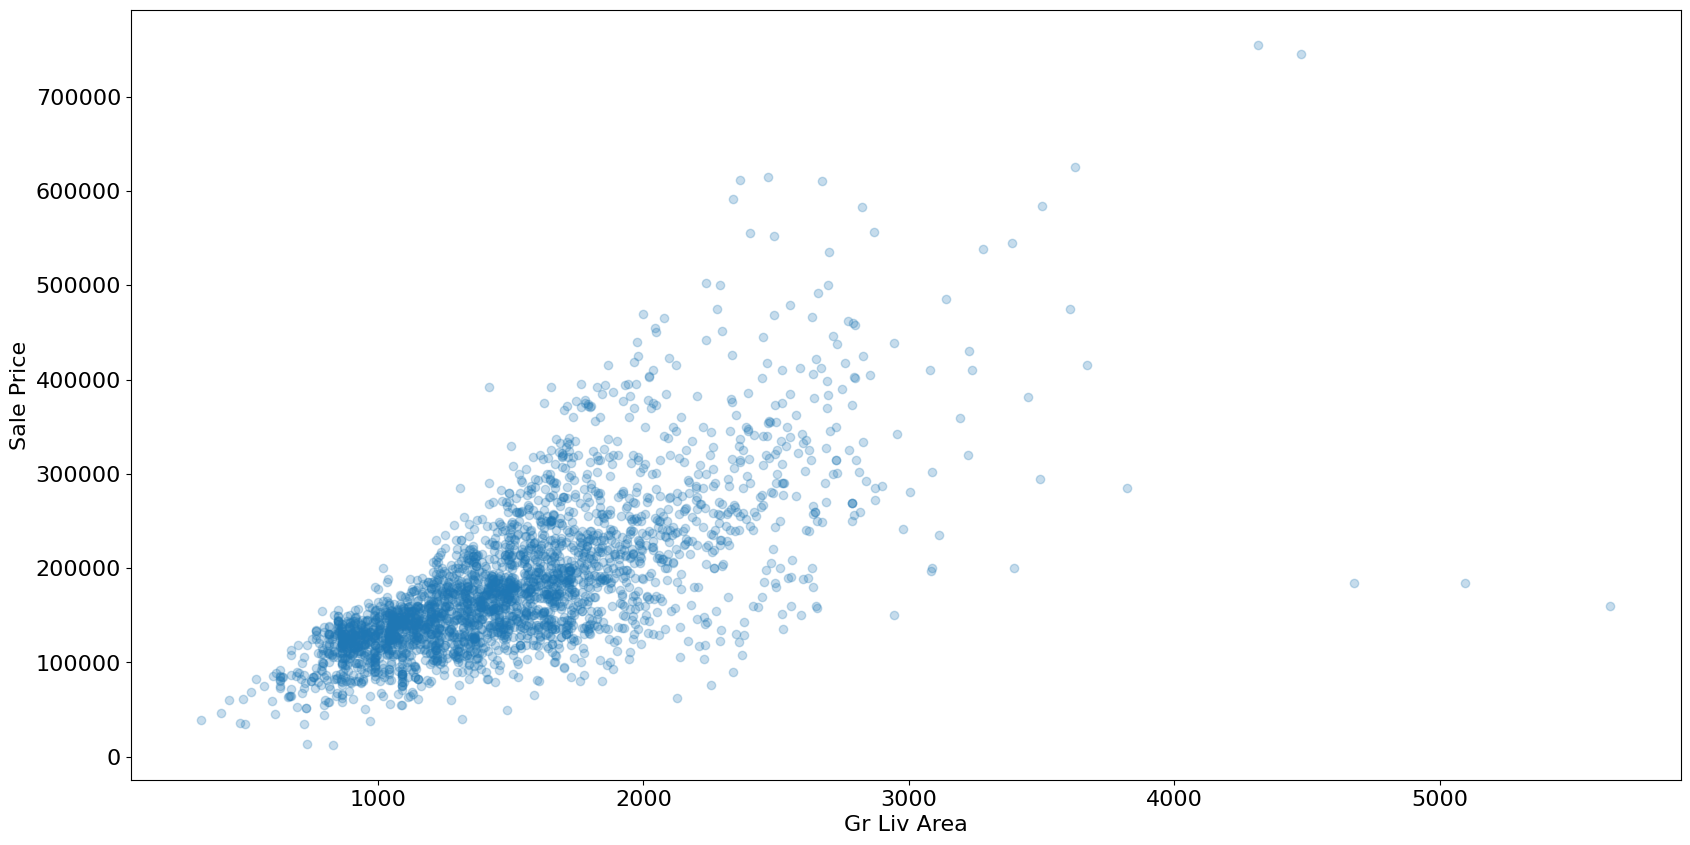

In [268]:
# Initialize:
c_x = "Gr Liv Area"
#c_x = "1st Flr SF"

# Scatter:
plt.scatter(x = df_updated[c_x], y = df_updated['SalePrice'], alpha=0.25)
plt.xlabel(c_x)
plt.ylabel("Sale Price");

In [269]:
# Mini-Intermezzo - The function isin() is used to obtain a True or False when evaluating whether the neighborhood is
# one of the three neighborhoods with the highest median sale price, 'NoRidge', 'NridgHt', and 'StoneBr'.
df_updated['Neighborhood'].isin(list(v_neighborhood_order_by_saleprice[25:28]))[0:10]

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8     True
9    False
Name: Neighborhood, dtype: bool

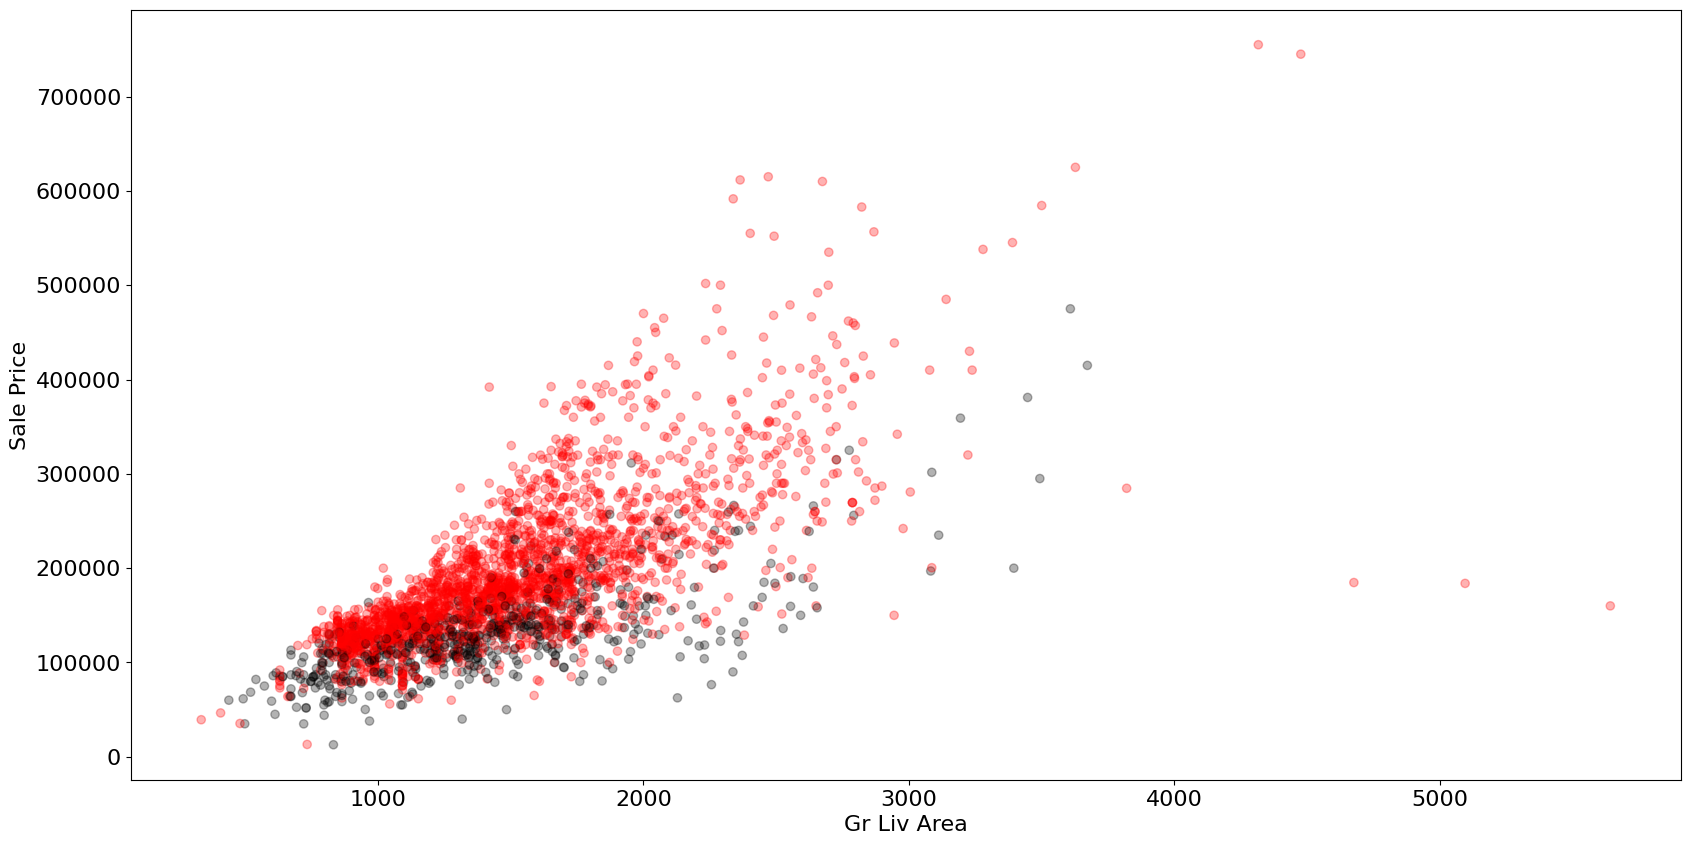

In [270]:
#c_x   = "1st Flr SF"
#c_x   = "2nd Flr SF"
c_x = "Gr Liv Area"

# Check sale price per square feet of living area:
# Scenario 1 - Houses in neighborhoods with low and high median sale prices.
# c_col = np.where(
    
#     df_updated['Neighborhood'].isin(list(v_neighborhood_order_by_saleprice[25:28])),
#     'red',
#     'black'
# )

# Scenario 2 - Houses that were built before or after 1945.
c_col = np.where(
    
    pd.to_numeric(df_updated['Year Built']) > 1945,
    'red',
    'black'
)

# Scatter:
plt.scatter(
    x     = df_updated[c_x],
    y     = df_updated['SalePrice'],
    c     = c_col,
    alpha = 0.3
)

plt.xlabel(c_x)
plt.ylabel("Sale Price");

Scenario 1 suggests that houses in 'NoRidge', 'NridgHt', and 'StoneBr' have a higher sale price per square feet living area than houses sold in other neighborhoods.

Scenario 2 suggestts that houses built after 1945 have a higher sale price per square feet living area than houses built before 1945.

##### Scatterplot using Seaborn

The plot below shows how seaborn's `scatterplot()` function can directly make use of a categorical feature - 'Neighborhood' in this case - to give data points different colors ([ref](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)).

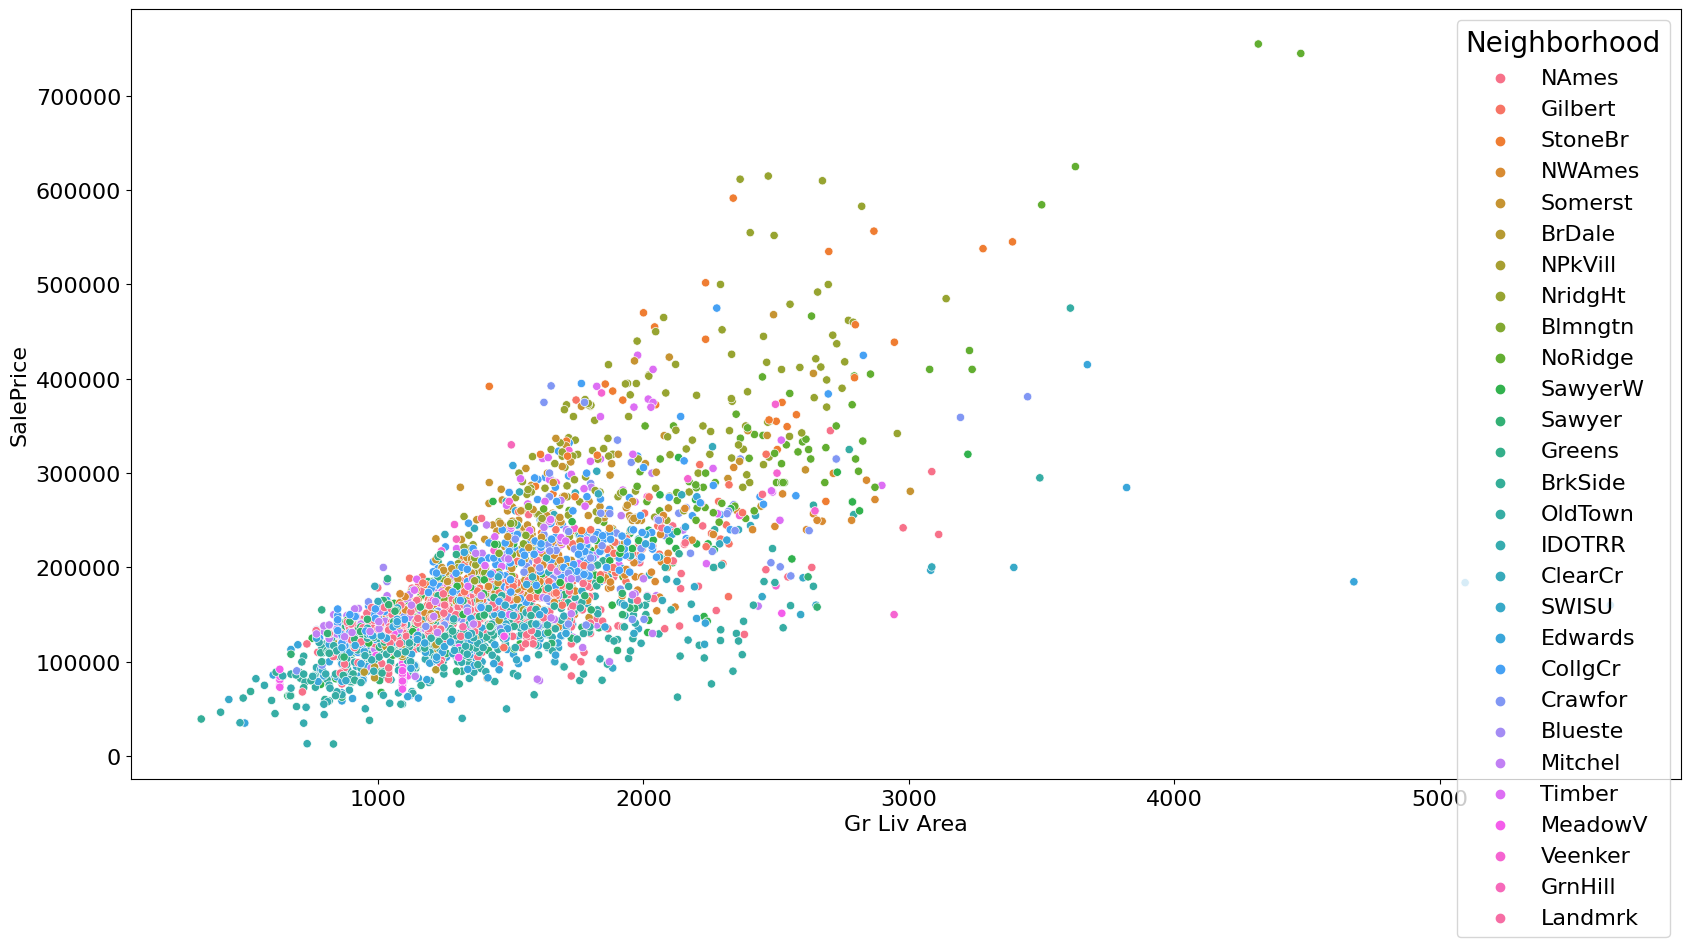

In [271]:
c_x   = "Gr Liv Area"
#c_x   = "1st Flr SF"

sns.scatterplot(
    
    data = df_updated,
    x    = c_x,
    y    = 'SalePrice',
    hue  = 'Neighborhood'
);

Looking at the length of the legend it is clear that this approach is not very informative. Therefore, we make use of `FacetGrid()` again.

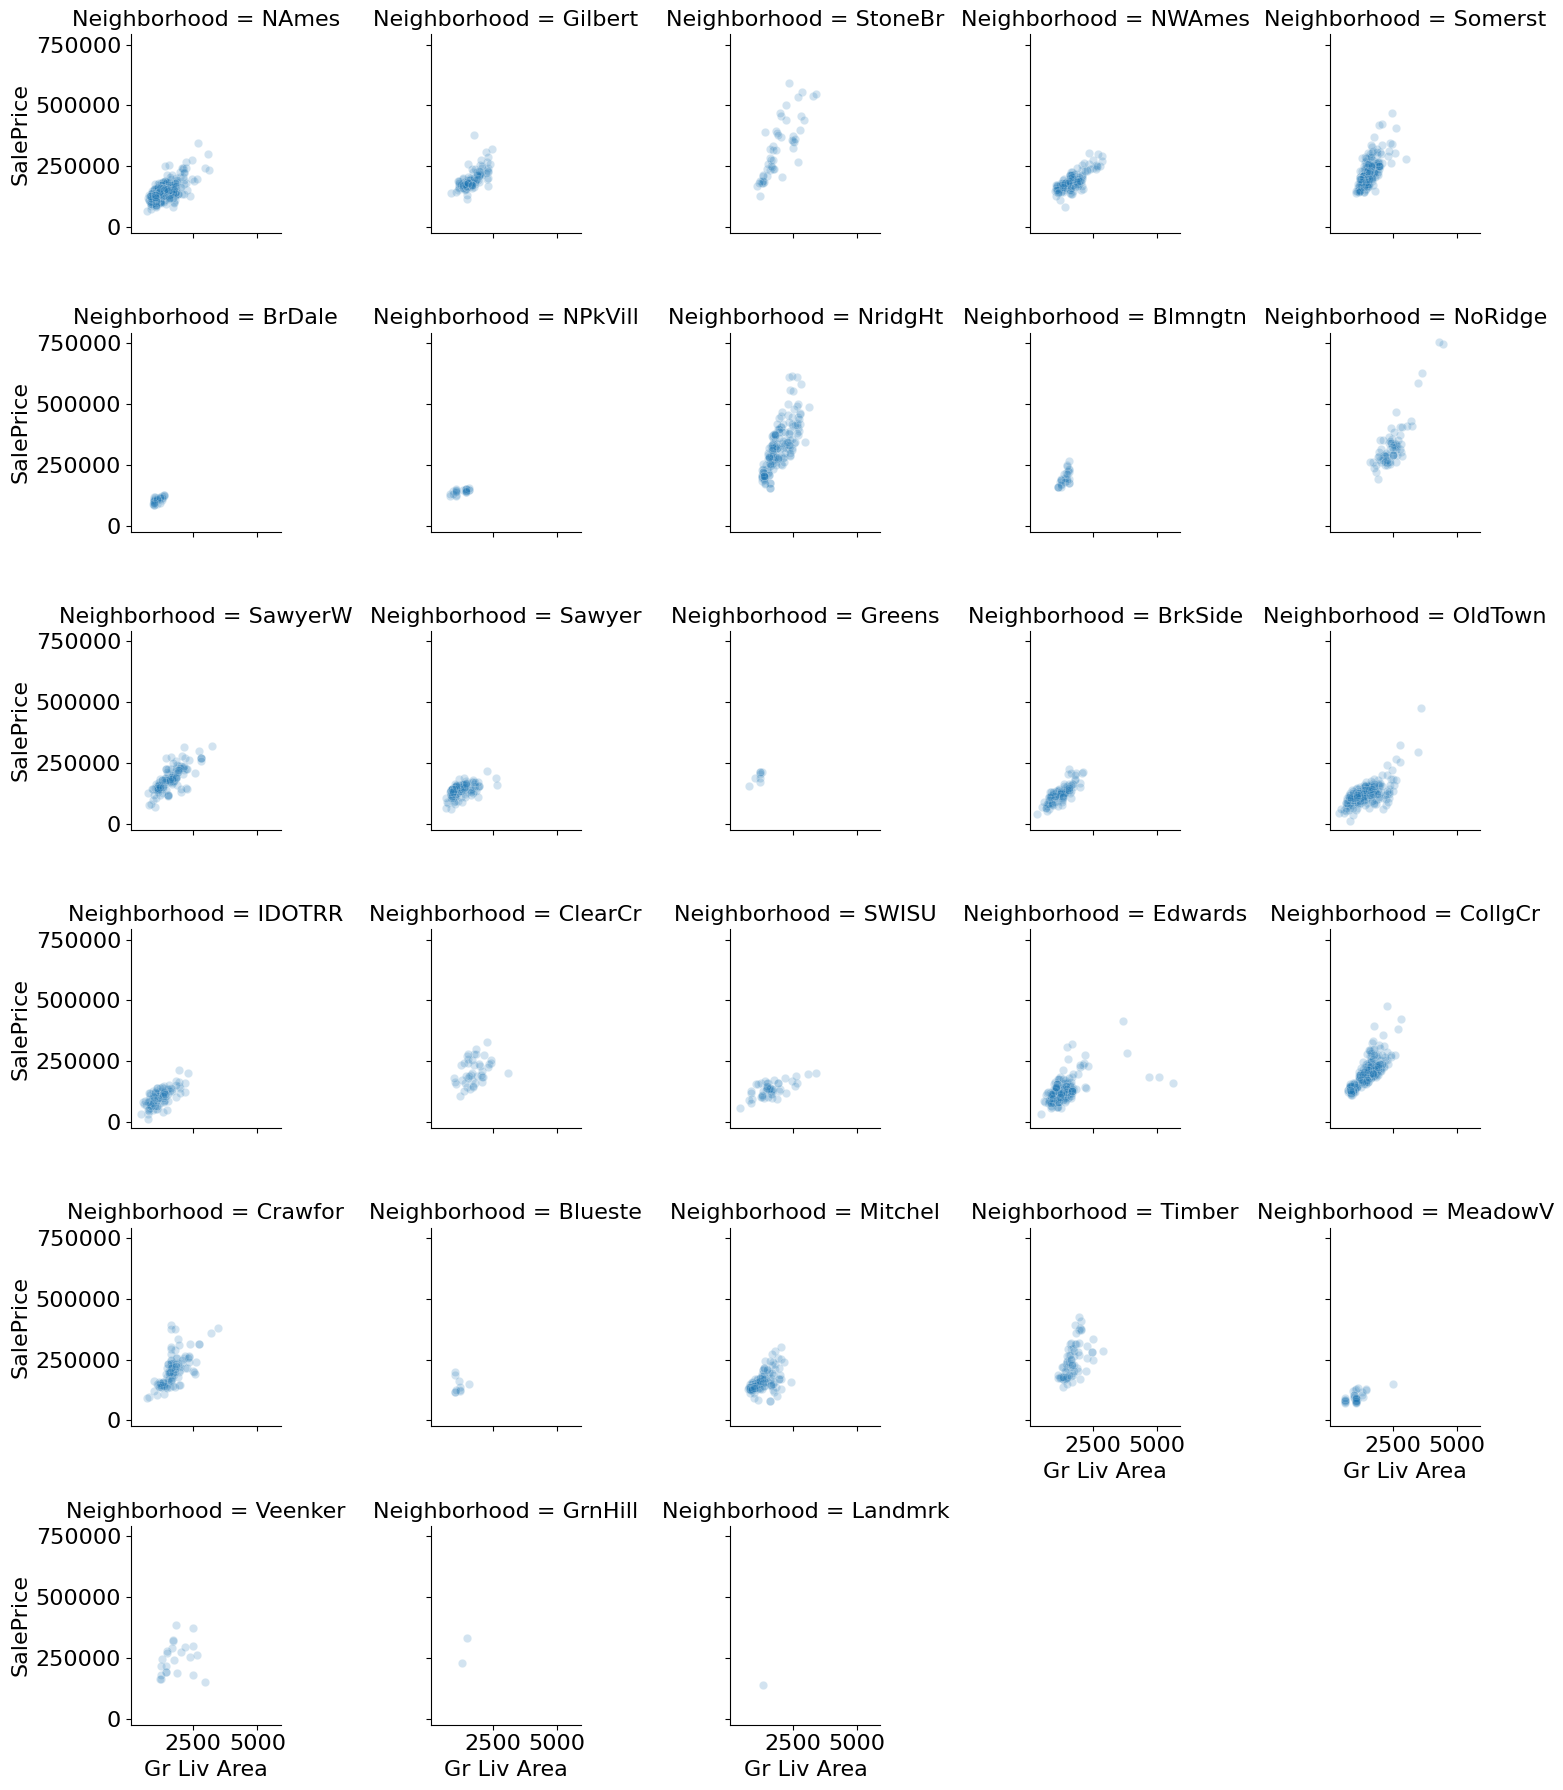

In [272]:
# Initialize:
plt.rc('font', size = 10)

g = sns.FacetGrid(
    
    data     = df_updated,
    col      = "Neighborhood",
    col_wrap = 5
)

# Apply the sns.histplot to each grid element in g.
g.map(sns.scatterplot, c_x, 'SalePrice', alpha = 0.2);

# Manage white space surrounding the subplots.
plt.subplots_adjust(
    
    hspace = 0.5,
    wspace = 1
)

The figure above suggests that houses sold in the more expensive areas - like 'NridgHt' and 'StoneBr' - have a higher sale price per square feet of living area, than in the less expensive areas, like 'MeadowV' and 'NPkVill'. Reducing the alpha helps to show the distribution of the data and whether there really is a trend or not. By default - with alpha equal to 1 - ten overlapping datapoints give the same impression as one data point.

Seaborn's `relplot()` function makes it even easier to plot relations between two features grouped by another feature and colored by yet another feature ([ref](https://seaborn.pydata.org/tutorial/relational.html)).

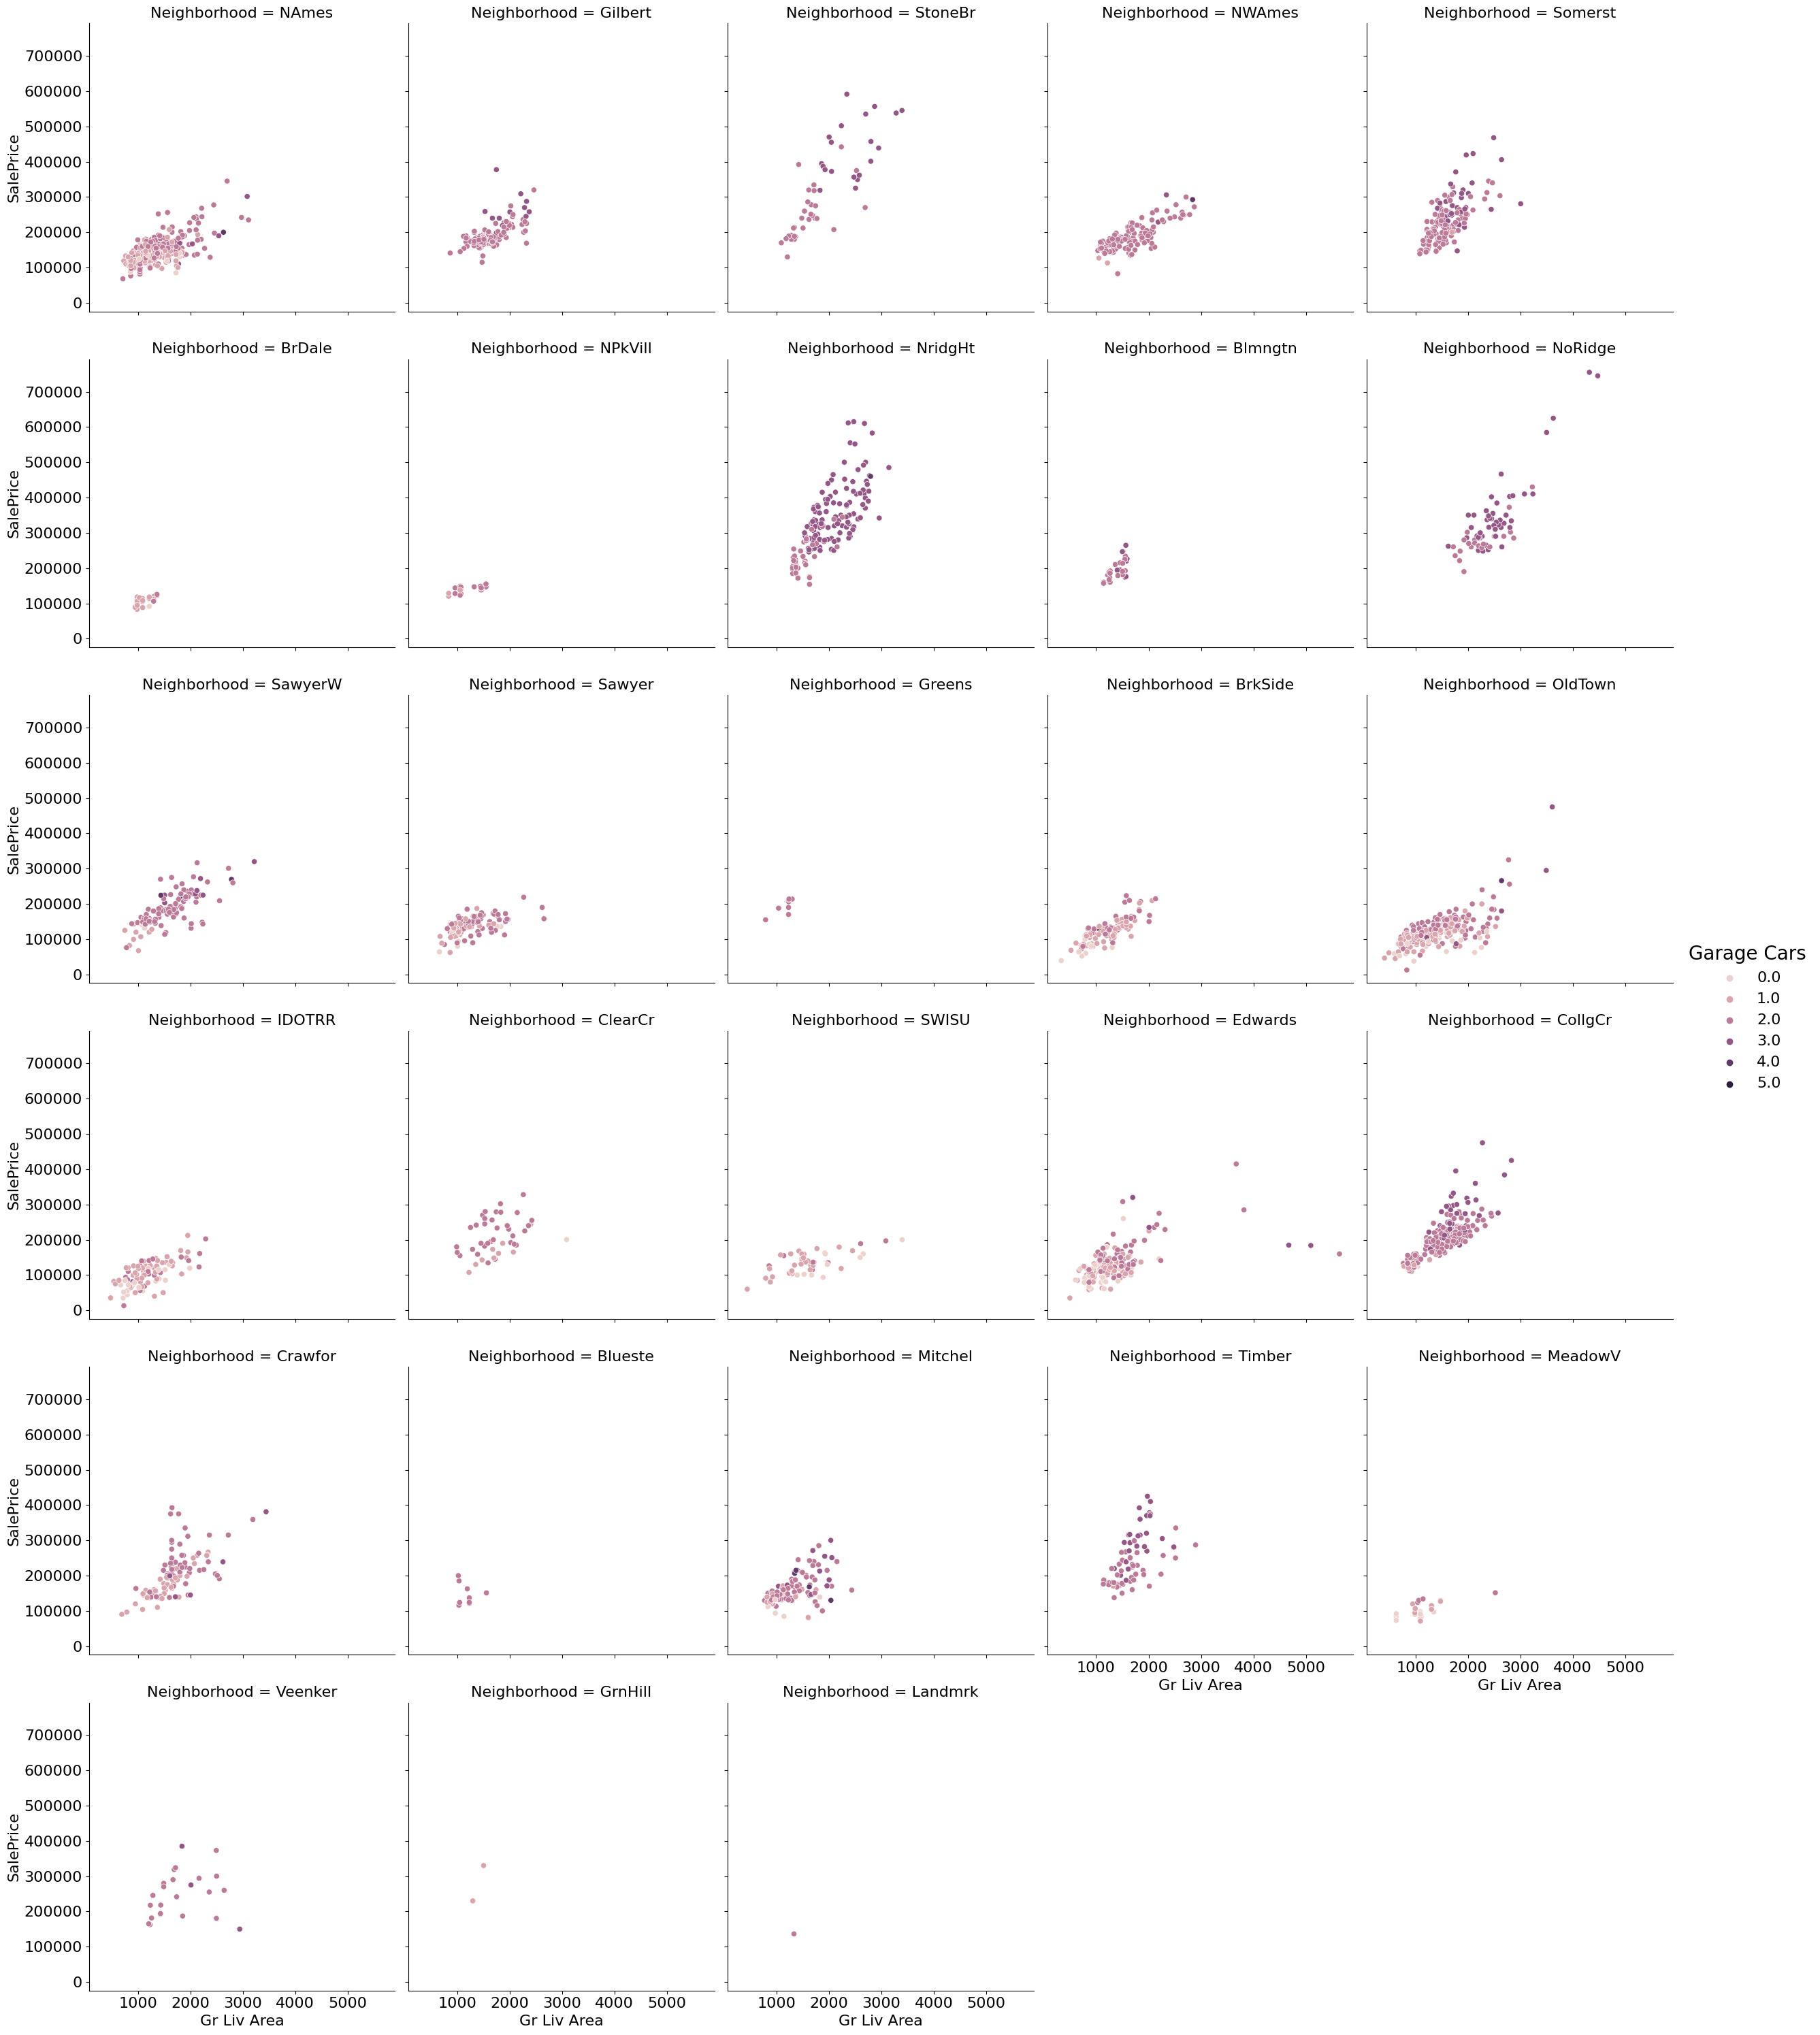

In [273]:
sns.relplot(
    
    data     = df_updated,
    x        = c_x,
    y        = "SalePrice",
    col      = "Neighborhood",
    hue      = "Garage Cars",
    col_wrap = 5
);

##### Boxplots using Seaborn

Boxplots can be easily made with Seaborn's boxplot() function ([ref](https://seaborn.pydata.org/generated/seaborn.boxplot.html)). In the example below, the distribution of the living area is given for each neighborhood. Using `v_neighborhood_order_by_saleprice` the neighborhoods are ordered by the median of the sale price in the concerned neigherhood. This you can easily see when you assing `c_col` to `SalePrice` instead of `Gr Liv Area`. The median value - the horizontal line in the middle of the IQR box - goes up steadily from left to right.

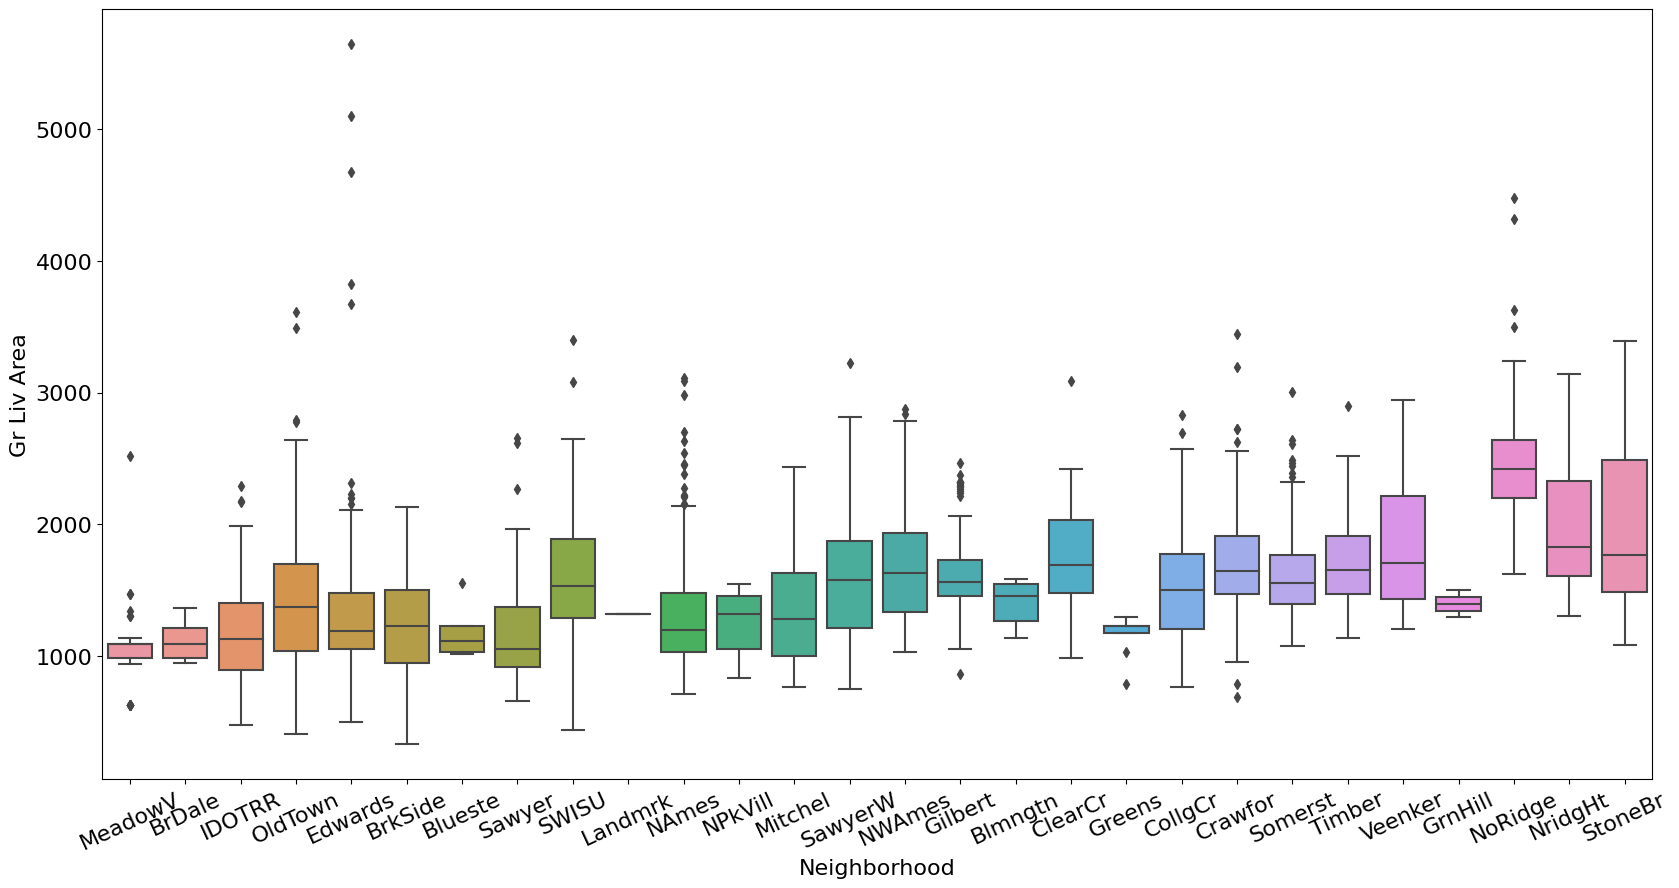

In [274]:
#c_col = 'SalePrice'
c_col = 'Gr Liv Area'

sns.boxplot(
    
    data  = df_updated,
    x     = 'Neighborhood',
    y     = c_col,
    order = v_neighborhood_order_by_saleprice);

plt.xticks(rotation = 25);

Seaborn's `histplot()` function allows plotting of 2D histograms, when - besides a value for `x` - also a value for `y` is provided ([ref](https://seaborn.pydata.org/generated/seaborn.histplot.html)). The way to *read* this plot is to imagine you view a stack of histograms from above. One histogram for each neighborhood. The higher the frequency the darker the square.

The histplot does not have the option to include an `order` parameter. So, if we want to order the neighborhood using v_neighborhood_order_by_saleprice, we need to convert the Neighborhood feature to a categorical type. For this, we use Panda's `Categorical()` function ([ref](https://pandas.pydata.org/docs/user_guide/categorical.html#operations)).

In [275]:
df_updated_temp = df_updated.copy()

df_updated_temp['Neighborhood'] = pd.Categorical(df_updated_temp['Neighborhood'], v_neighborhood_order_by_saleprice)

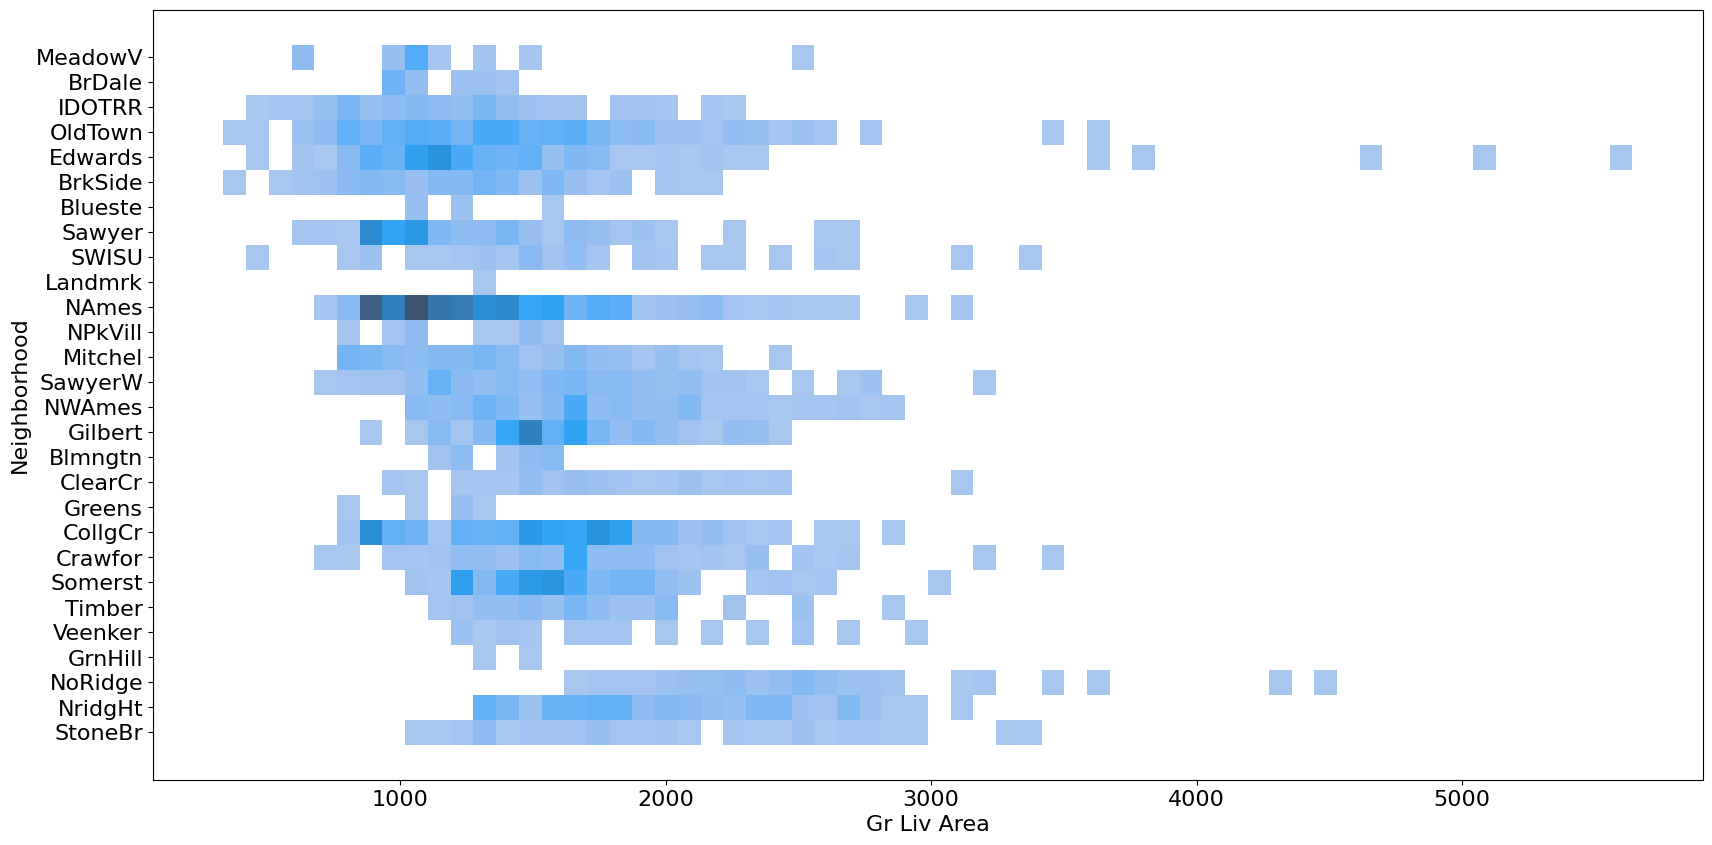

In [276]:
sns.histplot(
    
    data   = df_updated_temp,

    x      = "Gr Liv Area",
    #x     = "SalePrice",

    y      = 'Neighborhood');

A different way of looking at distributions is by plotting the cumulative counts using the empirical cumulative distribution function ([ECDF](https://seaborn.pydata.org/tutorial/distributions.html)). This plot draws a monotonically-increasing curve through each datapoint such that the height of the curve reflects the proportion of observations with a smaller value. So, a steeper line means a narrower distribution. The ECDF plot has two key advantages:

1. Unlike the histogram or KDE, it directly represents each datapoint. That means there is no bin size or smoothing parameter to consider, and

2. since ECDF curves are monotonically increasing, it is well-suited for comparing multiple distributions.

In the example below, we plot the three least expensive neighborhoods. We observe that 'BrDale' has a narrower `SalePrice` distribution than 'IDOTRR' has.

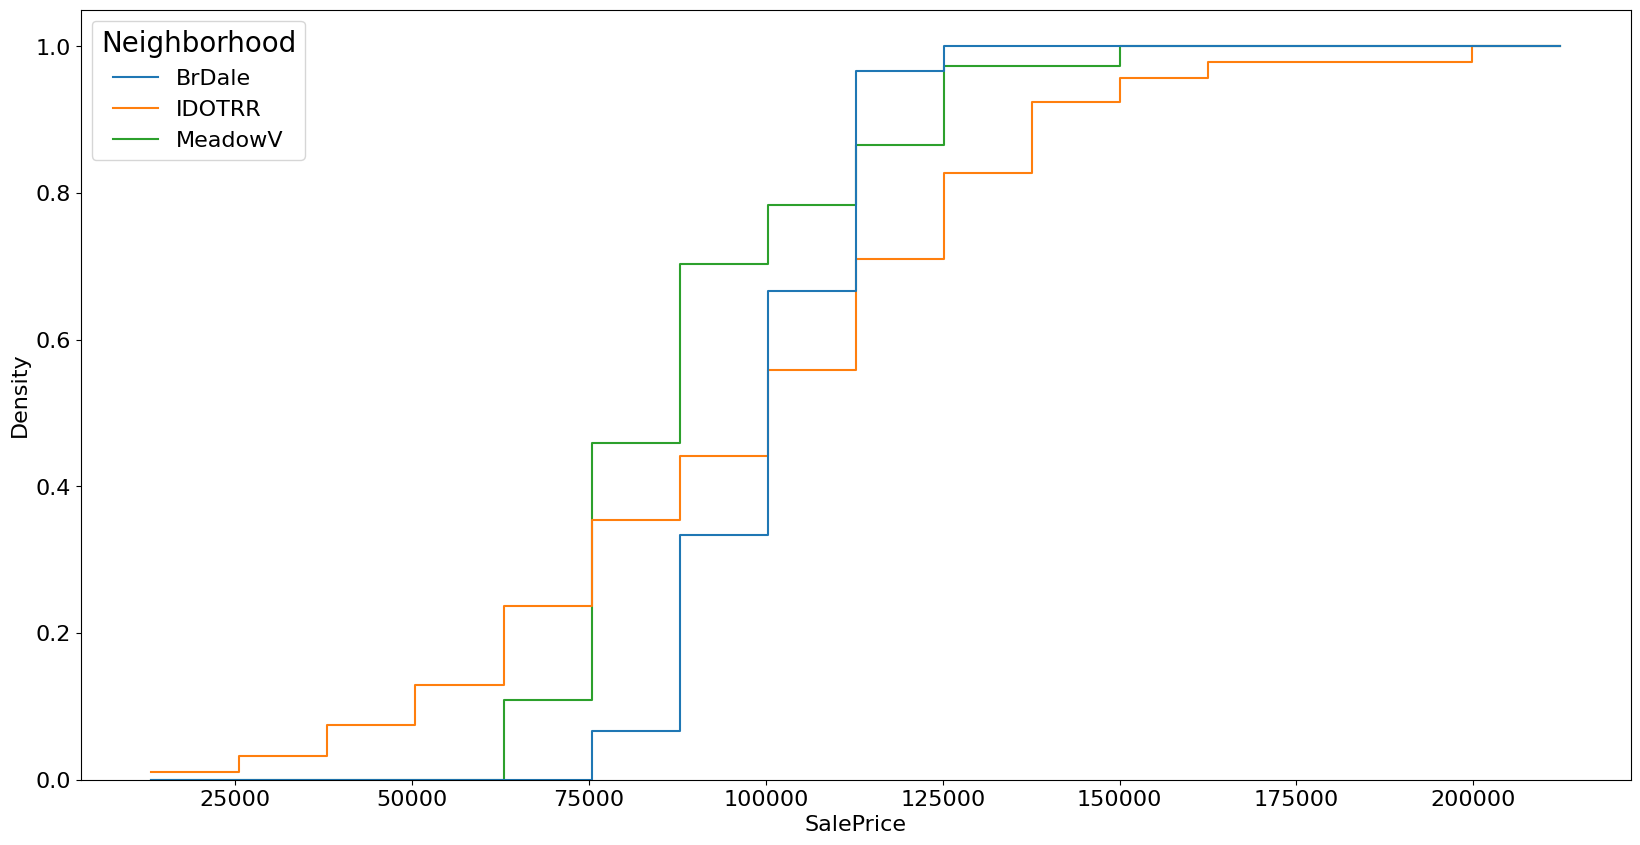

In [277]:
sns.histplot(
    
    data        = df_updated[df_updated['Neighborhood'].isin(v_neighborhood_order_by_saleprice[0:3])],
    x           = "SalePrice",
    hue         = "Neighborhood",
    element     = "step",
    fill        = False,
    cumulative  = True,
    stat        = "density",
    common_norm = False,
    legend      = True
);

We can do this for all neighborhoods and group them by median sale price.

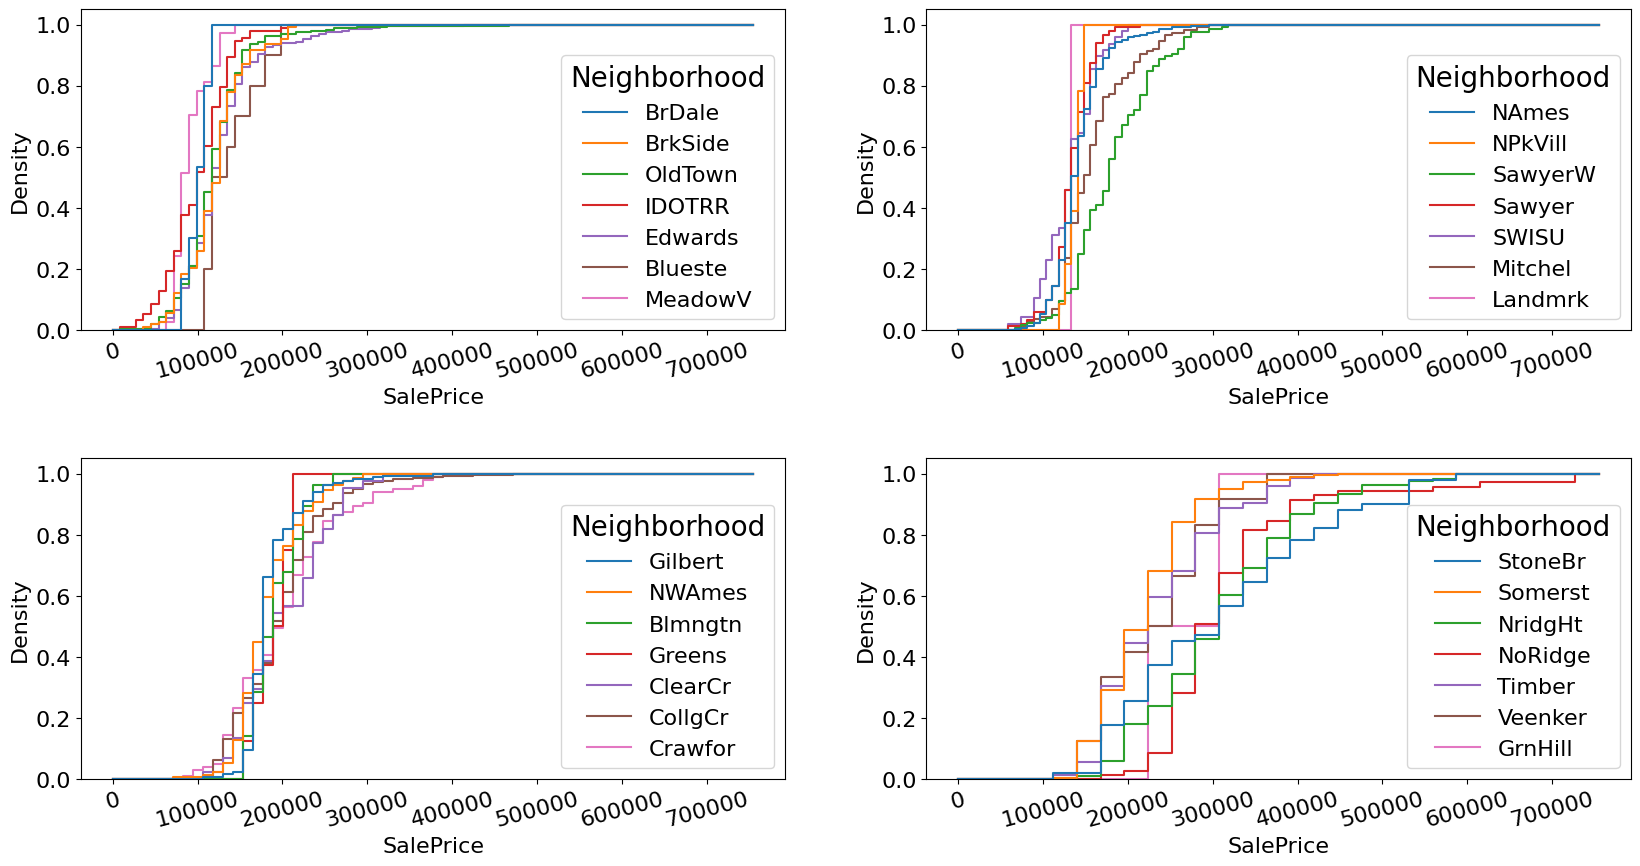

In [278]:
# Prepare the canvas' of the subplots.
plt.subplots(
    
    nrows   = 2,
    ncols   = 2,
    figsize = (20,10)
)


# In the first iteration i is equal to 1 and we plot the ECDF plot for the
# first seven neighborhoods in v_neighborhood_order_by_saleprice.
for n_i in range(1, 5):

    # Go to the i-th subplot.
    plt.subplot(2, 2, n_i)

    sns.histplot(
        
        data       = df_updated[df_updated['Neighborhood'].isin(v_neighborhood_order_by_saleprice[(n_i-1)*7: n_i*7])],
        x          = "SalePrice",
        hue         = "Neighborhood",
        element     = "step", 
        fill        = False,
        cumulative  = True,
        stat        = "density",
        common_norm = False,
        legend      = True,
        binrange    = (0, df_updated['SalePrice'].max())
    )

    plt.xticks(rotation=15);


# Manage white space surrounding the subplots.
plt.subplots_adjust(

    left   = None,
    bottom = None,
    right  = None,
    top    = None,
    wspace = None,
    hspace = 0.4
)

#### Draw a correlation plot to see all correlations between Y and the independent (number) variables (Hint: use df.plotting.scatter_matrix or seaborn.pairplot)

##### Scatter plots between Y and independent number features

Recall that we created an object `v_df_X_names` to have all numerical features in the data readily at hand. We will use this object to create scatterplots of each numerical feature against the SalePrice, using Seaborn's pairplot() function ([ref](https://seaborn.pydata.org/generated/seaborn.pairplot.html)). See also two Stackoverflow references ([ref1](https://stackoverflow.com/questions/31966494/compare-1-independent-vs-many-dependent-variables-using-seaborn-pairplot-in-an-h), [ref2](https://stackoverflow.com/questions/51400076/change-seaborn-pair-plot-figure-size/51403299)).

In [279]:
v_df_number_names

array(['Order', 'PID', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area',
       'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'], dtype=object)

Let's define a number of objects that we will use in the grid plot below.

In [280]:
n_num = len(v_df_number_names)
n_row = math.ceil(n_num/4)

print(n_num, n_row)

37 10


Seaborn's `pairplot()` function allows plotting of a series of scatterplots. So, the for loop does not have to iterate through each element in `v_df_X_names`. In the example below, we plot four scatterplots in one row at the time.

In [281]:
range(1, n_row + 1)

range(1, 11)

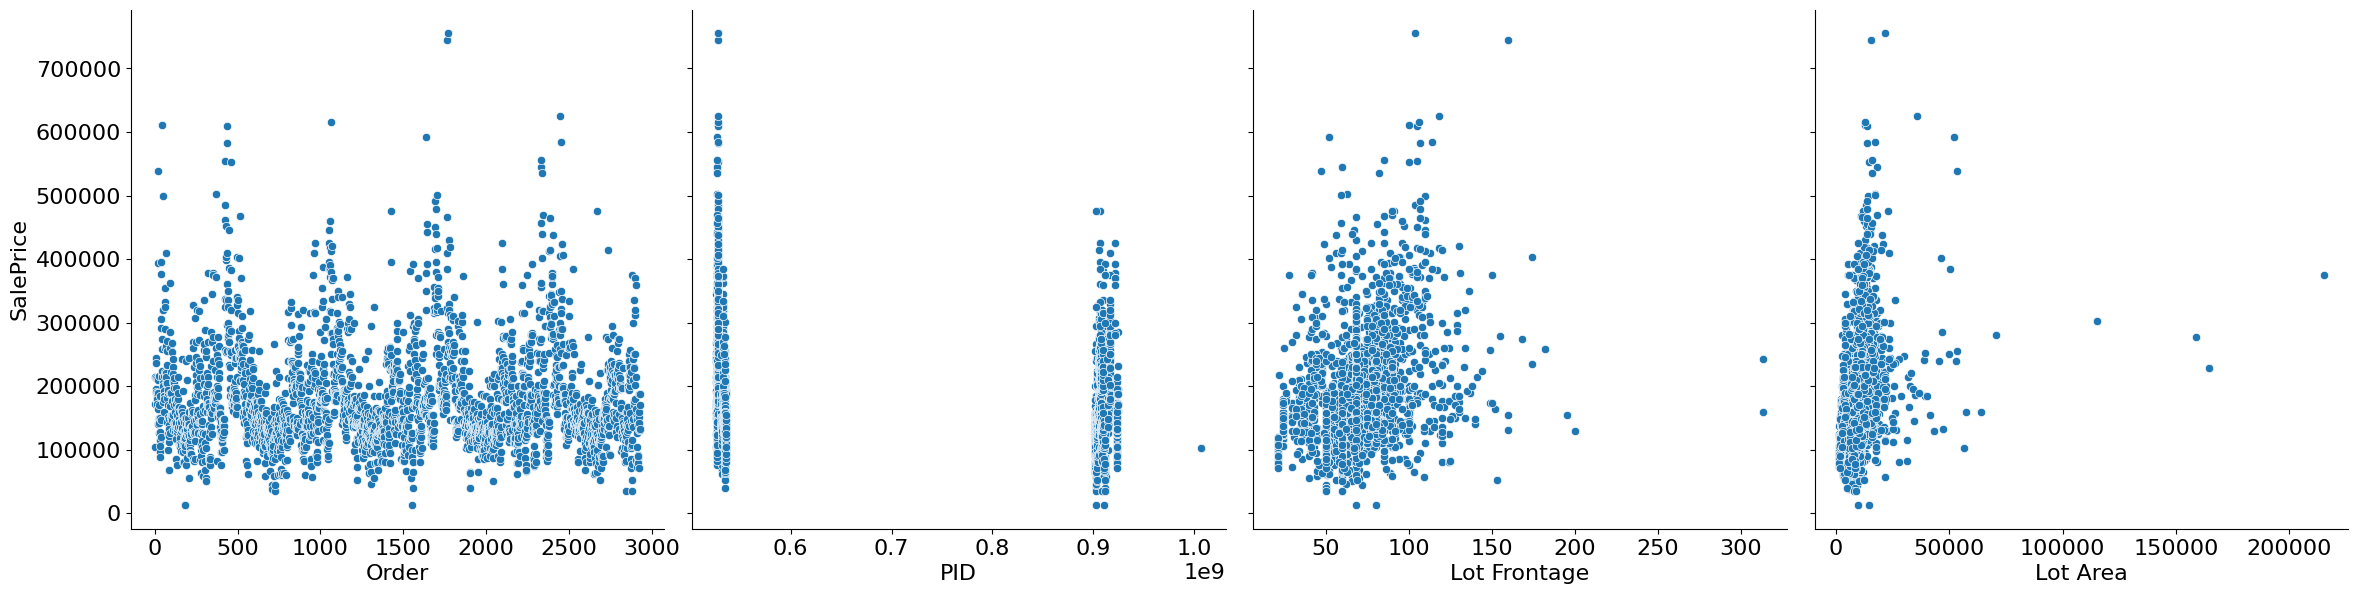

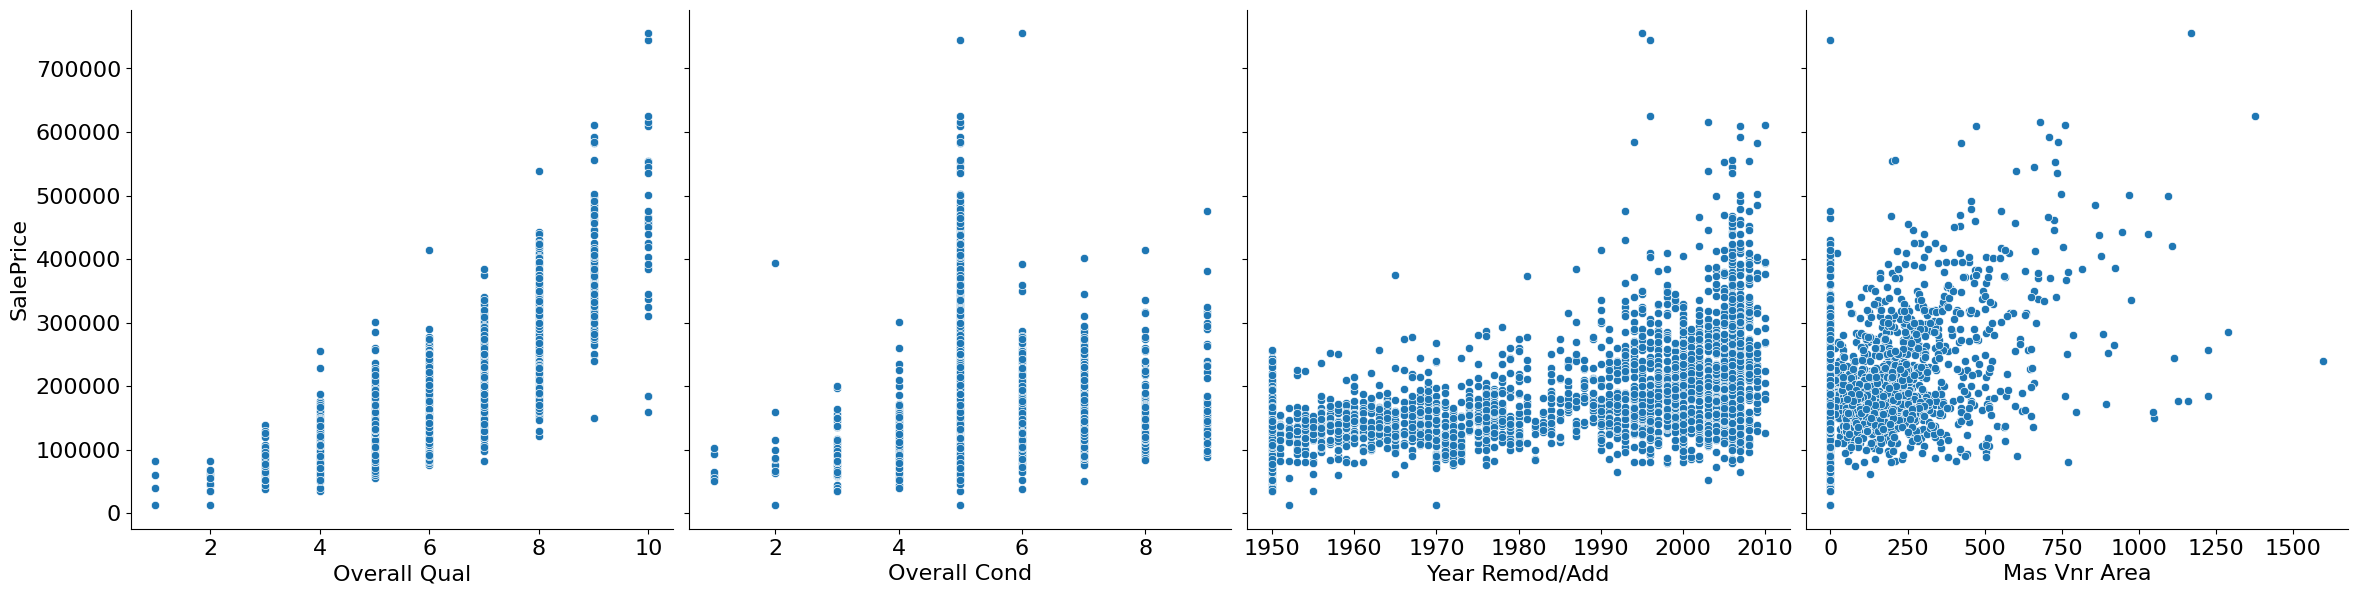

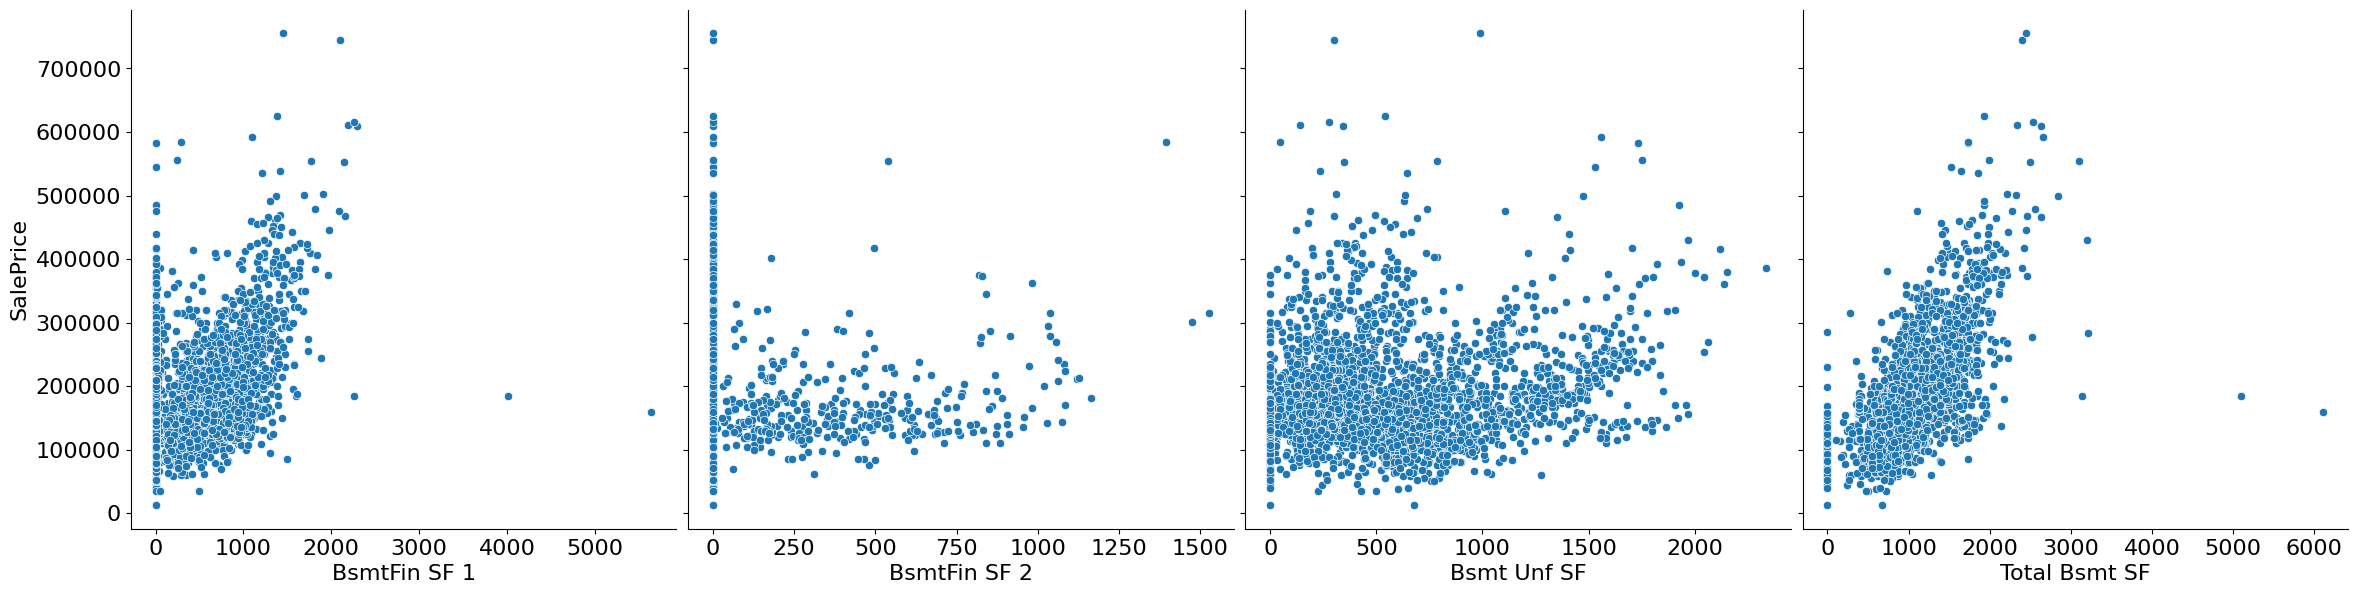

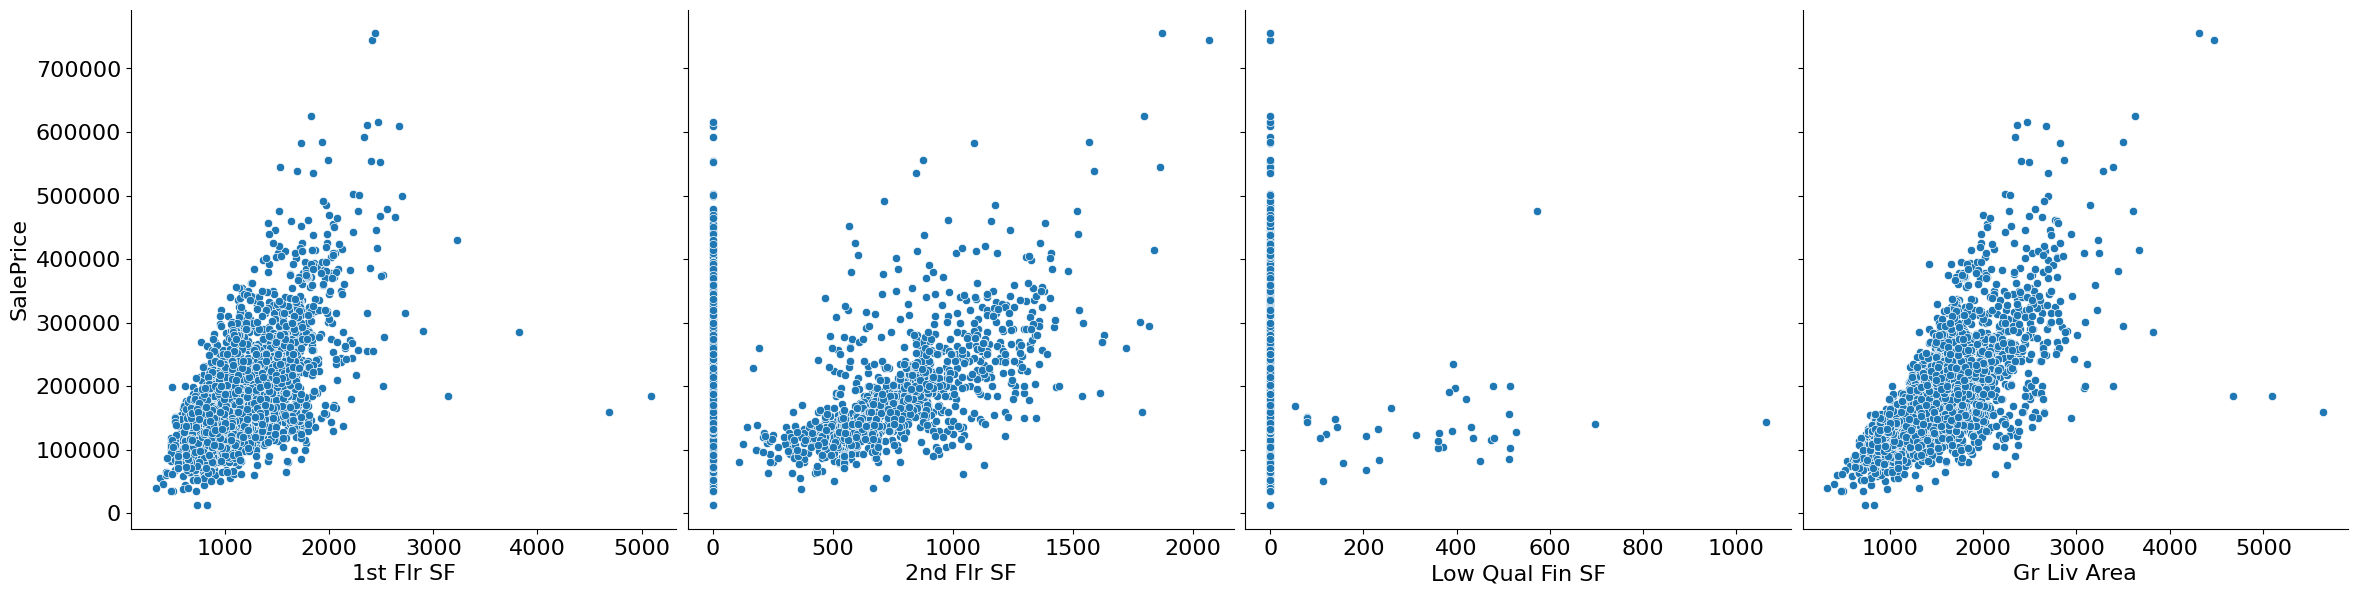

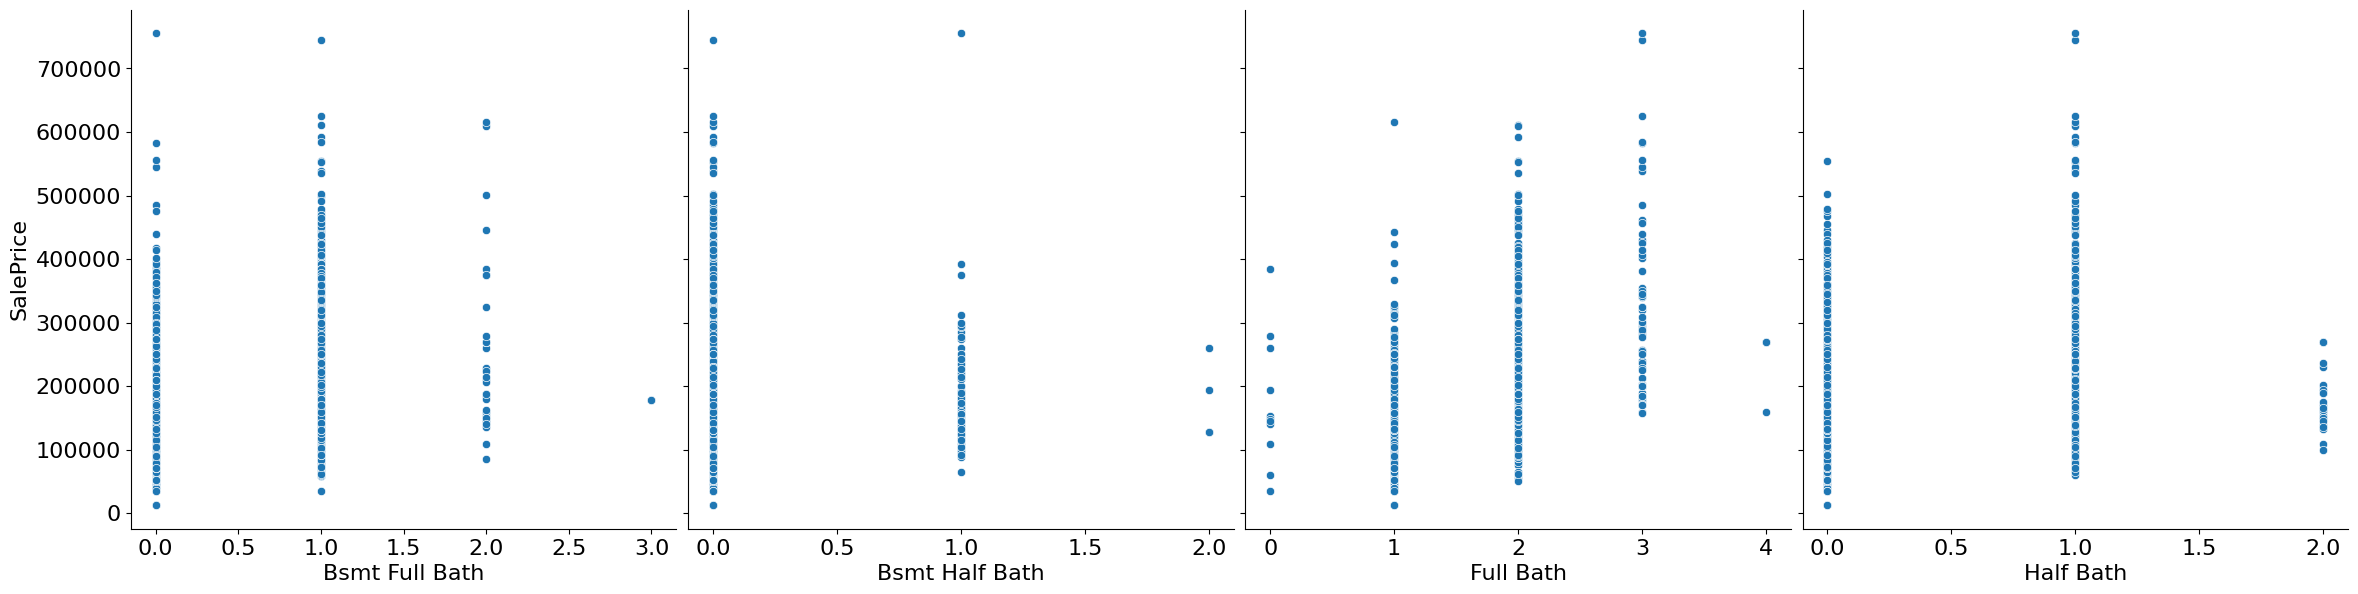

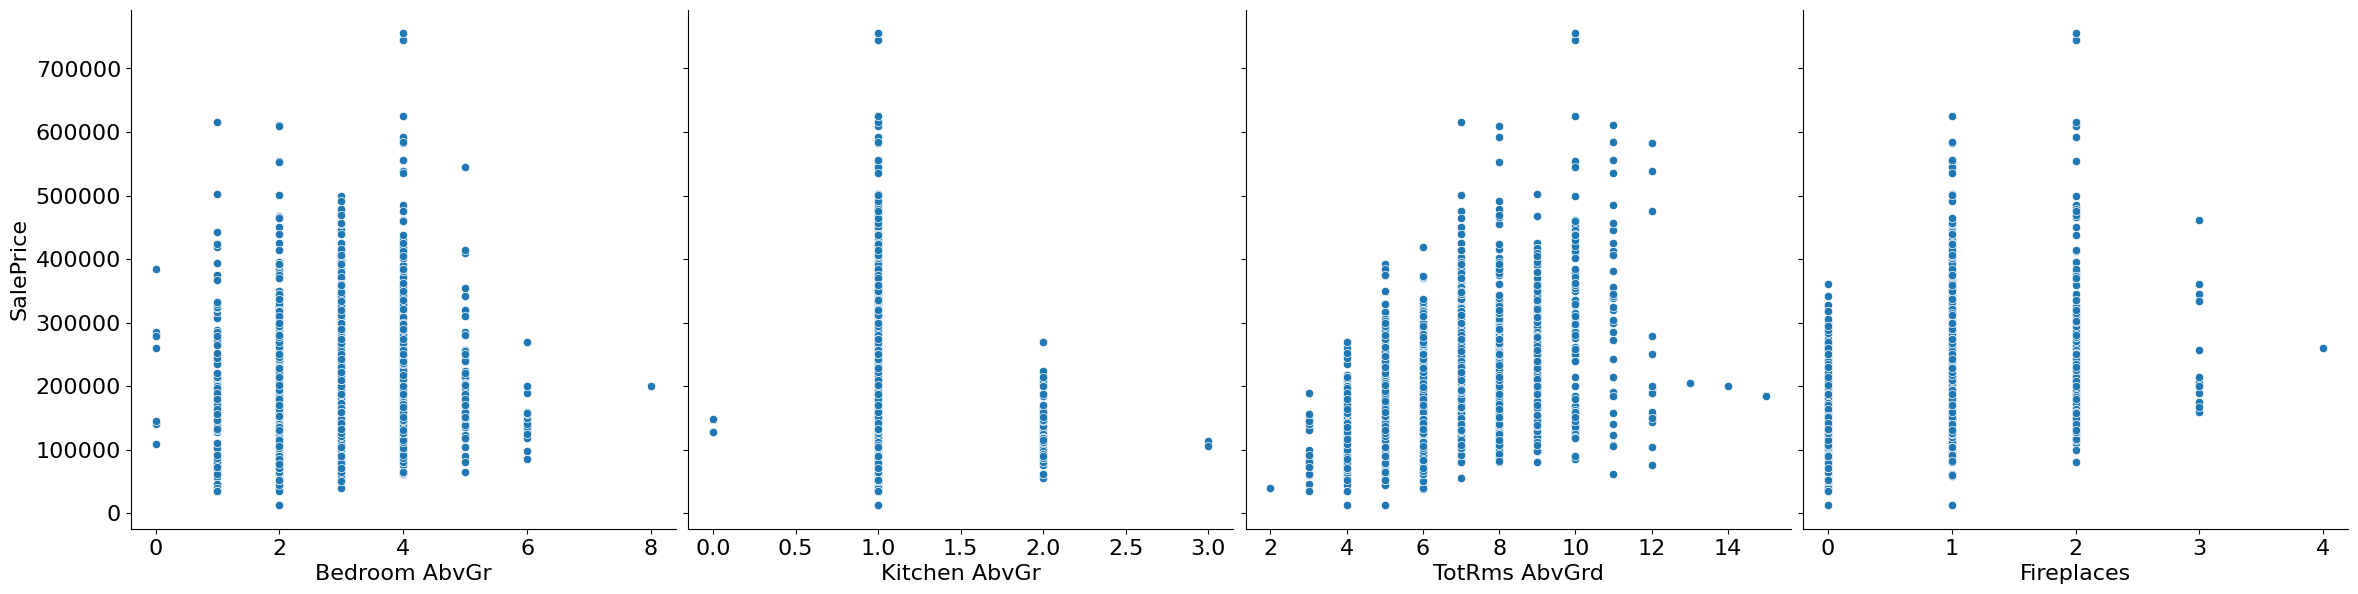

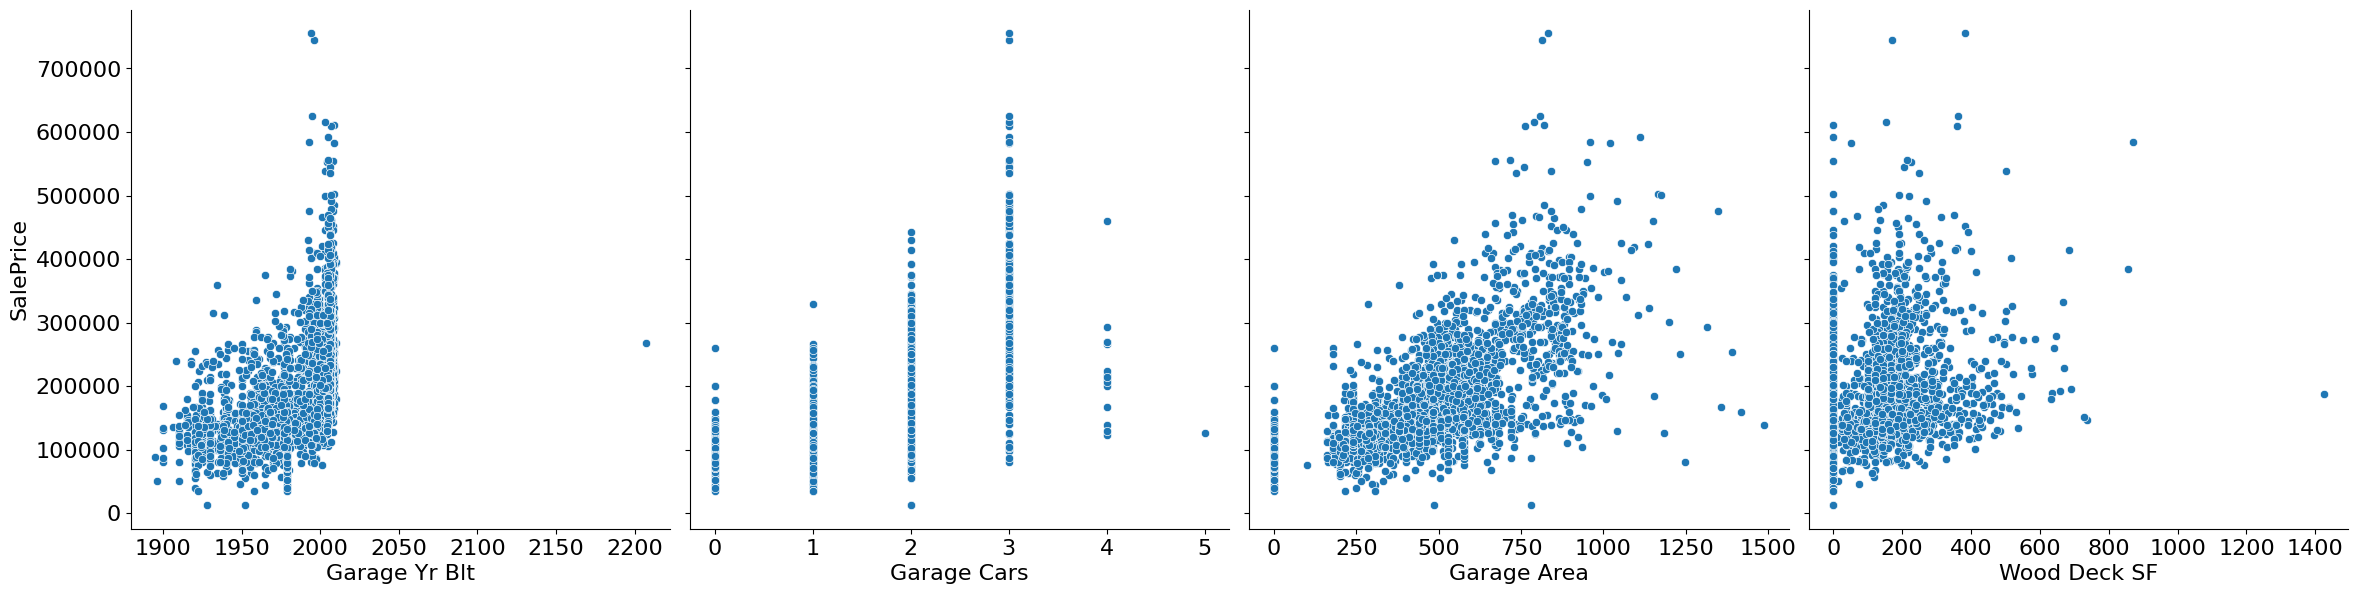

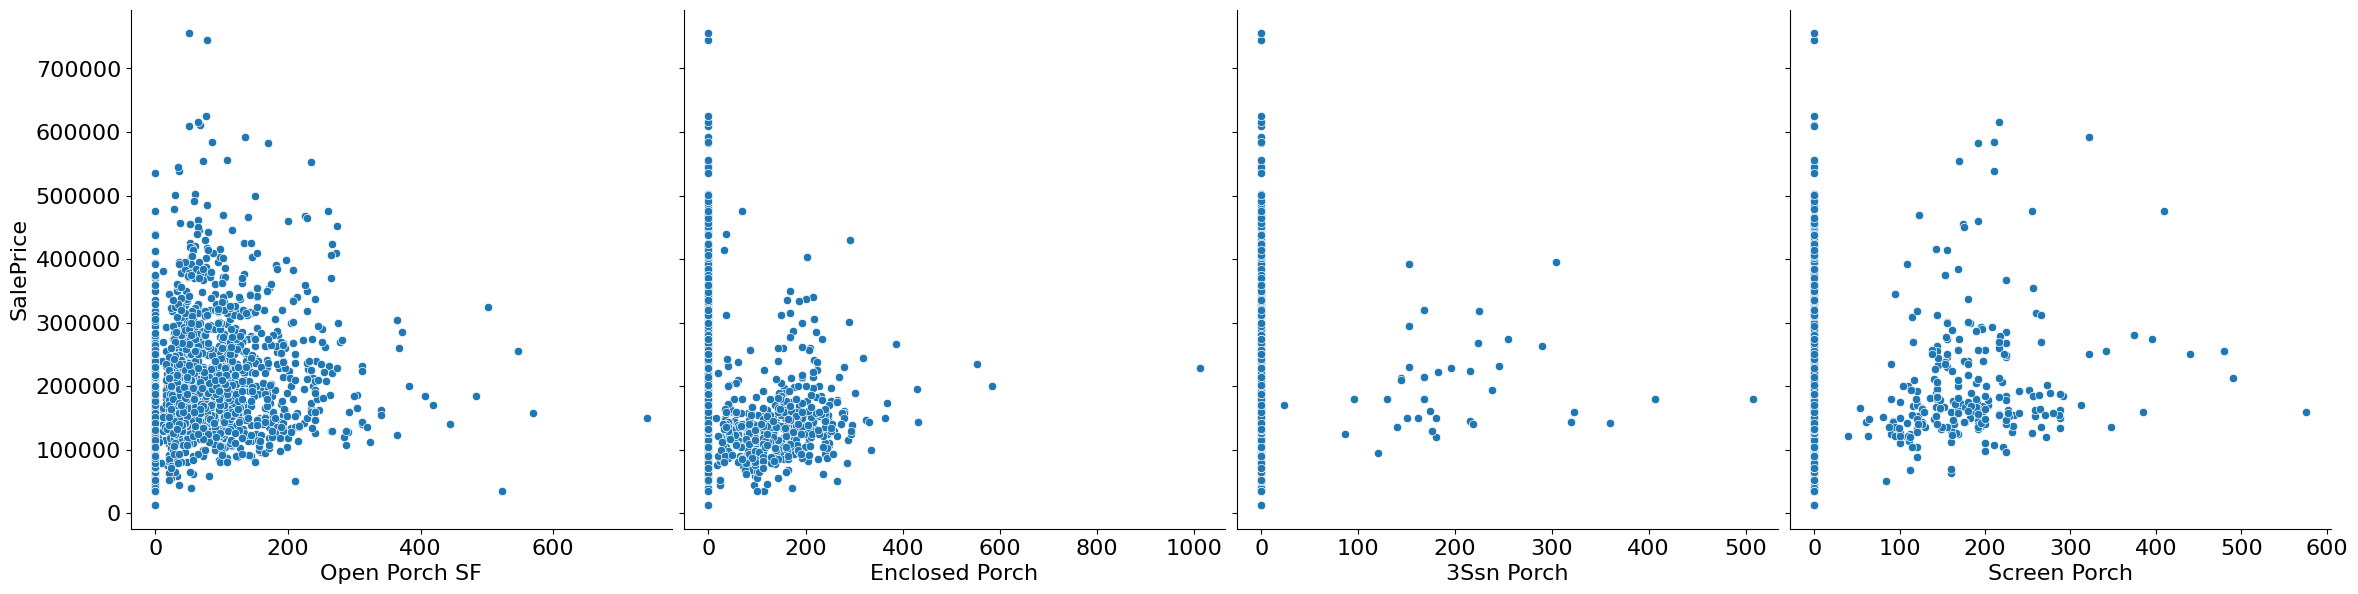

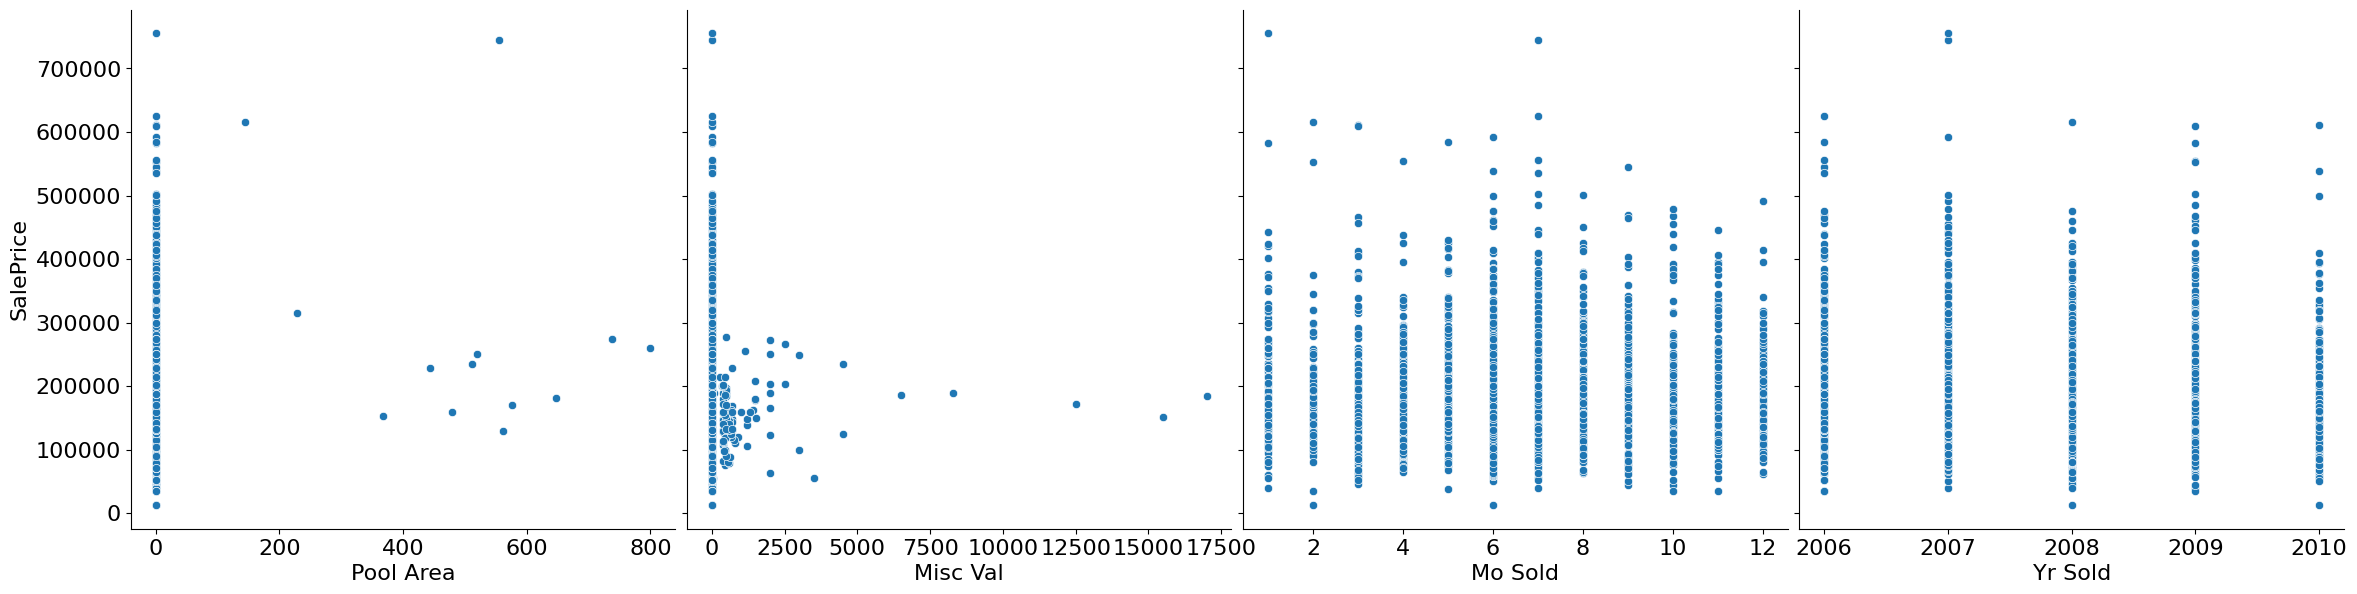

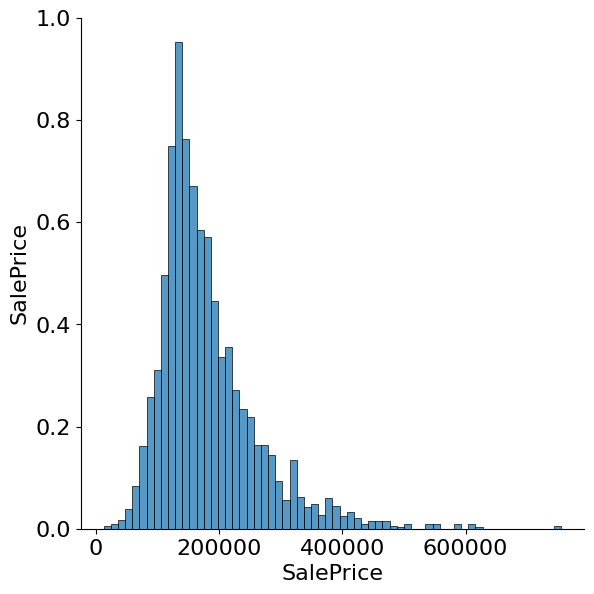

In [282]:
# In the first iteration i is equal to one. This makes i_start equal to zero and i_stop equal to 4.
# So, v_df_X_names[range(i_start,i_stop)] results in the first four elements in v_df_X_names,
# 'Order', 'PID', 'Lot Frontage', and 'Lot Area'.
for n_i in range(1, n_row + 1):

    i_start = (n_i-1) * 4
    i_stop  = n_i * 4

    if(i_stop > n_num):
        i_stop = n_num

    sns.pairplot(
        
        data   = df_number_updated,
        y_vars = ['SalePrice'],
        x_vars = v_df_number_names[range(i_start,i_stop)],
        height = 6
    );

##### Calculate Pearson's Correlation coefficient

Down below, we will calculate the correlation coefficients between numerical features. This is to understand how numerical features correlate to the response variable, `SalePrice`, and how numerical features correlate among each other. 

The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples. To understand the calculation of Pearson's correlation coefficient we will reconstruct the calculation ([ref](https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/)). The coefficient is calculated as,

Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

We will work through an example where we calculate the correlation between the features `SalePrice` and `Garage Cars`.

In [283]:
c_col          = 'Garage Cars'
v_feature      = df_updated[c_col]
m_cov          = np.cov(v_feature, v_y)
n_corr_cov_mat = round(m_cov[0,1] / (np.std(v_y) * np.std(v_feature)), 3)
n_corr_pearson = round(pearsonr(v_y, v_feature)[0], 3)

print(f"Covariance matrix of feature '{c_col}' and 'Saleprice': \n{m_cov}\n")

print(f"Pearson Correlation between feature '{c_col}' and 'SalePrice'")

print(f"Calculated using covariance matrix: {n_corr_cov_mat}")

print(f"Calculated using pearson function: {n_corr_pearson}")


Covariance matrix of feature 'Garage Cars' and 'Saleprice': 
[[5.78282259e-01 3.93543786e+04]
 [3.93543786e+04 6.38188362e+09]]

Pearson Correlation between feature 'Garage Cars' and 'SalePrice'
Calculated using covariance matrix: 0.648
Calculated using pearson function: 0.648


Now, we confirmed what `pearsonnr()` calculates, we can apply it to all numerical features.

In [284]:
v_pearson_cor = []

for n_i in range(0, n_num):

  v_feature = df_updated[v_df_number_names[n_i]]
  
  v_pearson_cor.append(round(pearsonr(v_y, v_feature)[0], 2))

  #m_cov = np.cov(v_feature, v_y)
  #print(f"{v_df_number_names[n_i]} : {round(m_cov[0,1] / (np.std(y) * np.std(v_feature)), 3)} / {round(pearsonr(v_y, v_feature)[0], 3)}")

The object `v_pearson_cor` contains the Pearson correlation coefficients between `SalePrice` and each numerical feature. We will use it to construct a nicely looking table.

In [285]:
# We start out by creating a dataframe containing the correlation coefficients for each of the numerical features.
df_cor_table = pd.DataFrame({'name': v_df_number_names, 'cor': v_pearson_cor})

# We add a feature to df_cov, the absolute value of the correlation coefficient.
df_cor_table['cor_abs'] = abs(df_cor_table['cor'])

# This is allows sorting of the features by their correlation, irrespective of their sign.
df_cor_table = df_cor_table.sort_values(by = 'cor_abs', ascending=False)

# We show the ten features that have the highest correlation with the SalePrice.
df_cor_table.head(10)

name   cor  cor_abs
36       SalePrice  1.00     1.00
4     Overall Qual  0.80     0.80
15     Gr Liv Area  0.71     0.71
25     Garage Cars  0.65     0.65
26     Garage Area  0.64     0.64
11   Total Bsmt SF  0.63     0.63
12      1st Flr SF  0.62     0.62
18       Full Bath  0.55     0.55
6   Year Remod/Add  0.53     0.53
24   Garage Yr Blt  0.51     0.51

We observe that `Overall Qual` has the highest correlation with `SalePrice`. What do you expect what this means when we build a regression model predicting `SalePrice`?

##### Plot correlation heatmap

Heatmaps are usefull way to visualize correlations ([ref](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07)). To show the benefit of this approach, we plot a heatmap of all correlations among all numerical features. The result in the plot below is certainly not bad. We can identify which pairs have high and which have low correlation.

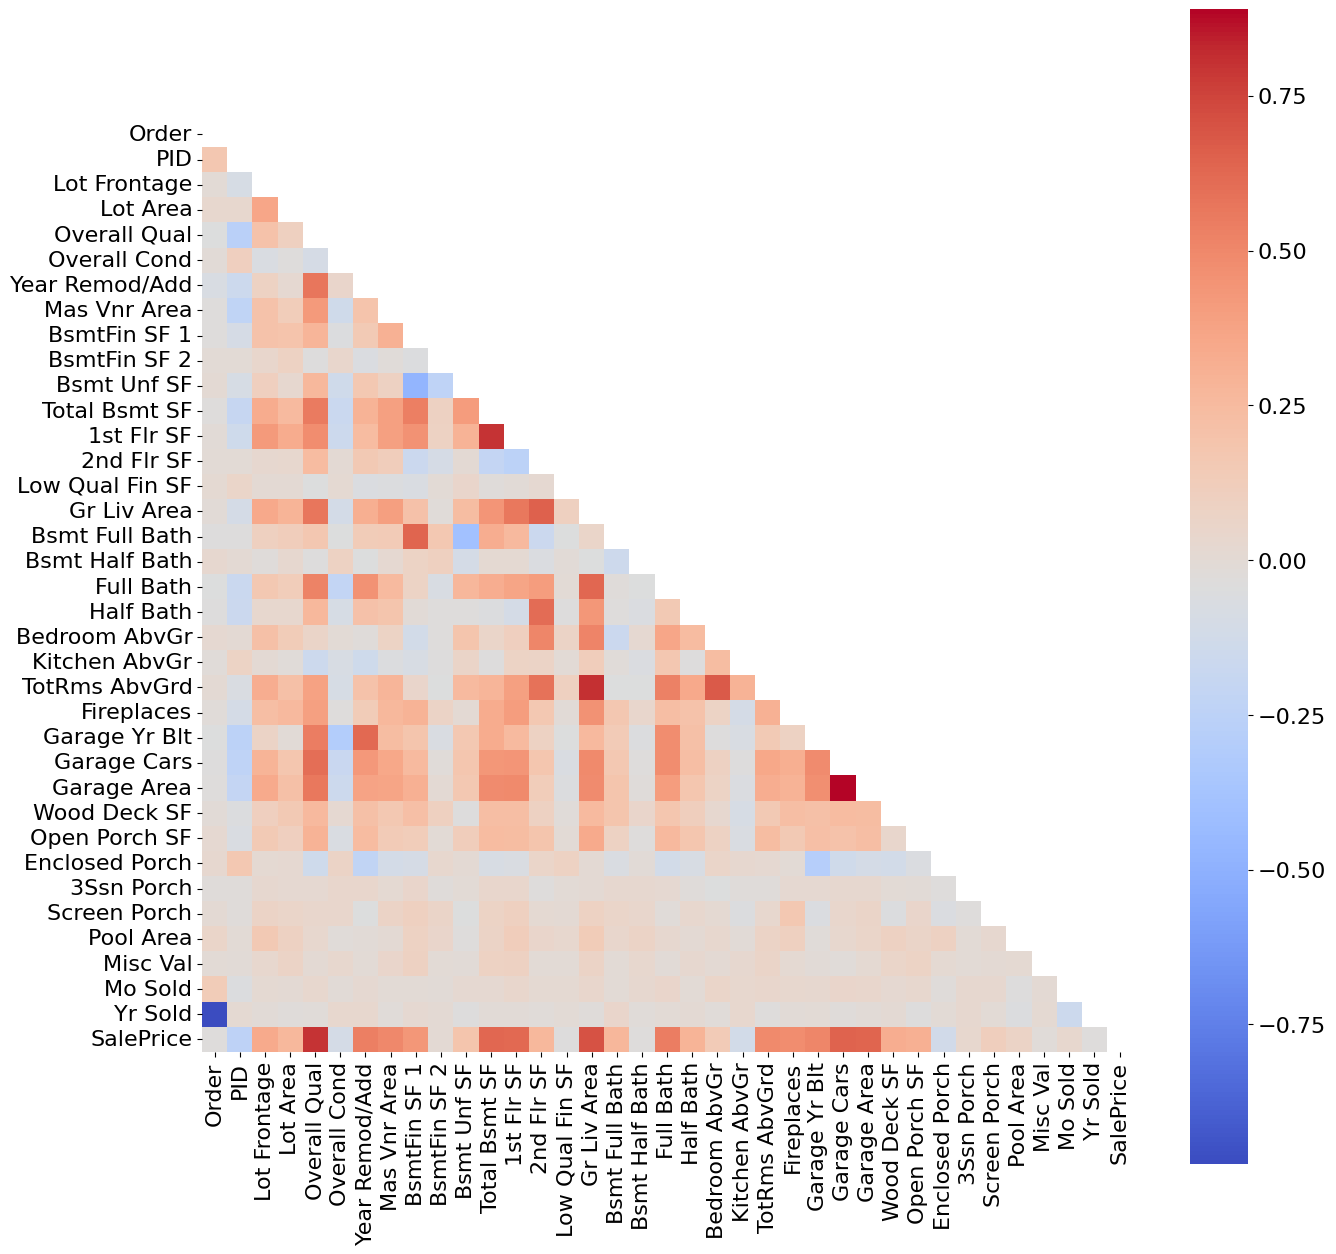

In [286]:
f_heatmap(
    
    df_input           = df_number_updated,
    v_features_to_show = v_df_number_names
)

Using `df_cor_table` we can build a more focused heatmap showing the 10 numerical features that have the highest correlation with `SalePrice`. Besides the correlation with `SalePrice` we also obseve that `Garage Area` and `Garage Cars` are highly correlated. What does this mean in terms of a linear regression model?

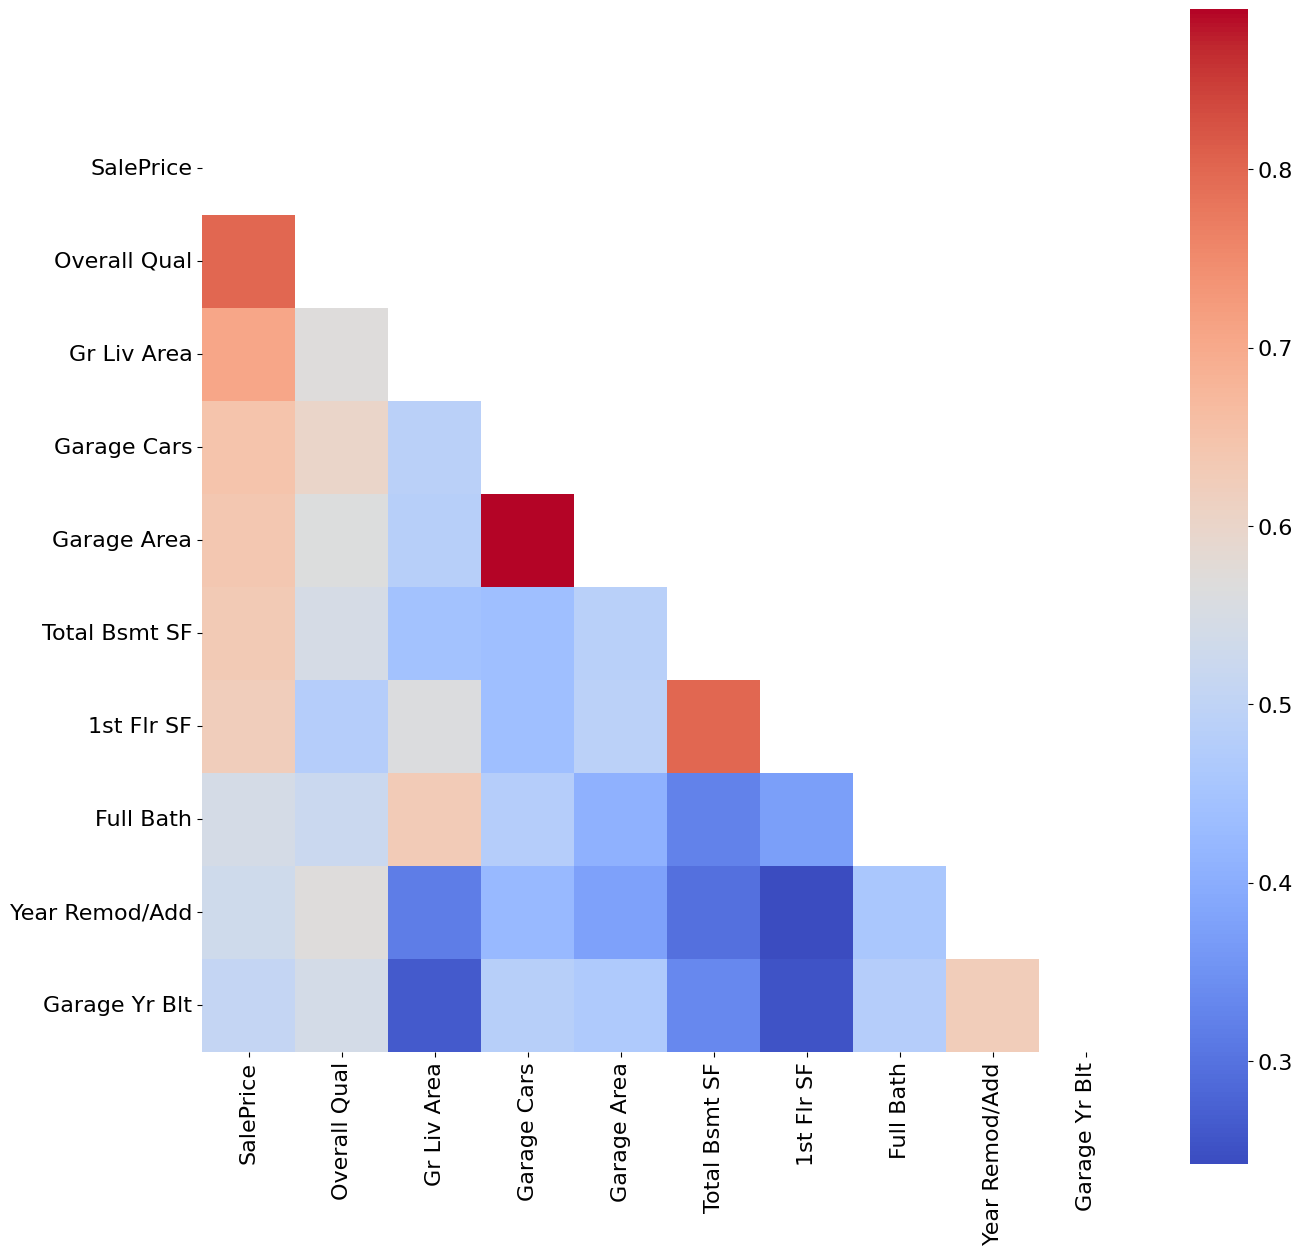

In [287]:
f_heatmap(
    
    df_input           = df_number_updated,
    v_features_to_show = df_cor_table.head(10)['name']
)

Let's look at another way of subsetting the numerical features. Suppose we want to select only those features that contain 'SF' ('square feet'). To accomplish that we make use of list comprehensions (['ref'](https://realpython.com/list-comprehension-python/)).

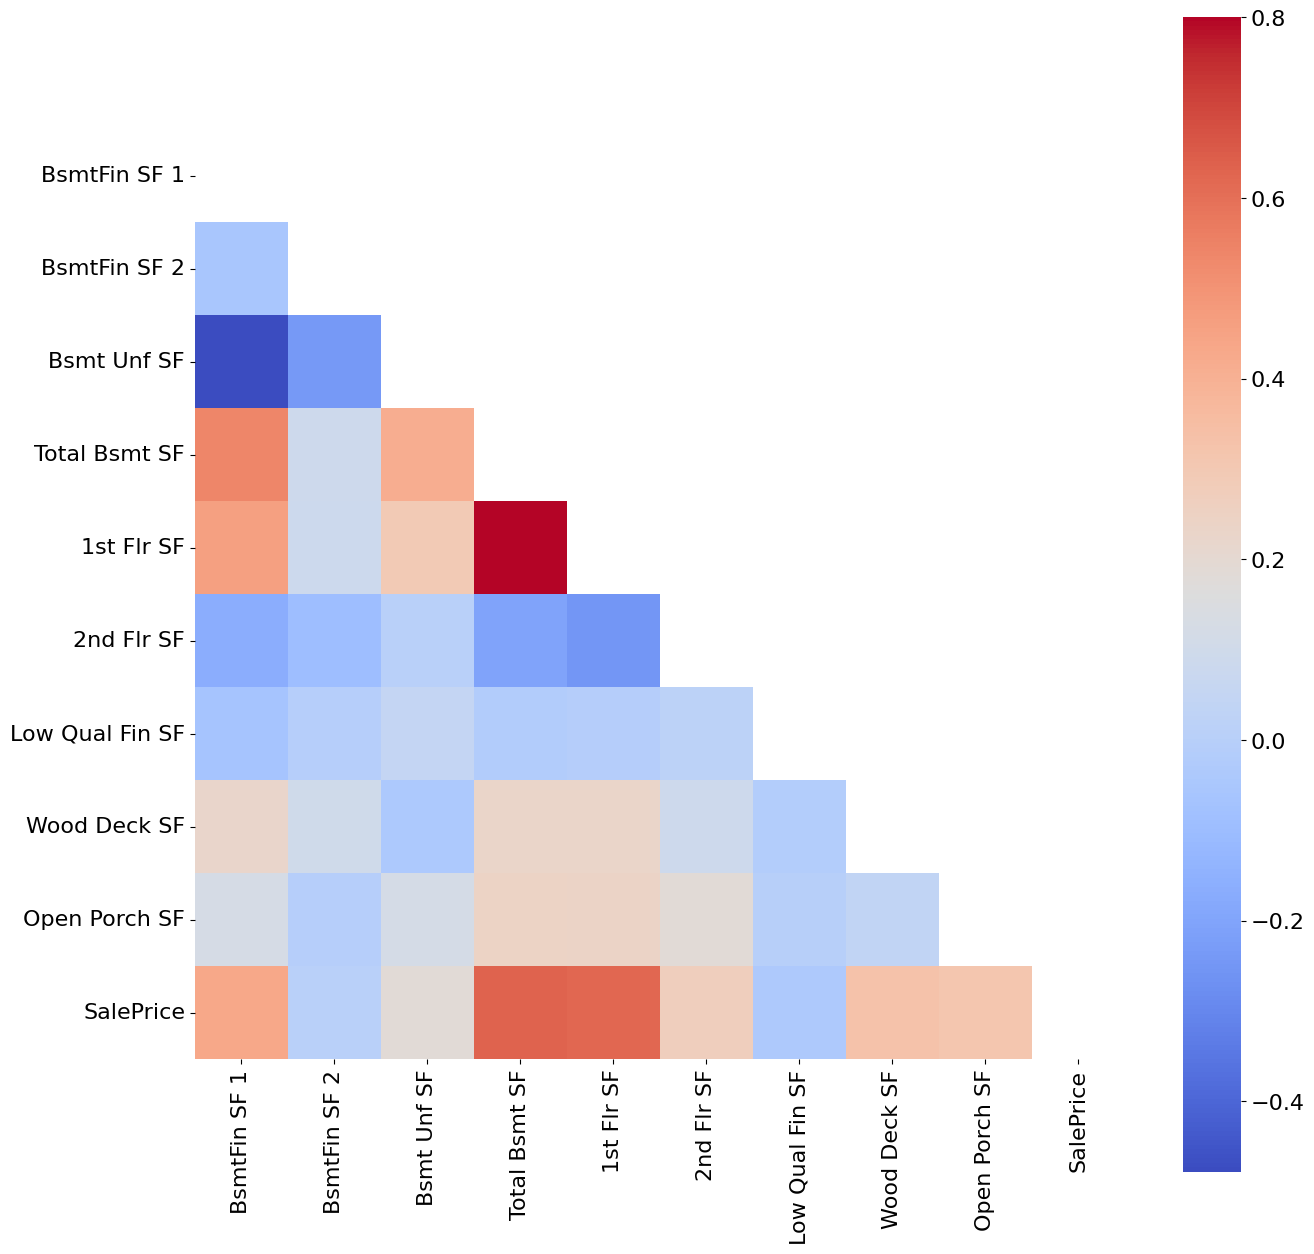

In [288]:
v_df_number_names_sf = [c_col for c_col in v_df_number_names if "SF" in c_col or c_col == 'SalePrice']

f_heatmap(
    
    df_input           = df_number_updated,
    v_features_to_show = v_df_number_names_sf
)

List comprehensions also allow to exclude certain strings, say '1st', just as example.

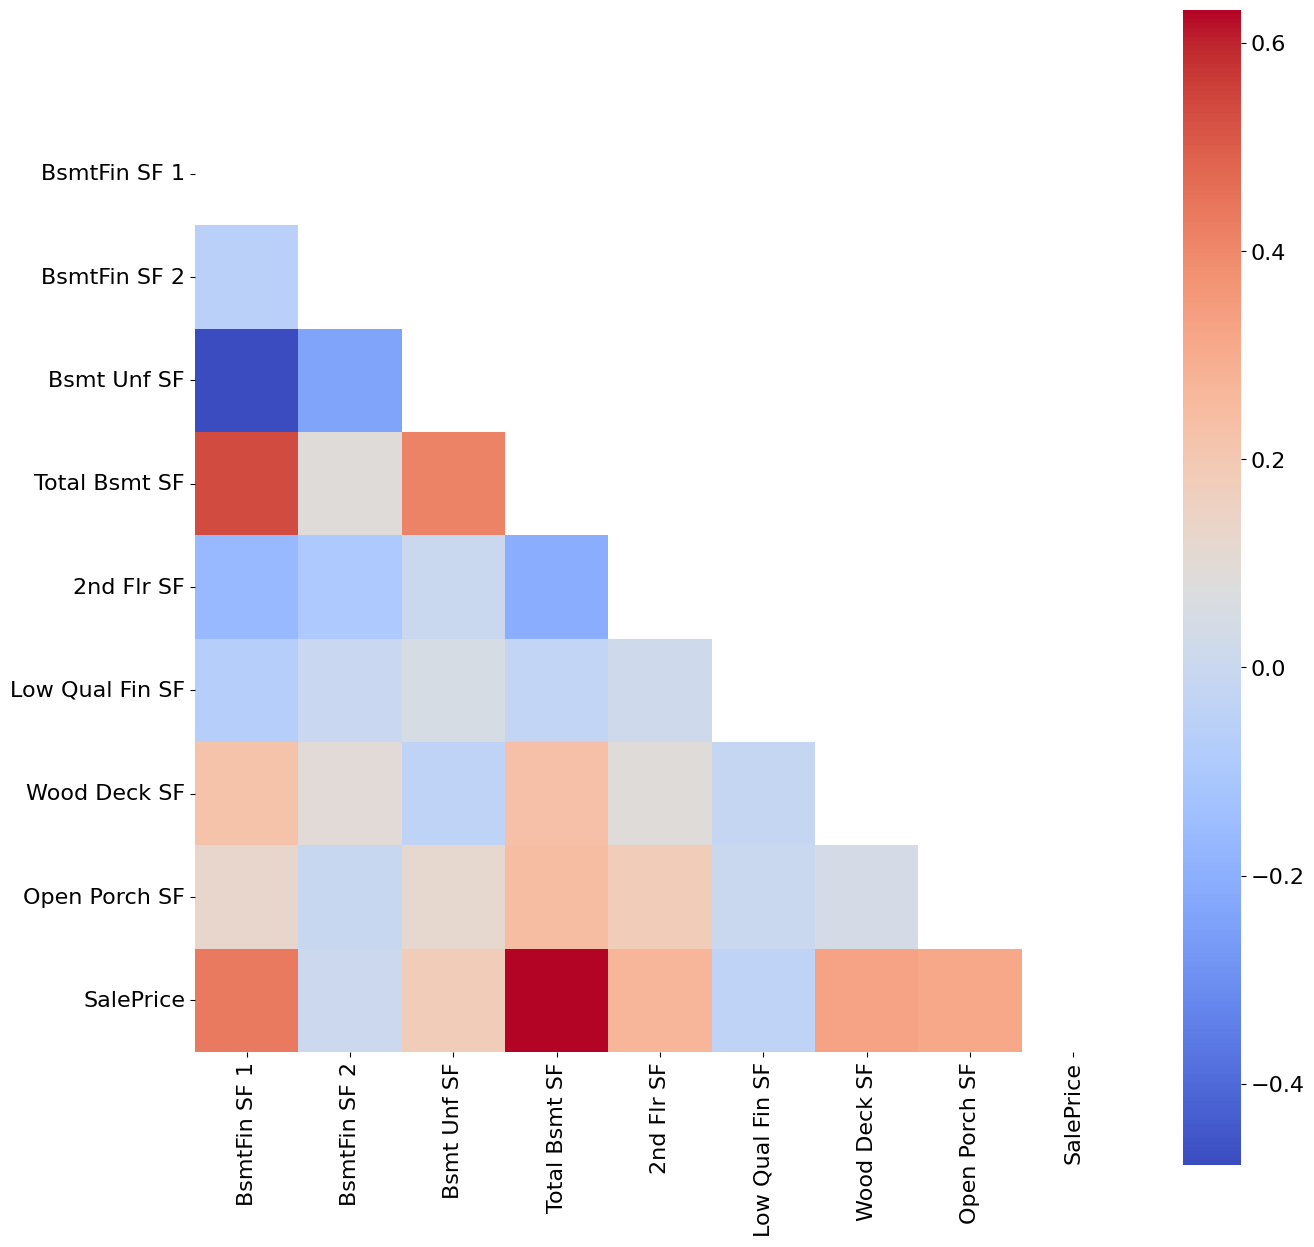

In [289]:
v_df_number_names_sf_wo_1st = [c_col for c_col in v_df_number_names if "SF" in c_col and "1st" not in c_col or c_col == 'SalePrice']

f_heatmap(
    
    df_input           = df_number_updated,
    v_features_to_show = v_df_number_names_sf_wo_1st
)

##### Extra visualisation (thanks to Miel!)

Miel developed an additional plot, which plots regression lines in scatter plots ([ref](https://stackoverflow.com/questions/59326121/add-regression-line-in-the-scatter-matrix-of-pandas)).

In [290]:
# df_temp = df_updated[["SalePrice", "Overall Qual", "Gr Liv Area", "Garage Cars", "Garage Area", "Total Bsmt SF"]]

# g = sns.PairGrid(df_temp)

# g.map_diag(sns.histplot)
# g.map_lower(sns.regplot)
# g.map_upper(reg_coef);

### Exercise 4

* Estimate a LASSO model and a kNN model
* Assess which model performs best

#### Estimate a Linear model

Before diving into LASSO and kNN, we start out by exploring linear regression ([ref](https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606)).

##### Step 1 - Set the variables

To start out simple we build a linear model using the top-3 features with the highest correlation with `SalePrice`, i.e., the variable that we want to predict.

In [291]:
#v_df_X_names_subset = ['Overall Qual']
#v_df_X_names_subset = ['Overall Qual', 'Gr Liv Area']
v_df_X_names_subset = ['Overall Qual', 'Gr Liv Area', 'Garage Cars']

# Object 'df_X' is data frame containing all numerical features in the data, except 'SalePrice'.
df_X = df_updated[v_df_X_names]

# Define X as subset of df_number_updated.
df_X_subset = df_X[v_df_X_names_subset]

print(df_X.shape, df_X_subset.shape)

(2930, 36) (2930, 3)


**Intermezzo - Select best features using SelectKBest**

For regression tasks, we want to know which features contain the most information i.e., are the best predictors. There are various techniques to answer this question ([ref](https://machinelearningmastery.com/feature-selection-for-regression-data/)). Above, we used the Pearson correlation coefficients and later we use Lasso. Scikit-learn has various univariate feature selection methods for this purpose ([ref](https://scikit-learn.org/stable/modules/feature_selection.html)). As an example we will briefly demonstrate `SelectKBest()` ([ref](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)). We observe that the same three features are selected having the highest correlation with `SalePrice`. This should not be a surprise as variance - used for the f-statistic - and correlation are closely related.

In [292]:
# For simplification we perform this on the original dataset. In practice, we would first
# split the data and apply this function to the train data only.
_3best = SelectKBest(f_regression, k = 3).fit(df_X, v_y)

# Using get_support() we can filter out the three selected features.
v_df_X_names[_3best.get_support()]

array(['Overall Qual', 'Gr Liv Area', 'Garage Cars'], dtype=object)

##### Step 2 - Visualize predictors

For completeness we plot the concerned features against `SalePrice`.

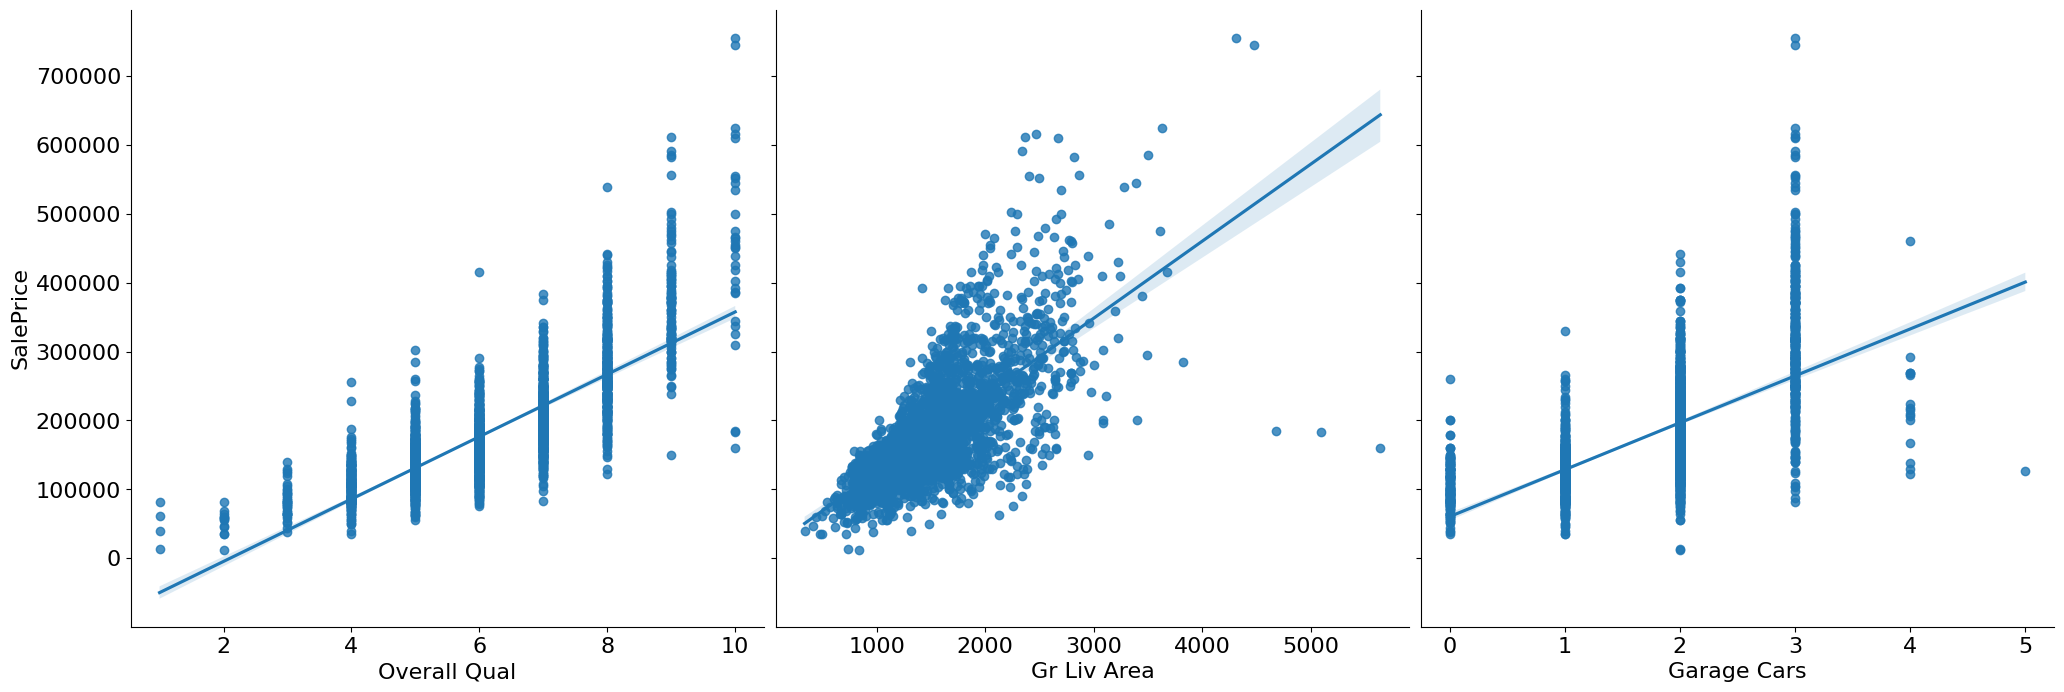

In [293]:
sns.pairplot(
    
    data     = df_number_updated,
    x_vars   = v_df_X_names_subset,
    y_vars   ='SalePrice',
    kind     = 'reg', # Turns on the regression line
    height   = 7
);

##### Step 3 - Split the data

We split the subset of the predictor data (`df_X_subset`) using Scikit-Learn's `train_test_split()` function ([ref](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [294]:
df_X_train, df_X_test, v_y_train, v_y_test = f_train_test_split(df_X_subset, v_y)


Dimension of df_X_train:                       1963 by 3
Dimension of df_X_test:                        967  by 3
Length of v_y_train:                           1963
Length of v_y_test:                            967

Combined number of rows in train and test set: 2930
Original number of rows:                       2930
Actual split:                                  0.33


Let's assess the distribution of the response variable (`v_y`) in both training and test data. For this, we construct a dataframe of the `v_y` values and whether they are in the train or test set. Pandas' `set_axis()` function is used to provide the tag feature with a unique index, see also `s_temp2` and `s_temp3` ([ref](https://pandas.pydata.org/docs/reference/api/pandas.Series.set_axis.html)).

In [295]:
s_temp1 = pd.Series(['train', 'test'])
s_temp2 = s_temp1.repeat([len(v_y_train), len(v_y_test)])
s_temp3 = s_temp2.set_axis(range(len(v_y)))

df_y_combined = pd.DataFrame({
    
    'SalePrice': pd.concat([v_y_train, v_y_test]),
    'tag':       s_temp3
})

print(s_temp2.head(5))
print("")
print(s_temp3.head(5))
print("")
print(df_y_combined.head(5))

0    train
0    train
0    train
0    train
0    train
dtype: object

0    train
1    train
2    train
3    train
4    train
dtype: object

   SalePrice    tag
0     215000  train
1     105000  train
2     172000  train
3     244000  train
4     189900  train


The distributions of SalePrice in both train and test data look similar.

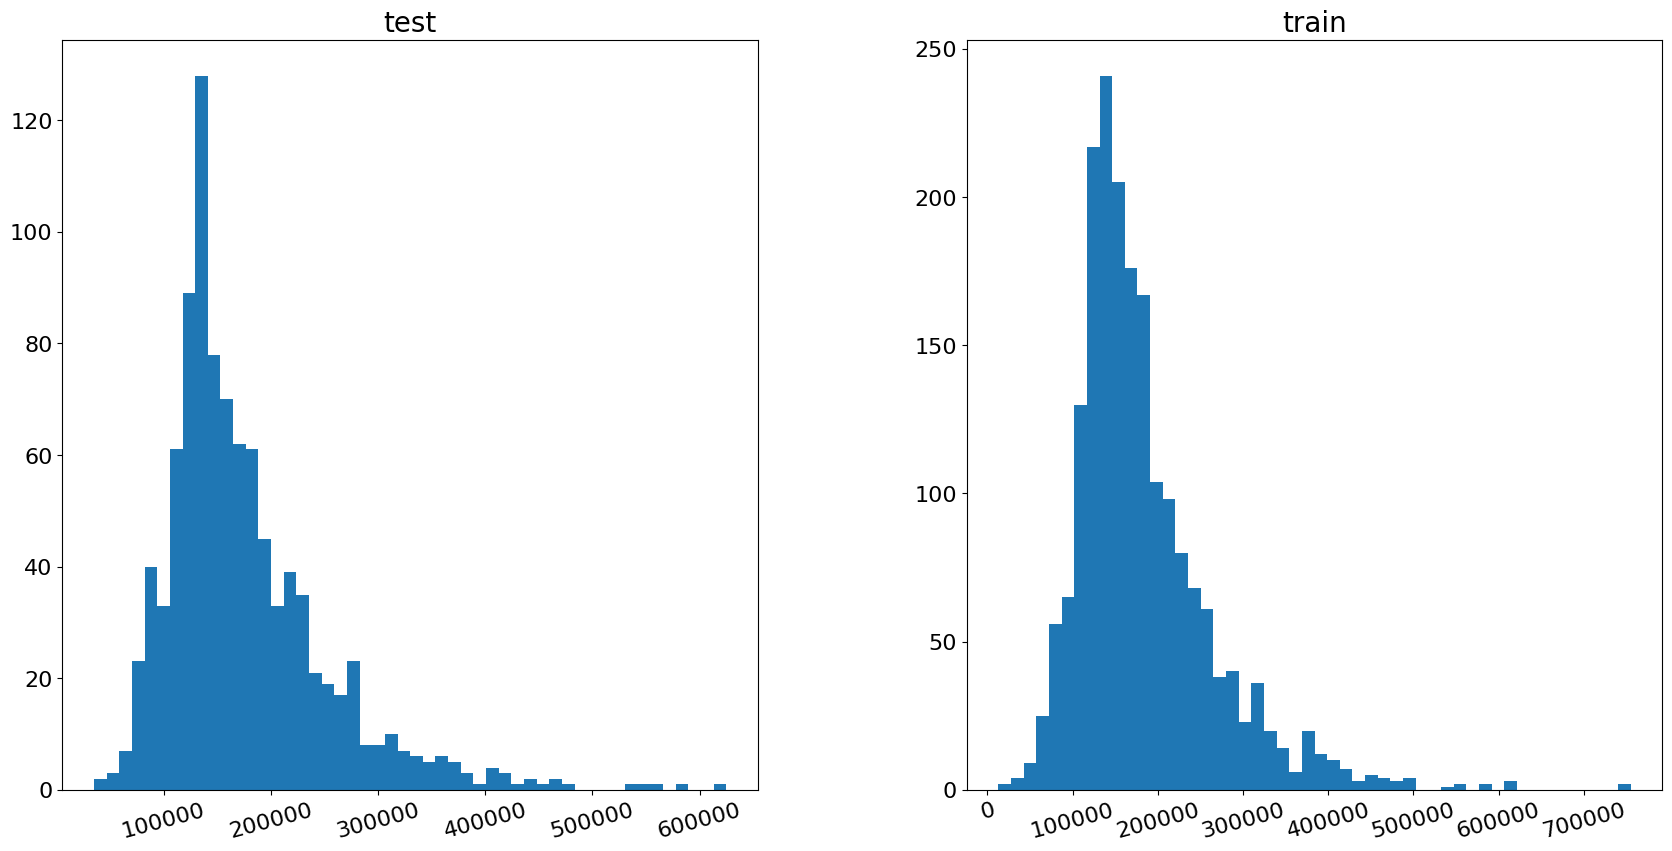

In [296]:
df_y_combined['SalePrice'].hist(
    
    by      = df_y_combined['tag'],
    figsize = (20,10),
    xrot    = 15,
    bins    = 50
);

##### Step 4 - Scaling

The feature data is standardized so that each feature is of the same scale. Generally, there are two ways to scale feature data ([ref](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)):

* Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

* Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation ([ref](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)). This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

There is no rule to tell you what to choose when. You can always start by fitting your model to raw, normalized and standardized data and evaluate the three outcomes. Scaling of target data is generally not required. In the example below, we will standardize the feature data so that each feature will have μ = 0 and σ = 1.

It is a good practice to fit the scaler on the training data and then use it to transform the testing data. This would avoid any data leakage during the model testing process. Therefore, we use Scikit Learn's `fit()` and `transform()` functions in subsequent steps, even though Scikit Learn also has a `fit_transform()` function that does both in one go. The difference between `fit()` and `transform()`:
1. 'fit' applies a transformer, like scaling or encoder. The result is an updated 'machine'.
2. 'transform' transforms input data to output data. The machine is used to convert raw material (input) to a product (output).

he downside of `fit_transform()` is that in case we apply if before to the train/test split, we leak information from the test data into the training data ([ref](https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe)). If we apply it after the train/test split we introduce different means and standard deviations in both train and test data. Applying `Fit()` to the train data allows us to use the resulting mean and standard deviation to standardize the test data.

In [297]:
# Define scaling object.
scaler = StandardScaler()
 
# Standardization of features in training data.
scaler_fitted_on_X_train = scaler.fit(df_X_train)

# Key properties of scaler object.
pd.DataFrame({'name': v_df_X_names_subset, 'mean': scaler_fitted_on_X_train.mean_, 'sd': scaler_fitted_on_X_train.scale_})


name     mean      sd
0  Overall Qual     6.06    1.40
1   Gr Liv Area  1500.45  515.46
2   Garage Cars     1.76    0.75

With the `scaler` object - that was 'fitted' on the features of the training data - in our hands, we can apply it to transform the original features in the training data as well as to transform the features in the test data. This approach avoids any information leakage from the test data into the training data.

In [298]:
df_X_train_scaled = pd.DataFrame(scaler_fitted_on_X_train.transform(df_X_train), columns = v_df_X_names_subset)
df_X_test_scaled  = pd.DataFrame(scaler_fitted_on_X_train.transform(df_X_test),  columns = v_df_X_names_subset)

We assess the distribution of the scaled features in the training and test data. In both cases 

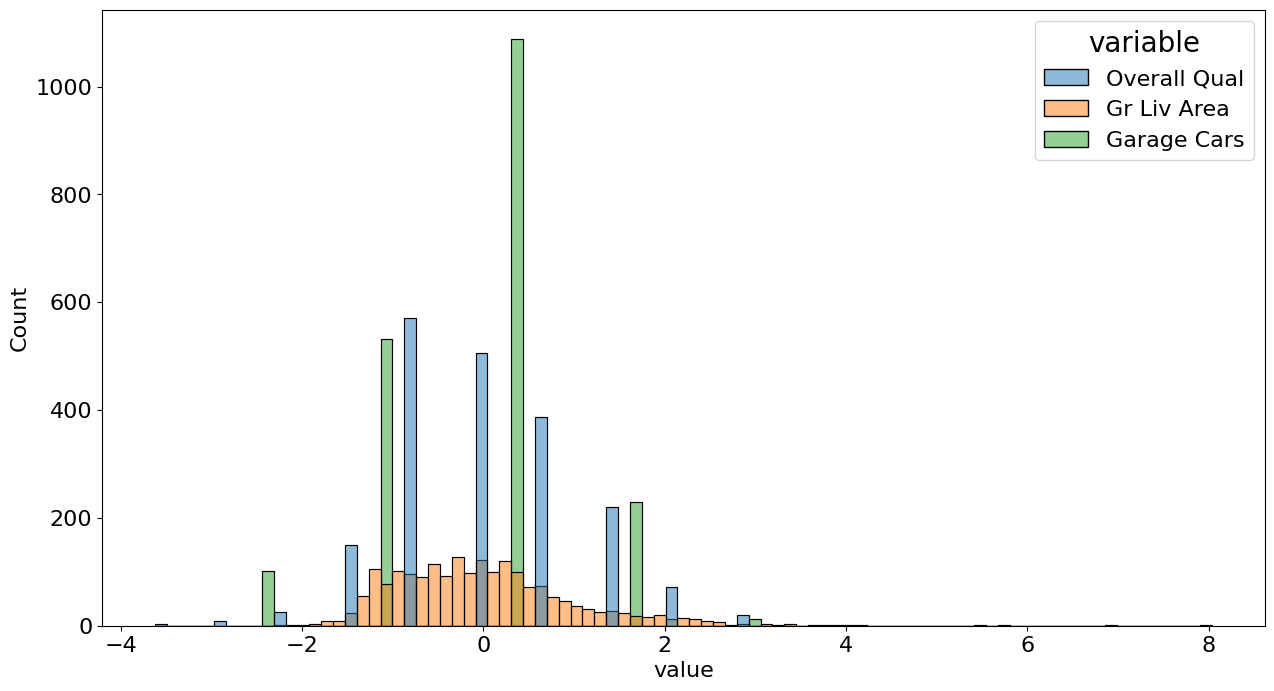

In [299]:
plt.rcParams['figure.figsize'] = 15,8

sns.histplot(
    
    data        = pd.melt(df_X_train_scaled),
    #data       = pd.melt(df_X_test_scaled),
    x           = "value",
    hue         = "variable",
    legend      = True
);

##### Step 5 - Train the model

Having completed all preparations, we can train the linear regression model on the train data. It starts by defining `lin_reg` as an empty linear regression model. We fill it by fitting the model on the train data. 

In [300]:
# Create 'empty model', like a 'machine' with its original settings.
lin_reg = LinearRegression()

# We update the machine settings by fitting the model on the train data (input/output).
lin_reg.fit(df_X_train_scaled, v_y_train);

Using `__dict__` we can see what else is in the machine with the updated settings. Inside, we observe the coefficients (`coef_`), the intercept (`intercept_`), and total sum of squared residues (`_residues`).

In [301]:
lin_reg.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Overall Qual', 'Gr Liv Area', 'Garage Cars'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([38644.2710991 , 25778.17596119, 15498.0899146 ]),
 '_residues': 3082829424066.328,
 'rank_': 3,
 'singular_': array([64.06059942, 31.99965708, 27.5909686 ]),
 'intercept_': 179411.40040753948}

We calculate the RMSE (explanation in Step 8) for the train data (`rmse_train`) to clarify the value for `_residues`.

In [302]:
rmse_train      = metrics.mean_squared_error(v_y_train, lin_reg.predict(df_X_train_scaled), squared=False)
mse_train_total = rmse_train**2 * len(v_y_train)

print(
    "MSE Total:\n",
    f"Calculated from metrics.mean_squared_error: {mse_train_total:,.0f}\n",
    f"Taken from lin_reg._residues:               {lin_reg._residues:,.0f}\n",    
    f"The difference is:                          {mse_train_total - lin_reg._residues:,.3f}"
)

MSE Total:
 Calculated from metrics.mean_squared_error: 3,082,829,424,066
 Taken from lin_reg._residues:               3,082,829,424,066
 The difference is:                          -0.001


##### Step 6 - Interpret the coefficients

We observe that the larger the correlation with the `SalePrice` the larger the fitted coefficient.

In [303]:
print(f"Intercept: {round(lin_reg.intercept_):,}\n")

print("Coefficients:")
pd.DataFrame({'feature':v_df_X_names_subset, 'coeff': [f"{round(x):,}" for x in lin_reg.coef_]})

Intercept: 179,411.0

Coefficients:


feature     coeff
0  Overall Qual  38,644.0
1   Gr Liv Area  25,778.0
2   Garage Cars  15,498.0

##### Step 7 - Make predictions based on estimated model and test data

The fitted model - present in `line_reg` - is used to make `SalePrice` predictions for the test data.

In [304]:
v_y_pred = lin_reg.predict(df_X_test_scaled)

##### Step 8 - Evaluate estimated model based on test data

There are three primary metrics used to evaluate linear models. These are: Mean absolute error (MAE), Mean squared error (MSE), and Root mean squared error (RMSE).
* **MAE:** The easiest to understand. Represents average error.
* **MSE:** Similar to MAE but noise is exaggerated and larger errors result in higher “punishment”, as the error is squared. MSE is harder to interpret than MAE as it’s not in base units, however, it is generally more popular.
* **RMSE:** Most popular metric, similar to MSE, however, RMSE is the square root of the MSE making it more interpretable as it’s in the same unit as the response variable. This makes RMSE the recommended metric to interpret your linear regression model.

Since we will evaluate these metrics more often, a function was defined, `f_evaluation_results()`:

In [305]:
f_evaluation_results(v_y_test, v_y_pred)


Performance Metrics:
MAE:  27,030.4
MSE:  1,584,569,795.0
RMSE: 39,806.7


#### Estimate a LASSO model

LASSO (Least Absolute Shrinkage and Selection Operator) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model ([ref](https://machinelearningmastery.com/lasso-regression-with-python/)). Recall that for regularized linear regression a cost function is added. In case of LASSO this is:

$$ J(\Theta) = MSE (\Theta) + \alpha\sum\limits_{i=1}^n \mid{\Theta_{i}}\mid$$

The larger the hyperparameter $\alpha$, the larger the penalty and hence more coefficients will be set to zero.

##### Step 1 - Set the variables

In addition to the numerical features in the data (`df_X`) you may also want to include categorical data to predict the `SalePrice`. To give an example, earlier, we observed that `Neighborhood` correlated well with `SalePrice`. This can be done by so-called 'One-Hot Encoding' ([ref1](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/), [ref2](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd)). In the example below we process the data to add the `Neighborhood` feature to the predictor data. One-hot encoding adds new features, one for each unique value and entering a one for observations where it had the concerned value and a zero in all other cases.

You can see how the `fit_transform()` function is also used here. As in case of scaling, we could also perform fitting and transforming seperately. For simplicity we do them both in one go.

In [306]:
# Define a one-hot encoder object.
ohe = OneHotEncoder()

# The fit_transform() function produces a 'sparse matrix' object. To convert the data to
# a dataframe we first need to convert it to an array.
m_neighborhoods = ohe.fit_transform(df_updated[['Neighborhood']])
v_neighborhoods = m_neighborhoods.toarray()

# The one-hot encoder object 'ohe' has been updated by applying the fit_transform() function to it.
# Now it has the 'categories_' attribute. Since it is an array in a list we take the first element.
df_X_ohe = pd.DataFrame(
    
    v_neighborhoods,

    columns = ohe.categories_[0]
    )

# Comms to the user. The created data frame has as many features as unique values in the 'Neighborhood'
# feature in df_updated and the same number of observations as df_updated has. No surprises.
print(f"Unique neighborhoods: {ohe.categories_[0]}\n")

print(f"Length of 'categories_' attribute: {len(ohe.categories_[0])}")
print(f"Number of unique neighborhoods:    {len(df_updated['Neighborhood'].unique())}\n")

print(f"Dimensions of created dataframe:   {df_X_ohe.shape}")

Unique neighborhoods: ['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'Greens' 'GrnHill' 'IDOTRR' 'Landmrk' 'MeadowV'
 'Mitchel' 'NAmes' 'NPkVill' 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown'
 'SWISU' 'Sawyer' 'SawyerW' 'Somerst' 'StoneBr' 'Timber' 'Veenker']

Length of 'categories_' attribute: 28
Number of unique neighborhoods:    28

Dimensions of created dataframe:   (2930, 28)


Combine the two dataframes horizontally, i.e, 'axis' is set to 1.

In [307]:
df_X_combined = pd.concat([df_X, df_X_ohe], axis = 1)

# Comms to the user. The created data frame has as many observations as both 'X' and 'X_ohe' have, and as many columns as the two have together. 
print(f"Number of features in X:          {df_X.shape[1]}")
print(f"Number of features in X_ohe:      {df_X_ohe.shape[1]}")
print(f"Number of features in X_combined: {df_X_combined.shape[1]}")

Number of features in X:          36
Number of features in X_ohe:      28
Number of features in X_combined: 64


##### Step 2 - Visualize predictors

We show a sample of the combined data frame to clarify how one-hot coding works and how the result was added to the original numerical data.

In [308]:
df_X_combined.head(5)

Order        PID  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0      1  526301100         141.0     31770             6             5   
1      2  526350040          80.0     11622             5             6   
2      3  526351010          81.0     14267             6             6   
3      4  526353030          93.0     11160             7             5   
4      5  527105010          74.0     13830             5             5   

   Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  \
0            1960         112.0         639.0           0.0        441.0   
1            1961           0.0         468.0         144.0        270.0   
2            1958         108.0         923.0           0.0        406.0   
3            1968           0.0        1065.0           0.0       1045.0   
4            1998           0.0         791.0           0.0        137.0   

   Total Bsmt SF  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0         1080.0        1656           0                0         1656   
1          882.0         896           0                0          896   
2         1329.0        1329           0                0         1329   
3         2110.0        2110           0                0         2110   
4          928.0         928         701                0         1629   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             1.0             0.0          1          0              3   
1             0.0             0.0          1          0              2   
2             0.0             0.0          1          1              3   
3             1.0             0.0          2          1              3   
4             0.0             0.0          2          1              3   

   Kitchen AbvGr  TotRms AbvGrd  Fireplaces  Garage Yr Blt  Garage Cars  \
0              1              7           2         1960.0          2.0   
1              1              5           0         1961.0          1.0   
2              1              6           0         1958.0          1.0   
3              1              8           2         1968.0          2.0   
4              1              6           1         1997.0          2.0   

   Garage Area  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
0        528.0           210             62               0           0   
1        730.0           140              0               0           0   
2        312.0           393             36               0           0   
3        522.0             0              0               0           0   
4        482.0           212             34               0           0   

   Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold  Blmngtn  Blueste  \
0             0          0         0        5     2010      0.0      0.0   
1           120          0         0        6     2010      0.0      0.0   
2             0          0     12500        6     2010      0.0      0.0   
3             0          0         0        4     2010      0.0      0.0   
4             0          0         0        3     2010      0.0      0.0   

   BrDale  BrkSide  ClearCr  CollgCr  Crawfor  Edwards  Gilbert  Greens  \
0     0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
1     0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
2     0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
3     0.0      0.0      0.0      0.0      0.0      0.0      0.0     0.0   
4     0.0      0.0      0.0      0.0      0.0      0.0      1.0     0.0   

   GrnHill  IDOTRR  Landmrk  MeadowV  Mitchel  NAmes  NPkVill  NWAmes  \
0      0.0     0.0      0.0      0.0      0.0    1.0      0.0     0.0   
1      0.0     0.0      0.0      0.0      0.0    1.0      0.0     0.0   
2      0.0     0.0      0.0      0.0      0.0    1.0      0.0     0.0   
3      0.0     0.0      0.0      0.0      0.0    1.0      0.0     0.0   
4      0.0     0.0      0.0   

##### Step 3 - Split the data

We split the predictor data using Scikit-Learn's `train_test_split()` ([*ref*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)). We can follow two scenarios:

Scenario A - Use the combined data (df_X_combined).

Scenario B - Use the numerical features only (df_X), so excluding any one-hot encoded categorical features.

In [309]:
# Scenario A.
#df_X_train, df_X_test, v_y_train, v_y_test = f_train_test_split(df_X_combined, v_y)

# Scenario B.
df_X_train, df_X_test, v_y_train, v_y_test = f_train_test_split(df_X, v_y)

Dimension of df_X_train:                       1963 by 36
Dimension of df_X_test:                        967  by 36
Length of v_y_train:                           1963
Length of v_y_test:                            967

Combined number of rows in train and test set: 2930
Original number of rows:                       2930
Actual split:                                  0.33


##### Step 4 - Scaling

As before, we standardize `df_X_train` and `df_X_test` separately.

In [310]:
# Define scaling object.
scaler = StandardScaler()
 
# Standardization of features in train data.
scaler_fitted_on_X_train = scaler.fit(df_X_train)

# Key properties of scaler object for first 10 features in X_combined.
pd.DataFrame({'name': df_X_train.columns, 'mean': scaler_fitted_on_X_train.mean_, 'sd': scaler_fitted_on_X_train.scale_}).head(10)

name      mean        sd
0           Order  1.47e+03  8.44e+02
1             PID  7.13e+08  1.89e+08
2    Lot Frontage  6.91e+01  2.14e+01
3        Lot Area  1.02e+04  8.53e+03
4    Overall Qual  6.06e+00  1.40e+00
5    Overall Cond  5.60e+00  1.13e+00
6  Year Remod/Add  1.98e+03  2.07e+01
7    Mas Vnr Area  1.01e+02  1.77e+02
8    BsmtFin SF 1  4.46e+02  4.56e+02
9    BsmtFin SF 2  4.91e+01  1.70e+02

In [311]:
df_X_train_scaled = pd.DataFrame(scaler_fitted_on_X_train.transform(df_X_train), columns = df_X_train.columns)
df_X_test_scaled  = pd.DataFrame(scaler_fitted_on_X_train.transform(df_X_test),  columns = df_X_test.columns)

Let's have a look at the scaled data. In the one-hot encoded neighborhood features we observe that the 0's and 1's have been replaced by a negative and a positive number, resp. We also see this in the histogram below.

In [312]:
df_X_train_scaled.head(5)

Order   PID  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0   0.94  1.08         -0.10     -0.22          0.67         -0.53   
1   0.17 -0.99         -0.05      0.26          0.67         -0.53   
2  -0.27 -0.95          0.13     -0.14         -0.05         -0.53   
3  -0.97 -0.94          0.51     -0.20         -0.76          0.36   
4   1.31 -0.95          0.04     -0.21         -0.76         -0.53   

   Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  \
0            1.11         -0.57         -0.98         -0.29     2.59e+00   
1            0.92         -0.57         -0.98         -0.29     6.64e-01   
2           -1.35         -0.15          0.37         -0.29     5.28e-02   
3           -1.64         -0.57          0.56         -0.29    -1.06e+00   
4           -1.30         -0.57          0.39         -0.29    -2.10e-03   

   Total Bsmt SF  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0           1.44        1.36       -0.78             -0.1         0.37   
1          -0.46       -0.80        1.28             -0.1         0.45   
2           0.33        0.09       -0.78             -0.1        -0.59   
3          -0.59       -0.94       -0.78             -0.1        -1.37   
4           0.29        0.53       -0.78             -0.1        -0.26   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0           -0.82           -0.25       0.80      -0.74           0.18   
1           -0.82           -0.25       0.80       1.25           0.18   
2            1.08           -0.25      -1.01      -0.74          -1.03   
3            1.08           -0.25      -1.01      -0.74          -1.03   
4           -0.82           -0.25      -1.01       1.25           0.18   

   Kitchen AbvGr  TotRms AbvGrd  Fireplaces  Garage Yr Blt  Garage Cars  \
0          -0.21           0.36       -0.90           1.21         0.32   
1          -0.21           0.36        0.62           1.05         0.32   
2          -0.21          -0.27        0.62          -0.88        -1.01   
3          -0.21          -1.53       -0.90          -1.33        -1.01   
4          -0.21          -0.27        0.62          -0.84        -1.01   

   Garage Area  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
0        -0.18          0.03      -1.33e-01           -0.38        -0.1   
1        -0.18          0.03      -2.13e-03           -0.38        -0.1   
2        -0.82         -0.76      -6.03e-02           -0.38        -0.1   
3        -1.09         -0.76      -7.00e-01           -0.38        -0.1   
4        -0.66         -0.76       1.72e-01           -0.38        -0.1   

   Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold  
0         -0.29      -0.07     -0.09    -0.81    -0.60  
1         -0.29      -0.07     -0.09     1.41    -0.60  
2         -0.29      -0.07     -0.09    -0.44     0.16  
3         -0.29      -0.07     -0.09     0.67     0.92  
4         -0.29      -0.07     -0.09    -1.18    -1.36

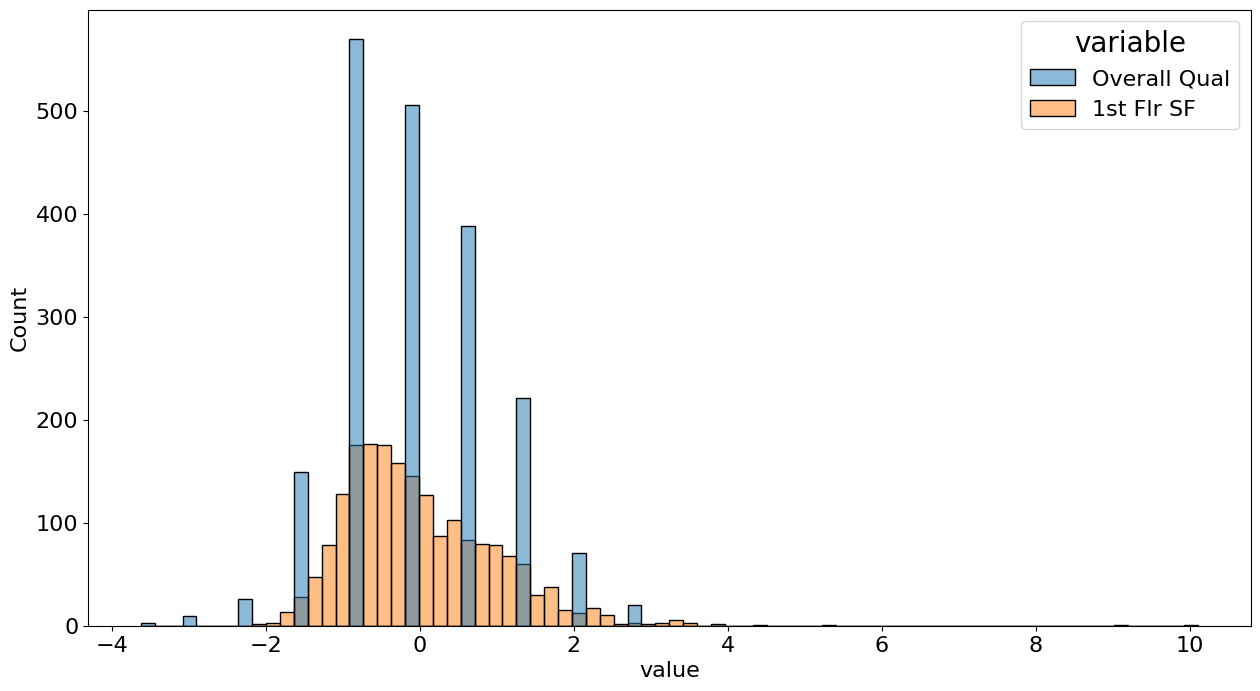

In [313]:
plt.rcParams['figure.figsize'] = 15,8

sns.histplot(
    
    #data        = pd.melt(df_X_train_scaled[['Overall Qual', 'NAmes']]),
    data        = pd.melt(df_X_train_scaled[['Overall Qual', '1st Flr SF']]),
    x           = "value",
    hue         = "variable",
    legend      = True
);

##### Step 5 - Train the model

Instead of using Scikit Learn's `Lasso()` function to build a single model, we use `LassoCV()` to build a series of LASSO models. By default `LassoCV()` tries 100 different values for $\alpha$, through the input parameter `n_alphas`. We make use of an example given in SciKit Learn's documentation ([ref](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py)).

In [314]:
# Define log of lower border of alphas range.
n_alphas_min = 2

lasso = LassoCV(
    
    # Number of folds.
    cv           = 5,

    # Fixing random_state ensures the results are reproducible.
    random_state = 42,

    # Use any CPU available.
    #n_jobs       = -1,

    # Max number of iterations.
    max_iter     = 1000,

    # We can enforce for which alphas a Lasso model is fitted.
    # In case we do not provide a list, LassoCV() will select 100 values.
    alphas       = [round(10**i) for i in np.arange(n_alphas_min, 5, 0.1)]

).fit(
    
    df_X_train_scaled,
    v_y_train
)

##### Step 6 - Interpret the coefficients

For each of the folds we plot the RMSE against the respective $\alpha$'s we added as parameter to `LassoCV()`, see colored dotted lines in the figure below. We also add the mean of the folds, see black line. This plot allows us to choose the optimal $\alpha$, i.e., the one that results in the lowest RMSE.

In [315]:
df_alpha = pd.DataFrame({'alpha': lasso.alphas_, 'RMSE_mean':np.sqrt(lasso.mse_path_.mean(axis=-1))})

df_alpha.sort_values(by = 'alpha')

alpha  RMSE_mean
29    100.0   36082.00
28    126.0   36063.69
27    158.0   36042.27
26    200.0   36014.97
25    251.0   35983.16
24    316.0   35944.03
23    398.0   35899.76
22    501.0   35870.01
21    631.0   35850.91
20    794.0   35832.48
19   1000.0   35828.52
18   1259.0   35829.19
17   1585.0   35834.42
16   1995.0   35880.76
15   2512.0   35975.14
14   3162.0   36170.27
13   3981.0   36535.19
12   5012.0   37100.76
11   6310.0   37713.69
10   7943.0   38495.36
9   10000.0   39540.89
8   12589.0   41126.53
7   15849.0   43156.42
6   19953.0   45824.95
5   25119.0   49717.34
4   31623.0   54861.86
3   39811.0   61326.28
2   50119.0   69382.25
1   63096.0   78591.02
0   79433.0   78655.70

The best model is selected based on the lowest RMSE. The alpha for that model can be obtained through the attribute `alpha_`.

In [316]:
print(f"Lowest RMSE found at alpha: {lasso.alpha_:,.0f}")

Lowest RMSE found at alpha: 1,000


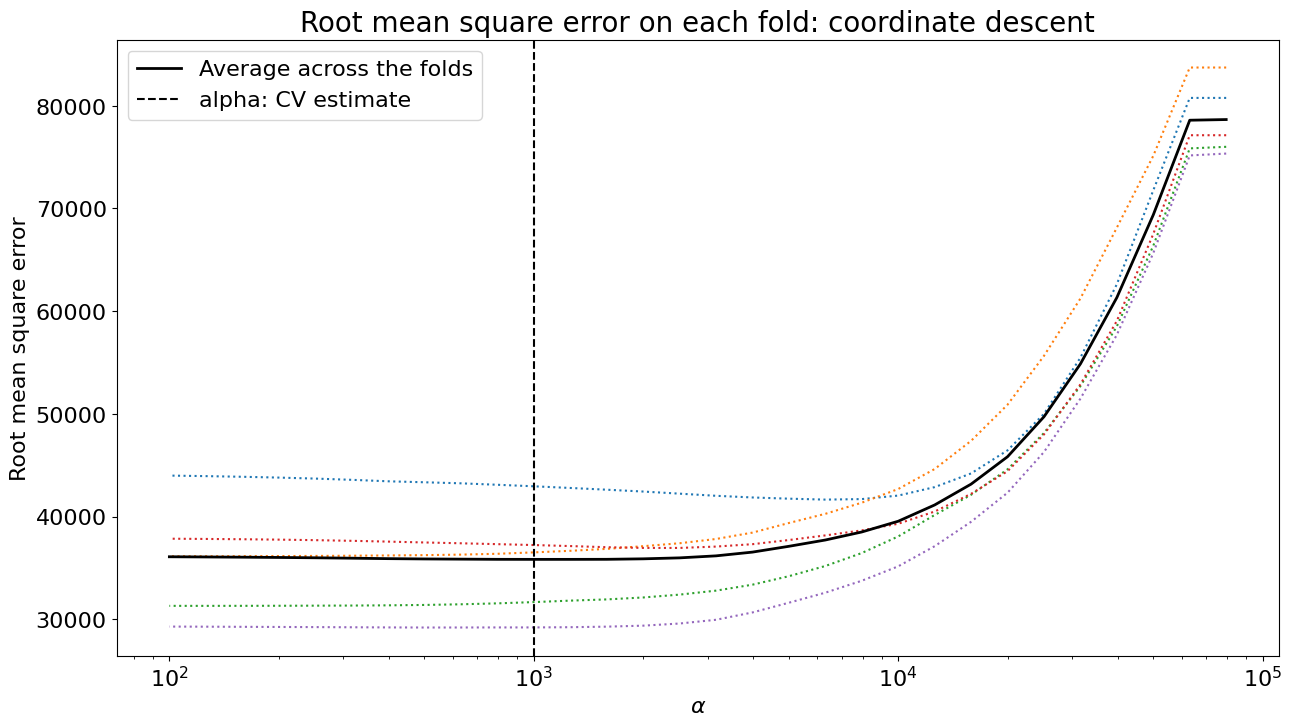

In [317]:
# This is to avoid division by zero while doing semilogx on the alphas.
EPSILON = 0.000000001

# Plot RMSE of 5 CV's.
plt.semilogx(
    
    lasso.alphas_ + EPSILON,
    np.sqrt(lasso.mse_path_), ":"
)

# Plot mean RMSE of 5 CV's.
plt.plot(
    
    df_alpha['alpha'] + EPSILON,
    df_alpha['RMSE_mean'],

    color     = "k",
    label     = "Average across the folds",
    linewidth = 2,
)

# Plot vertical dashed line at the alpha value that results in the lowest RMSE.
# Note, the difference between '.alpha_' (below) and '.alphas_' (above).
plt.axvline(
    
    lasso.alpha_ + EPSILON,

    linestyle = "--",
    color     = "k",
    label     = "alpha: CV estimate"
)

plt.legend()
plt.xlabel(r"$\alpha$")
plt.ylabel("Root mean square error")
plt.title("Root mean square error on each fold: coordinate descent")
plt.axis("tight");

From the `lasso` object we can extract the intercept and coefficients of the best model. What explains the number of coeficients equal to zero? How can we increase the number of coefficients equal to zero? Hint: `n_alphas_min`.

In [318]:
print(f"  intercept: {lasso.intercept_:,.0f}")

df_lasso_coefficients = pd.DataFrame(
    
    {
        'name':           df_X_train_scaled.columns,
        'lasso coef':     lasso.coef_,
        'lasso_coef_abs': abs(lasso.coef_)        
    }
     
).sort_values(
    
    'lasso_coef_abs',
    ascending=False
)

df_lasso_coefficients

  intercept: 179,411


name  lasso coef  lasso_coef_abs
4      Overall Qual    26365.62        26365.62
15      Gr Liv Area    23001.88        23001.88
25      Garage Cars     7366.70         7366.70
6    Year Remod/Add     5637.16         5637.16
11    Total Bsmt SF     5518.54         5518.54
24    Garage Yr Blt     5335.04         5335.04
8      BsmtFin SF 1     5221.63         5221.63
7      Mas Vnr Area     4955.70         4955.70
33         Misc Val    -4502.57         4502.57
3          Lot Area     4130.82         4130.82
16   Bsmt Full Bath     4076.86         4076.86
21    Kitchen AbvGr    -3539.10         3539.10
31     Screen Porch     3493.67         3493.67
23       Fireplaces     2502.16         2502.16
27     Wood Deck SF     2464.93         2464.93
12       1st Flr SF     2070.86         2070.86
5      Overall Cond     1919.10         1919.10
35          Yr Sold    -1276.91         1276.91
20    Bedroom AbvGr    -1147.29         1147.29
26      Garage Area      998.82          998.82
1               PID     -973.61          973.61
2      Lot Frontage      709.87          709.87
14  Low Qual Fin SF     -584.55          584.55
18        Full Bath      387.92          387.92
9      BsmtFin SF 2      227.19          227.19
22    TotRms AbvGrd        0.00            0.00
19        Half Bath        0.00            0.00
17   Bsmt Half Bath       -0.00            0.00
13       2nd Flr SF        0.00            0.00
28    Open Porch SF       -0.00            0.00
29   Enclosed Porch       -0.00            0.00
30       3Ssn Porch        0.00            0.00
10      Bsmt Unf SF       -0.00            0.00
32        Pool Area       -0.00            0.00
34          Mo Sold        0.00            0.00
0             Order        0.00            0.00

##### Step 7 - Make predictions based on estimated model and test data

The `lasso` object holds the properties of the best model, i.e., the one resulting in the lowest RMSE.

In [319]:
v_y_pred = lasso.predict(df_X_test_scaled)

##### Step 8 - Evaluate estimated model based on test data

The same three primary metrics are used to evaluate the best LASSO model. The RMSE is considerably lower, however, we require a lot more features. Using $\alpha$ we can reduce the number of included features, but at the expense of a higher RMSE.

In [320]:
f_evaluation_results(v_y_test, v_y_pred)

Performance Metrics:
MAE:  21,082.6
MSE:  1,093,501,477.5
RMSE: 33,068.1


#### Estimate a kNN model

In addition, we develop a kNN model to predict the `SalePrice` ([ref](https://realpython.com/knn-python/)). We define a KNeighborsRegressor object, called `knn_model`, that is further informed by fitting the training data. Contrary to (LASSO) regression, we keep this section on kNN simple and to the point; you get the idea.

In [321]:
knn_model = KNeighborsRegressor(n_neighbors = 2)

knn_model.fit(df_X_train_scaled, v_y_train);

The trained kNN model is used to predict `SalePrice` for the train and test data. We do this to investigate overfitting.

In [322]:
f_evaluation_results(v_y_train, knn_model.predict(df_X_train_scaled))

Performance Metrics:
MAE:  13,175.4
MSE:  484,452,834.0
RMSE: 22,010.3


In [323]:
f_evaluation_results(v_y_test, knn_model.predict(df_X_test_scaled))

Performance Metrics:
MAE:  22,824.6
MSE:  1,284,573,536.8
RMSE: 35,840.9


For low values of `n_neighbors` the model is highly flexible and we are running the risk of over-fitting. Observing the RMSE value for the train and test set, we can conclude that we are overfitting. We can make use of SciKit Learn's `GridSearchCV()` function to work through a series of hyperparameters, and determine for which hyperparameter we found the best model.

In [324]:
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(df_X_train_scaled, v_y_train)

# Comms to the user
print(f"We found the best model for {gridsearch.best_params_}.")

We found the best model for {'n_neighbors': 9}.


In [325]:
f_evaluation_results(v_y_train, gridsearch.predict(df_X_train_scaled))

Performance Metrics:
MAE:  18,821.3
MSE:  1,012,423,227.2
RMSE: 31,818.6


In [326]:
f_evaluation_results(v_y_test, gridsearch.predict(df_X_test_scaled))

Performance Metrics:
MAE:  20,245.9
MSE:  1,075,364,080.8
RMSE: 32,792.7


Indeed, no over-fitting.

### Using Pipelines

#### Using Pipelines - Model a simple dataset (Iris) with kNN

###### Get the data

The Iris dataset is a very simple dataset available through the `datasets` packages. It contains 150 observations and five features. One feature describes which variety the observation belongs to. The data contains 50 observations per variety. The other four features describe the geometry of the flower. 

In [327]:
# Load Iris data. The 'iris' object is a collection of data objects, that we each assign to other objects.
iris   = datasets.load_iris()

# Assign the predictor data (X), the target (y), the feature names and the target variable categories to individual objects.
m_X_iris             = iris.data # 2D array
v_df_X_iris_names    = iris.feature_names

v_y_iris             = iris.target
v_y_iris_categories  = iris.target_names


# Show dimensions and names of the data.
print("Predictor data")
print(f"Shape:         {m_X_iris.shape}")
print(f"Feature names: {f_concat(v_df_X_iris_names, b_quotation = True)}")
print("")
print("Response variable")
print(f"Shape:         {v_y_iris.shape}")
print(f"Values:        {v_y_iris_categories}")

Predictor data
Shape:         (150, 4)
Feature names: 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', and 'petal width (cm)'

Response variable
Shape:         (150,)
Values:        ['setosa' 'versicolor' 'virginica']


We use the predictor data (`m_X_iris`) and the feature names to construct a data frame.

In [328]:
df_X_iris = pd.DataFrame(m_X_iris, columns = v_df_X_iris_names)

df_X_iris.head(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

##### Split the data

We split the data in a train and test set using the `f_train_test_split()` function.

In [329]:
df_X_iris_train, df_X_iris_test, v_y_iris_train, v_y_iris_test = f_train_test_split(df_X_iris, v_y_iris)

Dimension of df_X_train:                       100 by 4
Dimension of df_X_test:                        50  by 4
Length of v_y_train:                           100
Length of v_y_test:                            50

Combined number of rows in train and test set: 150
Original number of rows:                       150
Actual split:                                  0.33


In [330]:
# Show test target data.
print(Counter(v_y_iris))
print(Counter(v_y_iris_train))
print(Counter(v_y_iris_test))

Counter({0: 50, 1: 50, 2: 50})
Counter({1: 35, 2: 34, 0: 31})
Counter({0: 19, 2: 16, 1: 15})


##### Build the pipeline

A pipeline is a series of transforms. Optionally, it ends by one estimator. For both there are examples below. Examples of transforms include encoders, imputers and scalers. A ColumnTransformer is a special type of transformer that allows processing different columns in different ways, see example down below.

In the first example, the transform sequence is as follows:

(1) Apply PCA dimension reductions to 2 principle components.

(2) Scale the data.

(3) Model with k-Nearest Neighbour Classifier ([ref](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)).


There are two ways to define pipelines ([ref](https://stackoverflow.com/questions/40708077/what-is-the-difference-between-pipeline-and-make-pipeline-in-scikit#)). Using SciKit Learn's:

(A) `Pipeline()` function ([ref](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline)). The steps in the pipeline need to be explicitly named. So, it is clear how to refer to them in subsequent steps. These names don't change if the estimator/transformer is updated.  

(B) `make_pipeline()` function ([ref](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)). This makes the pipeline shorter and arguably more readable. However, names are auto-generated using a straightforward rule (lowercase name of an estimator). So, in case you want to refer to steps you need to derive the names yourself, and you will have to review the names in case the estimator is changed.

So, for quick solutions go for `Pipeline()` and go for `make_pipeline()` in case of more elaborate pipelines.


Implementation of the same example with (A) `Pipeline()` and (B) `make_pipeline()`.

In [331]:
# (A) Using Pipeline().
pl_Pipeline = Pipeline(
    
    [
        #('pca', PCA(n_components = 2)),
        ('std', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=20))
    ],
    
    verbose = True
)

# (B) Using make_pipeline(). 
pl_make_pipeline = make_pipeline(

        #PCA(n_components = 2),
        StandardScaler(),
        KNeighborsClassifier(n_neighbors=20),

        verbose = True
)

Executing both pipelines as-is.

In [332]:
# (A) Using Pipeline() as-is.

print("Pipeline() as-is:")

# Fit the data using Pipeline().
pl_Pipeline.fit(df_X_iris_train, v_y_iris_train)

# Score the data.
print(f"Accuracy: {metrics.accuracy_score(v_y_iris_test, pl_Pipeline.predict(df_X_iris_test))}")


# (B) Using make_pipeline() as-is.

print("\nmake_pipeline() as-is:")

# Fit the data using make_pipeline().
pl_make_pipeline.fit(df_X_iris_train, v_y_iris_train)
 
# Score the data.
print(f"Accuracy: {metrics.accuracy_score(v_y_iris_test, pl_make_pipeline.predict(df_X_iris_test))}")

Pipeline() as-is:
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s
Accuracy: 0.96

make_pipeline() as-is:
[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.0s
[Pipeline]  (step 2 of 2) Processing kneighborsclassifier, total=   0.0s
Accuracy: 0.96


Applying the pipelines to `GridSearchCV()` shows how these two can be combined. Here, you see an example where the step names are required, and simpler (given) names make it easier to admin your code. The parameter `param_grid` is constructed from the step name and the name of the hyperparameter, separated by '__'.

In [333]:
# (A) - Using Pipeline() with GridSearch().

print("Pipeline() with GridsearchCV():")

# Define grid.
param_grid = [{'knn__n_neighbors': [1, 2, 5, 10, 20]}]

# Define grid instance (machine with original settings).
gs = GridSearchCV(pl_Pipeline, param_grid)

# Fit the train data using the grid of hyperparameters.
gs.fit(df_X_iris_train, v_y_iris_train)

# Score the data.
print(f"Accuracy: {metrics.accuracy_score(v_y_iris_test, gs.predict(df_X_iris_test))}")

# Which 'n_neighbours' gave the best results?
print(gs.best_params_)

Pipeline() with GridsearchCV():
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Proc

In [334]:
# (B) - Using make_pipeline() with GridSearch()

print("\nmake_pipeline() with GridsearchCV():")

# Define grid.
param_grid = [{'kneighborsclassifier__n_neighbors': [1, 2, 5, 10, 20]}]

# Define grid instance (machine with original settings).
gs = GridSearchCV(pl_make_pipeline, param_grid)

# Fit the train data using the grid of hyperparameters.
gs.fit(df_X_iris_train, v_y_iris_train)

# Score the data.
print(f"Accuracy: {metrics.accuracy_score(v_y_iris_test, gs.predict(df_X_iris_test))}")

# Which 'n_neighbours' gave the best results?
print(gs.best_params_)


make_pipeline() with GridsearchCV():
[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.0s
[Pipeline]  (step 2 of 2) Processing kneighborsclassifier, total=   0.0s
[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.0s
[Pipeline]  (step 2 of 2) Processing kneighborsclassifier, total=   0.0s
[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.0s
[Pipeline]  (step 2 of 2) Processing kneighborsclassifier, total=   0.0s
[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.0s
[Pipeline]  (step 2 of 2) Processing kneighborsclassifier, total=   0.0s
[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.0s
[Pipeline]  (step 2 of 2) Processing kneighborsclassifier, total=   0.0s
[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.0s
[Pipeline]  (step 2 of 2) Processing kneighborsclassifier, total=   0.0s
[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.0s
[Pipeline]  (step 2 of 2) P

#### Using Pipelines - Model AMES Housing data with LASSO

In this example, we make use of `ColumnTransformer()` to process numerical and categorical features differently. We start out by defining pipelines for numerical and categorical features. Here, we will use the `Pipeline()` function; you can test using the `make_pipeline()` function yourself. Imputation is performed by SciKit Learn's `SimpleImputer()` function ([ref](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)).


In [335]:
# Numerical features.
pl_Num = Pipeline([
           
        ( "impute", SimpleImputer(missing_values = np.nan, strategy = "median") ),
        
        ( "scale",  StandardScaler() )
])

# Object features.
pl_Cat = Pipeline([
           
        ( "impute", SimpleImputer(missing_values = np.nan, strategy = "most_frequent") ),

        ( "onehot", OneHotEncoder() )
])


# Alternative to 'Pipeline' pipelines can be defined by 'make_pipeline'
# pl_Num = make_pipeline(
    
#     SimpleImputer(missing_values = np.nan, strategy = "median"),
    
#     StandardScaler()
#     )

# pl_Cat = make_pipeline(
    
#     SimpleImputer(missing_values = np.nan, strategy = "constant", fill_value = "100"),

#     OneHotEncoder()
#     )

The parameter `transformers` in the function `ColumnTransformer()` receives a list of tuples containing transformer name, transformer, and feature names. Each tuple specifies how the specified features in the concerned tuple are transformed ([ref](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)).

In [336]:
pl_ColumnTransformer = ColumnTransformer(
    
    transformers = [
        
        # Tuples containing transformer name, transformer, and feature names for each transformation to take place.
        ('num', pl_Num, v_df_X_names),

        # As we pull the data through a pipeline, it is easier to add more categorical features.
        ('cat', pl_Cat, ['Neighborhood'] + ['Pool QC'])
    ],
    
    remainder = 'drop',
    verbose   = True
)

As with scaling and one-hot encoding we use the `fit_transform()` function to pull a data frame through the pipeline. Though with scaling we performed `fit()` and `transform()` separately. As with one-hot encoding we perform both steps in one go by using `fit_transform()`. The output is `m_X_transformed`, a 2D Numpy array.

In [337]:
m_X_transformed = pl_ColumnTransformer.fit_transform(df)

print('')
print(type(m_X_transformed))
print('')
print(m_X_transformed.shape)

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s

<class 'numpy.ndarray'>

(2930, 68)


Next on our list of activities is to create a list of feature names so we can convert array `m_X_transformed` to a data frame. For the numerical part this is easy, the names are in `v_df_X_names`. For the one-hot encoded features - `Neighborhood` and `Pool QC` - this is a bit trickier. We need to get the unique values in both features. Object `pl_ColumnTransformer` contains the attribute `named_transformers_`. It has two elements, 'num' and 'cat'. We see again the benefit of `Pipeline()` since we can make use of the names we gave to each pipeline ourselves.

In [338]:
# Mini-intermezzo - Step-by-step we derive the feature names of the one-hot encoded data.
print(pl_ColumnTransformer)
print("-------")
print(pl_ColumnTransformer.named_transformers_)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 array(['Order', 'PID', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsm...
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area',
       'Misc Val', 'Mo Sold', 'Yr Sold'], dtype=object)),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                     

In [339]:
print(pl_ColumnTransformer.named_transformers_['cat'])
print("-------")
print(pl_ColumnTransformer.named_transformers_['cat']['onehot'])
print("-------")
print(pl_ColumnTransformer.named_transformers_['cat']['onehot'].get_feature_names_out(['Neighborhood', 'Pool QC']))

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder())])
-------
OneHotEncoder()
-------
['Neighborhood_Blmngtn' 'Neighborhood_Blueste' 'Neighborhood_BrDale'
 'Neighborhood_BrkSide' 'Neighborhood_ClearCr' 'Neighborhood_CollgCr'
 'Neighborhood_Crawfor' 'Neighborhood_Edwards' 'Neighborhood_Gilbert'
 'Neighborhood_Greens' 'Neighborhood_GrnHill' 'Neighborhood_IDOTRR'
 'Neighborhood_Landmrk' 'Neighborhood_MeadowV' 'Neighborhood_Mitchel'
 'Neighborhood_NAmes' 'Neighborhood_NPkVill' 'Neighborhood_NWAmes'
 'Neighborhood_NoRidge' 'Neighborhood_NridgHt' 'Neighborhood_OldTown'
 'Neighborhood_SWISU' 'Neighborhood_Sawyer' 'Neighborhood_SawyerW'
 'Neighborhood_Somerst' 'Neighborhood_StoneBr' 'Neighborhood_Timber'
 'Neighborhood_Veenker' 'Pool QC_Ex' 'Pool QC_Fa' 'Pool QC_Gd'
 'Pool QC_TA']


We assign the feature names derived from the one-hot encoding to object `v_df_cat_transformed`. Note, that each unique value in the concerned categorical feature is preceded by the feature name. This ensures unique names in the resulting data frame later on. In theory it is possible that the same value occurs in two or more one-hot encoded categorical features. By prepending the features name we ensure uniqueness.

In [340]:
v_df_cat_transformed_names = pl_ColumnTransformer.named_transformers_['cat']['onehot'].get_feature_names_out(['Neighborhood', 'Pool QC'])


print(v_df_cat_transformed_names)

['Neighborhood_Blmngtn' 'Neighborhood_Blueste' 'Neighborhood_BrDale'
 'Neighborhood_BrkSide' 'Neighborhood_ClearCr' 'Neighborhood_CollgCr'
 'Neighborhood_Crawfor' 'Neighborhood_Edwards' 'Neighborhood_Gilbert'
 'Neighborhood_Greens' 'Neighborhood_GrnHill' 'Neighborhood_IDOTRR'
 'Neighborhood_Landmrk' 'Neighborhood_MeadowV' 'Neighborhood_Mitchel'
 'Neighborhood_NAmes' 'Neighborhood_NPkVill' 'Neighborhood_NWAmes'
 'Neighborhood_NoRidge' 'Neighborhood_NridgHt' 'Neighborhood_OldTown'
 'Neighborhood_SWISU' 'Neighborhood_Sawyer' 'Neighborhood_SawyerW'
 'Neighborhood_Somerst' 'Neighborhood_StoneBr' 'Neighborhood_Timber'
 'Neighborhood_Veenker' 'Pool QC_Ex' 'Pool QC_Fa' 'Pool QC_Gd'
 'Pool QC_TA']


We append the numeric feature names with those that follow from the two categorical features, `Neighbordhood` and `Pool QC`.

In [341]:
v_df_X_transformed_names = np.append(v_df_X_names, v_df_cat_transformed_names)

Doing our checks and balances confirms everything is in check. The transformed data matrix consists of 68 columns, equal to the number of elements in `v_df_X_transformed_names` that we created from the numerical features in `df_X` excluding `SalePrice` and the unique values in `Neighborhood` and `Pool QC`. Remember, we replaced empty cells with "100" creating df_updated. So we need to count unique values in the original `df`, that is also input of the pipeline above. So, why do we need to dropna? For which feature is it important to include dropna.

In [342]:
print(f"Dimensions ofresulting data frame:                {m_X_transformed.shape}")
print(f"Length of 'v_df_X_transformed_names':             {len(v_df_X_transformed_names)}")
print(f"Number of numerical features (excl. 'SalePrice'): {len(v_df_X_names)}")
print(f"Number of unique values in 'Neighborhood':        {len(df['Neighborhood'].dropna().unique())}")
print(f"Number of unique values in 'Pool QC':             {len(df['Pool QC'].dropna().unique())}")


Dimensions ofresulting data frame:                (2930, 68)
Length of 'v_df_X_transformed_names':             68
Number of numerical features (excl. 'SalePrice'): 36
Number of unique values in 'Neighborhood':        28
Number of unique values in 'Pool QC':             4


Now we are ready to construct data frame X that follows from the ColumnTransformer.

In [343]:
# Convert the 2D aray to a data frame:
df_X_transformed = pd.DataFrame(m_X_transformed, columns = v_df_X_transformed_names)

df_X_transformed.head(5)

Order   PID  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0  -1.73 -1.00          3.38      2.74         -0.07         -0.51   
1  -1.73 -1.00          0.51      0.19         -0.78          0.39   
2  -1.73 -1.00          0.56      0.52         -0.07          0.39   
3  -1.73 -1.00          1.12      0.13          0.64         -0.51   
4  -1.73 -0.99          0.23      0.47         -0.78         -0.51   

   Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  \
0           -1.16          0.06          0.43         -0.29        -0.27   
1           -1.12         -0.57          0.06          0.56        -0.66   
2           -1.26          0.04          1.05         -0.29        -0.35   
3           -0.78         -0.57          1.37         -0.29         1.11   
4            0.66         -0.57          0.76         -0.29        -0.96   

   Total Bsmt SF  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0           0.06        1.27       -0.78             -0.1         0.31   
1          -0.39       -0.67       -0.78             -0.1        -1.19   
2           0.63        0.43       -0.78             -0.1        -0.34   
3           2.40        2.43       -0.78             -0.1         1.21   
4          -0.28       -0.59        0.85             -0.1         0.26   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0            1.08           -0.25      -1.02      -0.76           0.18   
1           -0.82           -0.25      -1.02      -0.76          -1.03   
2           -0.82           -0.25      -1.02       1.23           0.18   
3            1.08           -0.25       0.78       1.23           0.18   
4           -0.82           -0.25       0.78       1.23           0.18   

   Kitchen AbvGr  TotRms AbvGrd  Fireplaces  Garage Yr Blt  Garage Cars  \
0          -0.21           0.35        2.16          -0.73         0.31   
1          -0.21          -0.92       -0.93          -0.69        -1.01   
2          -0.21          -0.28       -0.93          -0.81        -1.01   
3          -0.21           0.99        2.16          -0.41         0.31   
4          -0.21          -0.28        0.62           0.76         0.31   

   Garage Area  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
0         0.26          0.92           0.21           -0.36        -0.1   
1         1.20          0.37          -0.70           -0.36        -0.1   
2        -0.75          2.37          -0.17           -0.36        -0.1   
3         0.23         -0.74          -0.70           -0.36        -0.1   
4         0.04          0.94          -0.20           -0.36        -0.1   

   Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold  Neighborhood_Blmngtn  \
0         -0.29      -0.06     -0.09    -0.45     1.68                   0.0   
1          1.85      -0.06     -0.09    -0.08     1.68                   0.0   
2         -0.29      -0.06     21.99    -0.08     1.68                   0.0   
3         -0.29      -0.06     -0.09    -0.82     1.68                   0.0   
4         -0.29      -0.06     -0.09    -1.18     1.68                   0.0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                   0.0                  0.0                   0.0   
1                   0.0                  0.0                   0.0   
2                   0.0                  0.0                   0.0   
3                   0.0                  0.0                   0.0   
4                   0.0                  0.0                   0.0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   N

In [344]:
df_X_train, df_X_test, v_y_train, v_y_test = f_train_test_split(df_X_transformed, v_y)

Dimension of df_X_train:                       1963 by 68
Dimension of df_X_test:                        967  by 68
Length of v_y_train:                           1963
Length of v_y_test:                            967

Combined number of rows in train and test set: 2930
Original number of rows:                       2930
Actual split:                                  0.33


In [345]:
# Define log of lower border of alphas range.
n_alphas_min = 1

lasso = LassoCV(
    
    # Number of folds.
    cv           = 5,

    # Fixing random_state ensures the results are reproducible.
    random_state = 42,

    # Use any CPU available.
    #n_jobs       = -1,

    # Max number of iterations.
    max_iter     = 1000,

    # We can enforce for which alphas a Lasso model is fitted.
    # In case we do not provide a list, LassoCV() will select 100 values.
    alphas       = [round(10**i) for i in np.arange(n_alphas_min, 3, 0.2)]

).fit(
    
    df_X_train,
    v_y_train
)

/Users/home/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.339e+09, tolerance: 1.214e+09
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


From the `lasso` object we can extract the intercept and coefficients of the best model. What explains the number of coeficients equal to zero? How can we increase the number of coefficients equal to zero? Hint: `n_alphas_min`.

In [346]:
print(f"  intercept: {lasso.intercept_:,.0f}")

pd.DataFrame(
    
    {
        'coef':     lasso.coef_,
        'coef_abs': abs(lasso.coef_),
        'feature':  df_X_train.columns
    }
     
).sort_values(
    
    'coef_abs',
    ascending=False
)

  intercept: 29,438


coef   coef_abs               feature
66 -177056.39  177056.39            Pool QC_Gd
64  146146.60  146146.60            Pool QC_Ex
46   96166.23   96166.23  Neighborhood_GrnHill
61   62901.13   62901.13  Neighborhood_StoneBr
55   52133.95   52133.95  Neighborhood_NridgHt
54   44800.62   44800.62  Neighborhood_NoRidge
38  -23279.58   23279.58   Neighborhood_BrDale
60   19068.70   19068.70  Neighborhood_Somerst
4    18151.54   18151.54          Overall Qual
42   17099.94   17099.94  Neighborhood_Crawfor
37  -15148.02   15148.02  Neighborhood_Blueste
62   13664.33   13664.33   Neighborhood_Timber
53  -13474.09   13474.09   Neighborhood_NWAmes
40   12471.54   12471.54  Neighborhood_ClearCr
52  -12180.84   12180.84  Neighborhood_NPkVill
32   11867.02   11867.02             Pool Area
12   11479.03   11479.03            1st Flr SF
13   10659.95   10659.95            2nd Flr SF
56   -9818.38    9818.38  Neighborhood_OldTown
49   -8632.27    8632.27  Neighborhood_MeadowV
35   -8002.30    8002.30               Yr Sold
63    7232.69    7232.69  Neighborhood_Veenker
8     7020.26    7020.26          BsmtFin SF 1
41    7006.46    7006.46  Neighborhood_CollgCr
15    6899.37    6899.37           Gr Liv Area
0    -6631.60    6631.60                 Order
25    6316.02    6316.02           Garage Cars
5     6209.64    6209.64          Overall Cond
11    6021.20    6021.20         Total Bsmt SF
24    5873.83    5873.83         Garage Yr Blt
57   -5524.56    5524.56    Neighborhood_SWISU
36   -5136.15    5136.15  Neighborhood_Blmngtn
21   -4491.51    4491.51         Kitchen AbvGr
33   -4298.87    4298.87              Misc Val
31    4132.76    4132.76          Screen Porch
3     4037.23    4037.23              Lot Area
22    3939.92    3939.92         TotRms AbvGrd
47   -3197.30    3197.30   Neighborhood_IDOTRR
6     3132.71    3132.71        Year Remod/Add
27    3118.62    3118.62          Wood Deck SF
23    3111.70    3111.70            Fireplaces
16    2999.93    2999.93        Bsmt Full Bath
7     2963.69    2963.69          Mas Vnr Area
51   -2569.58    2569.58    Neighborhood_NAmes
20   -2485.89    2485.89         Bedroom AbvGr
18    2426.26    2426.26             Full Bath
43   -2015.82    2015.82  Neighborhood_Edwards
39    1693.21    1693.21  Neighborhood_BrkSide
19    1625.90    1625.90             Half Bath
44   -1603.96    1603.96  Neighborhood_Gilbert
9     1496.79    1496.79          BsmtFin SF 2
59    -960.29     960.29  Neighborhood_SawyerW
50     958.65     958.65  Neighborhood_Mitchel
2      737.94     737.94          Lot Frontage
29    -538.78     538.78        Enclosed Porch
1      532.03     532.03                   PID
30     523.49     523.49            3Ssn Porch
14    -521.79     521.79       Low Qual Fin SF
26     485.96     485.96           Garage Area
34     270.67     270.67               Mo Sold
45     259.12     259.12   Neighborhood_Greens
28     -94.21      94.21         Open Porch SF
17      72.29      72.29        Bsmt Half Bath
58       0.00       0.00   Neighborhood_Sawyer
48      -0.00       0.00  Neighborhood_Landmrk
65       0.00       0.00            Pool QC_Fa
10      -0.00       0.00           Bsmt Unf SF
67       0.00       0.00            Pool QC_TA

The best model is selected based on the lowest RMSE. The alpha for that model can be obtained through the attribute `alpha_`.

In [347]:
print(f"Lowest RMSE found at alpha: {lasso.alpha_:.2f}")

Lowest RMSE found at alpha: 10.00


The `lasso` object holds the properties of the best model, i.e., the one resulting in the lowest RMSE.

In [348]:
v_y_pred = lasso.predict(df_X_test)

The same three primary metrics are used to evaluate the best LASSO model. The RMSE is considerably lower than when we limited the predictor data to numerical features only, see above. We observe that by adding `Neighborhood` to the model it can explain part of the variance in the data.

In [349]:
f_evaluation_results(v_y_test, v_y_pred)

Performance Metrics:
MAE:  18,762.1
MSE:  904,044,068.2
RMSE: 30,067.3


#### Assess which model performs best

This is partly discuss with each of the models. I leave making the overall assessment to you. At least, it is work in progress, for now ;-)

###  Application of PCA

In this section, we explore Principle Component Analysis (PCA) ([ref](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)).

#### Intermezzo - PCA on Iris data set

We start out by applying PCA to a simple dataset, the Iris dataset. We make use of the `m_X_iris` and `v_y_iris` objects that we defined above. Let's have a look at the data first.

In [350]:
# The first five lines:
m_X_iris[0:5,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [351]:
v_y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

As with other transformations, for Principle Component Analysis to properly work, we need to scale the predictor data.

In [352]:
m_X_iris_scaled = StandardScaler().fit_transform(m_X_iris)

m_X_iris_scaled[0:5,]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

We create a PCA object (`pca`) that we use to transform the scaled predictor data to principle components. At the same time, the object `pca` is updated in the process.

In [353]:
# Define PCA object ('machine').
n_components = 3
pca_iris     = PCA(n_components = n_components)

# Apply PCA machine to scaled data, creating a matrix (2D array) containing the principle components.
m_pc_iris = pca_iris.fit_transform(m_X_iris_scaled)

We put matrix `m_pc_iris` in a data frame; the feature names become principle component, 1, 2, etc., depending on the number of principle compenents requested in `PCA()` function. We also create a dataframe of the scaled data `df_iris_scaled`.

In [354]:
df_pc_iris = pd.DataFrame(
    
    data    = m_pc_iris,
    columns = ["principal component " + str(i+1) for i in range(n_components)]
    )

# Show sample.
df_pc_iris.head(5)

principal component 1  principal component 2  principal component 3
0                  -2.26                   0.48                  -0.13
1                  -2.08                  -0.67                  -0.23
2                  -2.36                  -0.34                   0.04
3                  -2.30                  -0.60                   0.09
4                  -2.39                   0.65                   0.02

In [355]:
df_iris_scaled = pd.DataFrame(
    
    data    = m_X_iris_scaled,
    columns = v_df_X_iris_names
    )

# Show sample.
df_iris_scaled.head(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0              -0.90              1.02              -1.34             -1.32
1              -1.14             -0.13              -1.34             -1.32
2              -1.39              0.33              -1.40             -1.32
3              -1.51              0.10              -1.28             -1.32
4              -1.02              1.25              -1.34             -1.32

We concatenate three objects: (1) Scaled predictor data, (2) Principle Component data, and (3) Reponse data (target).

In [356]:
# Mini-intermezzo - Let's see what we work with.
print(v_y_iris_categories)
print(v_y_iris)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [357]:
df_iris_consolidated = pd.concat(
        
    [
        df_iris_scaled,
        df_pc_iris,
        pd.DataFrame({'target': [v_y_iris_categories[i] for i in v_y_iris]})
    ],
    
    axis = 1
)

df_iris_consolidated.head(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0              -0.90              1.02              -1.34             -1.32   
1              -1.14             -0.13              -1.34             -1.32   
2              -1.39              0.33              -1.40             -1.32   
3              -1.51              0.10              -1.28             -1.32   
4              -1.02              1.25              -1.34             -1.32   

   principal component 1  principal component 2  principal component 3  target  
0                  -2.26                   0.48                  -0.13  setosa  
1                  -2.08                  -0.67                  -0.23  setosa  
2                  -2.36                  -0.34                   0.04  setosa  
3                  -2.30                  -0.60                   0.09  setosa  
4                  -2.39                   0.65                   0.02  setosa

We plot the first against the second principle component. What does it mean that 'setosa' is fully separated from versicolor and virginica in terms of being able to accurately predict the category?

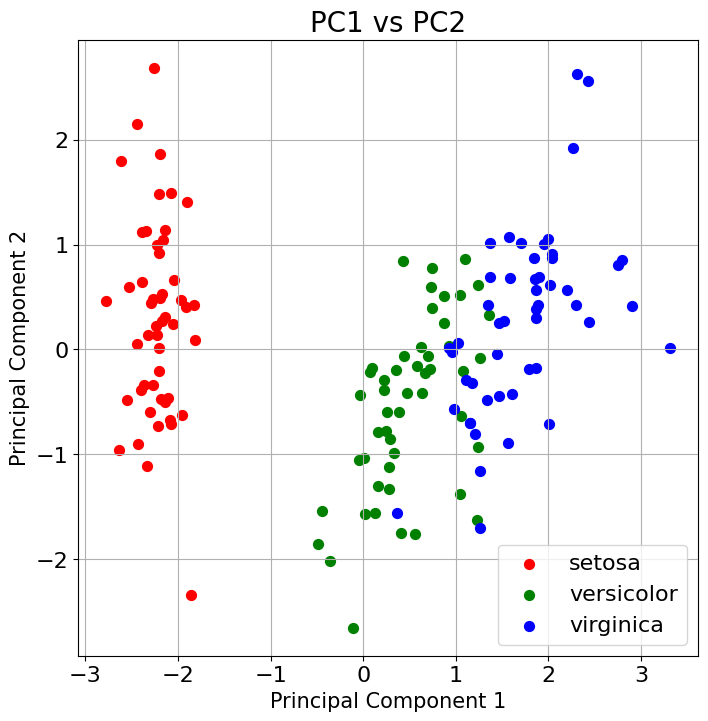

In [358]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)

ax.set_ylabel('Principal Component 2', fontsize = 15)

ax.set_title('PC1 vs PC2', fontsize = 20)

targets = v_y_iris_categories

colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):

    indicesToKeep = df_iris_consolidated['target'] == target

    ax.scatter(
        
        df_iris_consolidated.loc[indicesToKeep, 'principal component 1'],
        df_iris_consolidated.loc[indicesToKeep, 'principal component 2'],
        c = color,
        s = 50)
    
ax.legend(targets)

ax.grid()

Let's take a moment to discuss the `components_` attribute of the `pca_iris` object, see below. The attribute is a matrix containing the so-called loadings, see section '12.2.1 What Are Principal Components?' in ISLR ([ref](https://hastie.su.domains/ISLR2/ISLRv2_website.pdf)). We observe that the matrix has three rows and four columns. Each rows represent the loadings of the corresponding principle component. Each column represents the loadings for each feature in the predictor data.

In [359]:
m_pca_iris_loadings = pca_iris.components_

m_pca_iris_loadings 

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274]])

To demonstrate how the principle components are constructed, we calculate the first principle component using the scaled data and the loadings given in the `components_` attribute. We show the first 20 elements in the calculated PC1 and we show the first 20 elements in PC1 in `m_pc_iris`. Finally we subtract the two to show they are the same.

In [360]:
v_pc1_calculated = \
    m_pca_iris_loadings[0,0] * m_X_iris_scaled[:,0] + \
    m_pca_iris_loadings[0,1] * m_X_iris_scaled[:,1] + \
    m_pca_iris_loadings[0,2] * m_X_iris_scaled[:,2] + \
    m_pca_iris_loadings[0,3] * m_X_iris_scaled[:,3]

v_pc1_calculated[0:20]

array([-2.26470281, -2.08096115, -2.36422905, -2.29938422, -2.38984217,
       -2.07563095, -2.44402884, -2.23284716, -2.33464048, -2.18432817,
       -2.1663101 , -2.32613087, -2.2184509 , -2.6331007 , -2.1987406 ,
       -2.26221453, -2.2075877 , -2.19034951, -1.898572  , -2.34336905])

In [361]:
m_pc_iris[0:20, 0]

array([-2.26470281, -2.08096115, -2.36422905, -2.29938422, -2.38984217,
       -2.07563095, -2.44402884, -2.23284716, -2.33464048, -2.18432817,
       -2.1663101 , -2.32613087, -2.2184509 , -2.6331007 , -2.1987406 ,
       -2.26221453, -2.2075877 , -2.19034951, -1.898572  , -2.34336905])

In [362]:
v_pc1_calculated[0:20] - m_pc_iris[0:20, 0] < 1e-14

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

The variance that is explained by each subsequent principle component is captured in the `explained_variance_` attribute. The fraction (ratio) of the explained variance is captured in the `explained_variance_ratio_` attribute. To clarify its meaning we recalculate fraction for PC1. Why is the calculated fraction slighty higher than the first element in the `explained_variance_ratio_` attribute? Hint: `n_components`.

In [363]:
pca_iris.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [364]:
pca_iris.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

In [365]:
pca_iris.explained_variance_[0] / sum(pca_iris.explained_variance_)

0.7334226366206595

By design the principle components are constructed such that all components are perpendicular to each other, i.e., orthogonal. We check this by calculating the correlations between each pair. To warm up, we do this for the original data first. As typically is the case, some features are correlated and some are not. Clearly, `petal width (cm)` and `petal length (cm)` are highly correlated. Will it matter that we did not scale the data?

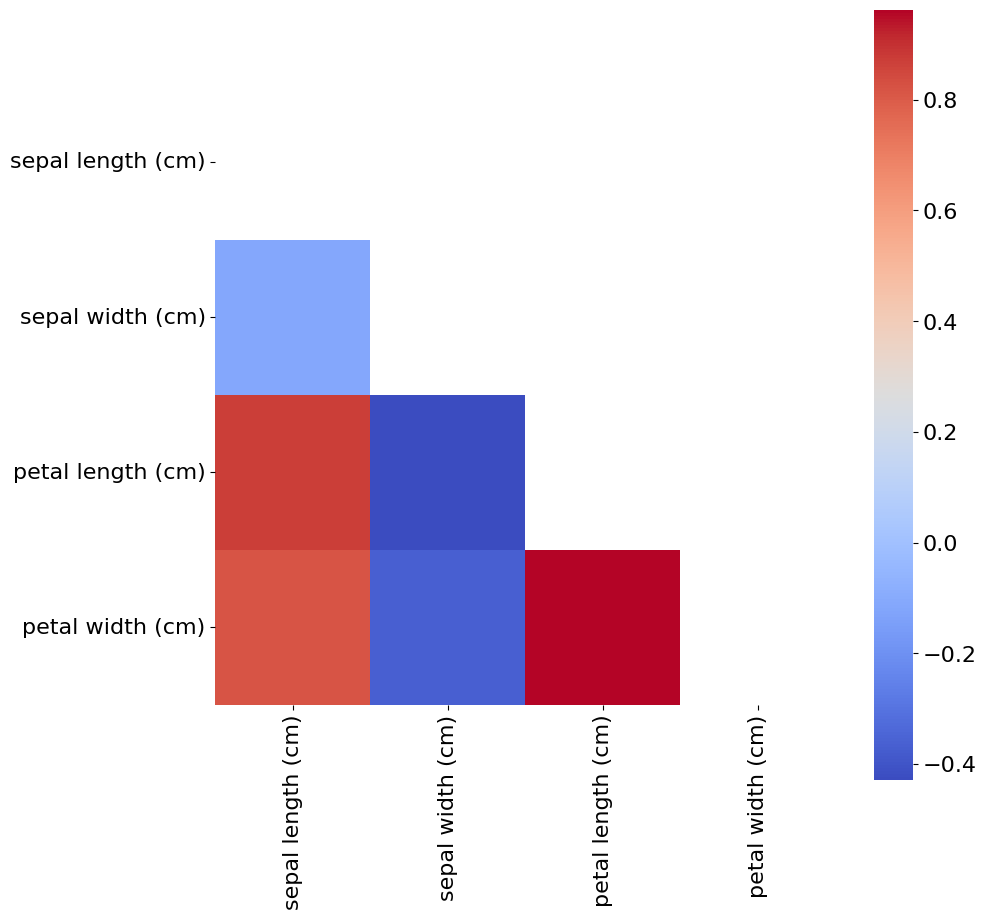

In [366]:
plt.rcParams['figure.figsize'] = (10, 10)

df_cor = df_X_iris.corr()

matrix = np.triu(df_cor)

sns.heatmap(df_cor, square=True, cmap= 'coolwarm', mask = matrix);

Now, we do the same for the principle components. And, are the principle components correlated?

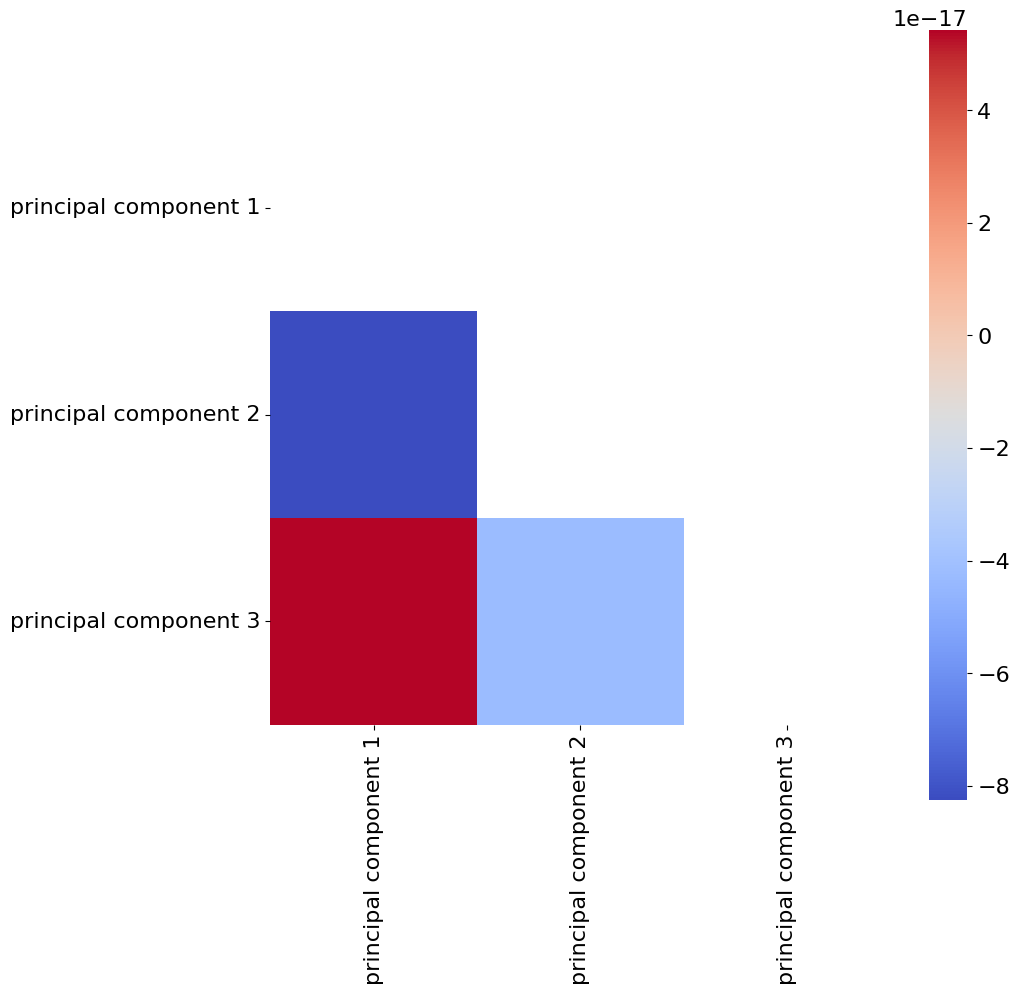

In [367]:
plt.rcParams['figure.figsize'] = (10, 10)

df_cor = df_pc_iris.corr()

matrix = np.triu(df_cor)

sns.heatmap(df_cor, square=True, cmap= 'coolwarm', mask = matrix);

If your are looking for the answer..

In [368]:
df_pc_iris.corr()

principal component 1  principal component 2  \
principal component 1               1.00e+00              -8.24e-17   
principal component 2              -8.24e-17               1.00e+00   
principal component 3               5.43e-17              -4.25e-17   

                       principal component 3  
principal component 1               5.43e-17  
principal component 2              -4.25e-17  
principal component 3               1.00e+00

#### Application of PCA to Ames Housing data

Let's define a simple pipeline, including PCA. We want to determine the number of principle components (PC) to explain 90% of the variance in the data. Therefore, we need to determine the explained variance for each component added to the model. So, we need to have access to the `explained_variance_ratio_` attribute of a PCA object. This can only be done outside the pipeline. When you are only interested in the principle components themselves, we can include `PCA(n_components = ...)` in the pipeline.

In [369]:
pl_impute_scale_numerical = make_pipeline(
    
    SimpleImputer(missing_values = np.nan, strategy = "median"),

    StandardScaler()

    )

The pipeline is applied to the numerical features in the original data (`df`).

In [370]:
m_X_transformed = pl_impute_scale_numerical.fit_transform(df[v_df_X_names])

We define a PCA object anticipating 25 principle components.

In [371]:
pca = PCA(n_components=25)

m_pc = pca.fit_transform(m_X_transformed)

The attribute `explained_variance_ratio_` holds the additional variance that is explained by adding another principle component.

In [372]:
v_pca_ames = pca.explained_variance_ratio_
v_pca_ames

array([0.19096613, 0.0860995 , 0.06243352, 0.05625871, 0.05224504,
       0.03733604, 0.03278425, 0.03178687, 0.0307713 , 0.02928921,
       0.02878741, 0.02787615, 0.02695517, 0.02661927, 0.02574917,
       0.02539753, 0.02466027, 0.02380344, 0.02303955, 0.0190011 ,
       0.01835428, 0.01741176, 0.01657203, 0.01567795, 0.0153007 ])

Using a list comprehension, we demonstrate that 22-23 PC's are needed to explain at least 90% of the total variance in the data.

In [373]:
# Mini-intermezzo
np.cumsum(v_pca_ames)

array([0.19096613, 0.27706562, 0.33949915, 0.39575786, 0.44800291,
       0.48533895, 0.51812319, 0.54991006, 0.58068136, 0.60997056,
       0.63875798, 0.66663413, 0.6935893 , 0.72020857, 0.74595774,
       0.77135526, 0.79601554, 0.81981898, 0.84285853, 0.86185963,
       0.88021391, 0.89762567, 0.91419769, 0.92987564, 0.94517635])

In [374]:
[i for i in enumerate(np.cumsum(v_pca_ames))]

[(0, 0.19096612638192284),
 (1, 0.2770656246907499),
 (2, 0.33949914867380593),
 (3, 0.39575786251930833),
 (4, 0.44800290519457897),
 (5, 0.48533894679793577),
 (6, 0.5181231935795224),
 (7, 0.5499100626279025),
 (8, 0.5806813579678569),
 (9, 0.6099705631369353),
 (10, 0.6387579780689321),
 (11, 0.6666341285882457),
 (12, 0.6935892991179288),
 (13, 0.7202085679691855),
 (14, 0.7459577392769797),
 (15, 0.7713552647227463),
 (16, 0.796015536641582),
 (17, 0.819818979106438),
 (18, 0.8428585300676372),
 (19, 0.8618596290590927),
 (20, 0.8802139100051906),
 (21, 0.8976256683227398),
 (22, 0.9141976937589683),
 (23, 0.9298756448681306),
 (24, 0.9451763462983948)]

Let's put the following in one table to compare the order of the numerical features in the data, see table below:
1. **Pearson Correlation coefficients** of the numerical features with `SalePrice`.
2. **LASSO coefficients** fitting the numerical features to a LASSO model predicting `SalePrice`.
3. **PCA loadings** of first the principle component ('PC1'). Note, this is independent of `SalePrice`.

Two housekeeping remarks:
1. We make use of `reset_index(drop=True)` to concatenate the dataframes as is. Without it, the dataframes would be outer/full joined using the index and all feature names would end up in the same row driven by the index order in the first dataframe, the correlation coefficients in this case. By resetting the index, we do not prevent the joining bit, but by resetting the index we ensure the order of each data frame remains as is.

2. In 'Step 3 - Split the data' in section 'Estimate a LASSO model' two scenario's can be chosen (A and B). Subsequently, in step 6 of the same section `df_lasso_coefficients` is calculated. To allow for a proper comparison of the correlation coefficients, the LASSO coefficients, and the PCA loadings, please ensure you ran scenario B and steps 3-6 accordingly.

The table allows us to investigate the numerical feature order in each of the three analysis. Comparing the Pearson correlation coefficients and the LASSO coeficients shows that the first three features occur in the same order. We also expect features that have a high correlation with the `SalePrice` to also end up high in the LASSO coefficient table. *Question: Why?* However, the equality does not continue all the way down. `Garage Area` is high in the list of correlation coefficients, however, it is somewhere in the middle in the list of LASSO coefficients. *Why is this the case?* Since LASSO wants to include as few features as possible (regularization, remember $\alpha$) it will choose one of the two. Both are highly correlated, so the information is sufficiently captured in one of the two.  We observe the same for `Gr Liv Area` and `1st Flr SF`. The table suggests that the feature with the higher correlation with `SalePrice` is choosen for LASSO and the other one is *punished* by giving it a lower LASSO coefficent. So, correlations between features causes the order in the two lists to differ. 

We observe no similarity between the order in features between the loadings in the first principle component (PC1) on the one hand and the correlations and LASSO coefficients on the other hand. Possibly, this is explained by PCA only focussing on the predictor data (X), where correlations and LASSO assess the relation between the predictor data (X) and `SalePrice` (y).

In [375]:
if df_lasso_coefficients.shape[0] != 36:
    print("Before proceeding, run Scenario B in Step 3 of section 'Estimate a LASSO model', and run steps 3-6 above.")

In [376]:
pd.concat(
        
    [   # Correlation coefficients. Note, we remove the first row containing correlation of SalePrice with itself.
        df_cor_table.tail(-1).reset_index(drop=True),

        #LASSO coefficients.
        df_lasso_coefficients.reset_index(drop=True),
          
        # PCA Loadings.  
        pd.DataFrame({
            
            'name': v_df_X_names,
            'pc1_loading': ["{:.2f}".format(x) for x in pca.components_[1]],
            'pc1_loading_abs': ["{:.2f}".format(abs(x)) for x in pca.components_[1]]

        }).sort_values(
            
            by = 'pc1_loading_abs',
            ascending = False
            
        ).reset_index(drop=True)
    ],
    
    axis = 1
)

name   cor  cor_abs             name  lasso coef  \
0      Overall Qual  0.80     0.80     Overall Qual    26365.62   
1       Gr Liv Area  0.71     0.71      Gr Liv Area    23001.88   
2       Garage Cars  0.65     0.65      Garage Cars     7366.70   
3       Garage Area  0.64     0.64   Year Remod/Add     5637.16   
4     Total Bsmt SF  0.63     0.63    Total Bsmt SF     5518.54   
5        1st Flr SF  0.62     0.62    Garage Yr Blt     5335.04   
6         Full Bath  0.55     0.55     BsmtFin SF 1     5221.63   
7    Year Remod/Add  0.53     0.53     Mas Vnr Area     4955.70   
8     Garage Yr Blt  0.51     0.51         Misc Val    -4502.57   
9     TotRms AbvGrd  0.50     0.50         Lot Area     4130.82   
10     Mas Vnr Area  0.50     0.50   Bsmt Full Bath     4076.86   
11       Fireplaces  0.47     0.47    Kitchen AbvGr    -3539.10   
12     BsmtFin SF 1  0.43     0.43     Screen Porch     3493.67   
13     Lot Frontage  0.34     0.34       Fireplaces     2502.16   
14     Wood Deck SF  0.33     0.33     Wood Deck SF     2464.93   
15    Open Porch SF  0.31     0.31       1st Flr SF     2070.86   
16        Half Bath  0.29     0.29     Overall Cond     1919.10   
17   Bsmt Full Bath  0.28     0.28          Yr Sold    -1276.91   
18         Lot Area  0.27     0.27    Bedroom AbvGr    -1147.29   
19       2nd Flr SF  0.27     0.27      Garage Area      998.82   
20              PID -0.25     0.25              PID     -973.61   
21      Bsmt Unf SF  0.18     0.18     Lot Frontage      709.87   
22    Bedroom AbvGr  0.14     0.14  Low Qual Fin SF     -584.55   
23   Enclosed Porch -0.13     0.13        Full Bath      387.92   
24    Kitchen AbvGr -0.12     0.12     BsmtFin SF 2      227.19   
25     Screen Porch  0.11     0.11    TotRms AbvGrd        0.00   
26     Overall Cond -0.10     0.10        Half Bath        0.00   
27        Pool Area  0.07     0.07   Bsmt Half Bath       -0.00   
28          Mo Sold  0.04     0.04       2nd Flr SF        0.00   
29  Low Qual Fin SF -0.04     0.04    Open Porch SF       -0.00   
30   Bsmt Half Bath -0.04     0.04   Enclosed Porch       -0.00   
31       3Ssn Porch  0.03     0.03       3Ssn Porch        0.00   
32          Yr Sold -0.03     0.03      Bsmt Unf SF       -0.00   
33            Order -0.03     0.03        Pool Area       -0.00   
34         Misc Val -0.02     0.02          Mo Sold        0.00   
35     BsmtFin SF 2  0.01     0.01            Order        0.00   

    lasso_coef_abs             name pc1_loading pc1_loading_abs  
0         26365.62       2nd Flr SF        0.42            0.42  
1         23001.88    Bedroom AbvGr        0.37            0.37  
2          7366.70     BsmtFin SF 1       -0.35            0.35  
3          5637.16   Bsmt Full Bath       -0.33            0.33  
4          5518.54    TotRms AbvGrd        0.31            0.31  
5          5335.04        Half Bath        0.23            0.23  
6          5221.63    Total Bsmt SF       -0.23            0.23  
7          4955.70      Gr Liv Area        0.22            0.22  
8          4502.57       1st Flr SF       -0.19            0.19  
9          4130.82      Bsmt Unf SF        0.17            0.17  
10         4076.86    Kitchen AbvGr        0.17            0.17  
11         3539.10        Full Bath        0.16            0.16  
12         3493.67     BsmtFin SF 2       -0.11            0.11  
13         2502.16      Garage Area       -0.09            0.09  
14         2464.93     Wood Deck SF       -0.09            0.09  
15         2070.86   Enclosed Porch        0.09            0.09  
16         1919.10  Low Qual Fin SF        0.08            0.08  
17         1276.91    Garage Yr Blt       -0.08            0.08  
18         1147.29     Mas Vnr Area       -0.07            0.07  
19          998.82      Garage Cars       -0.06            0.06  
20          973.61              PID        0.06            0.06  
21          709.87       Fireplaces       -0.05            0.05  
22          584.5